# Predictive Analytic:  Cardiovascular disease
Nama     : Kevin caesar

ID Dicoding    : kevin_caesar_LVy6

Dataset  : https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset


RUBRIK TAMBAHAN DOMAIN PROYEK
*   Jelaskan mengapa dan bagaimana masalah tersebut harus diselesaikan. **(DONE)**
*   Menyertakan hasil riset terkait atau referensi. Referensi yang diberikan **(DONE refrensi jurnal)**

RUBRIK TAMBAHAN BUSSINESS UNDERSTANDING

*   Mengajukan 2 atau lebih solution statement. Misalnya, menggunakan dua atau lebih algoritma untuk mencapai solusi yang diinginkan atau melakukan improvement pada baseline model dengan hyperparameter tuning. **(DONE 2 STATEMENT)**
*   Solusi yang diberikan harus dapat terukur dengan metrik evaluasi.**(DONE)**

RUBRIK Data Understanding

* Melakukan beberapa tahapan yang diperlukan untuk memahami data, contohnya teknik visualisasi data atau exploratory data analysis.


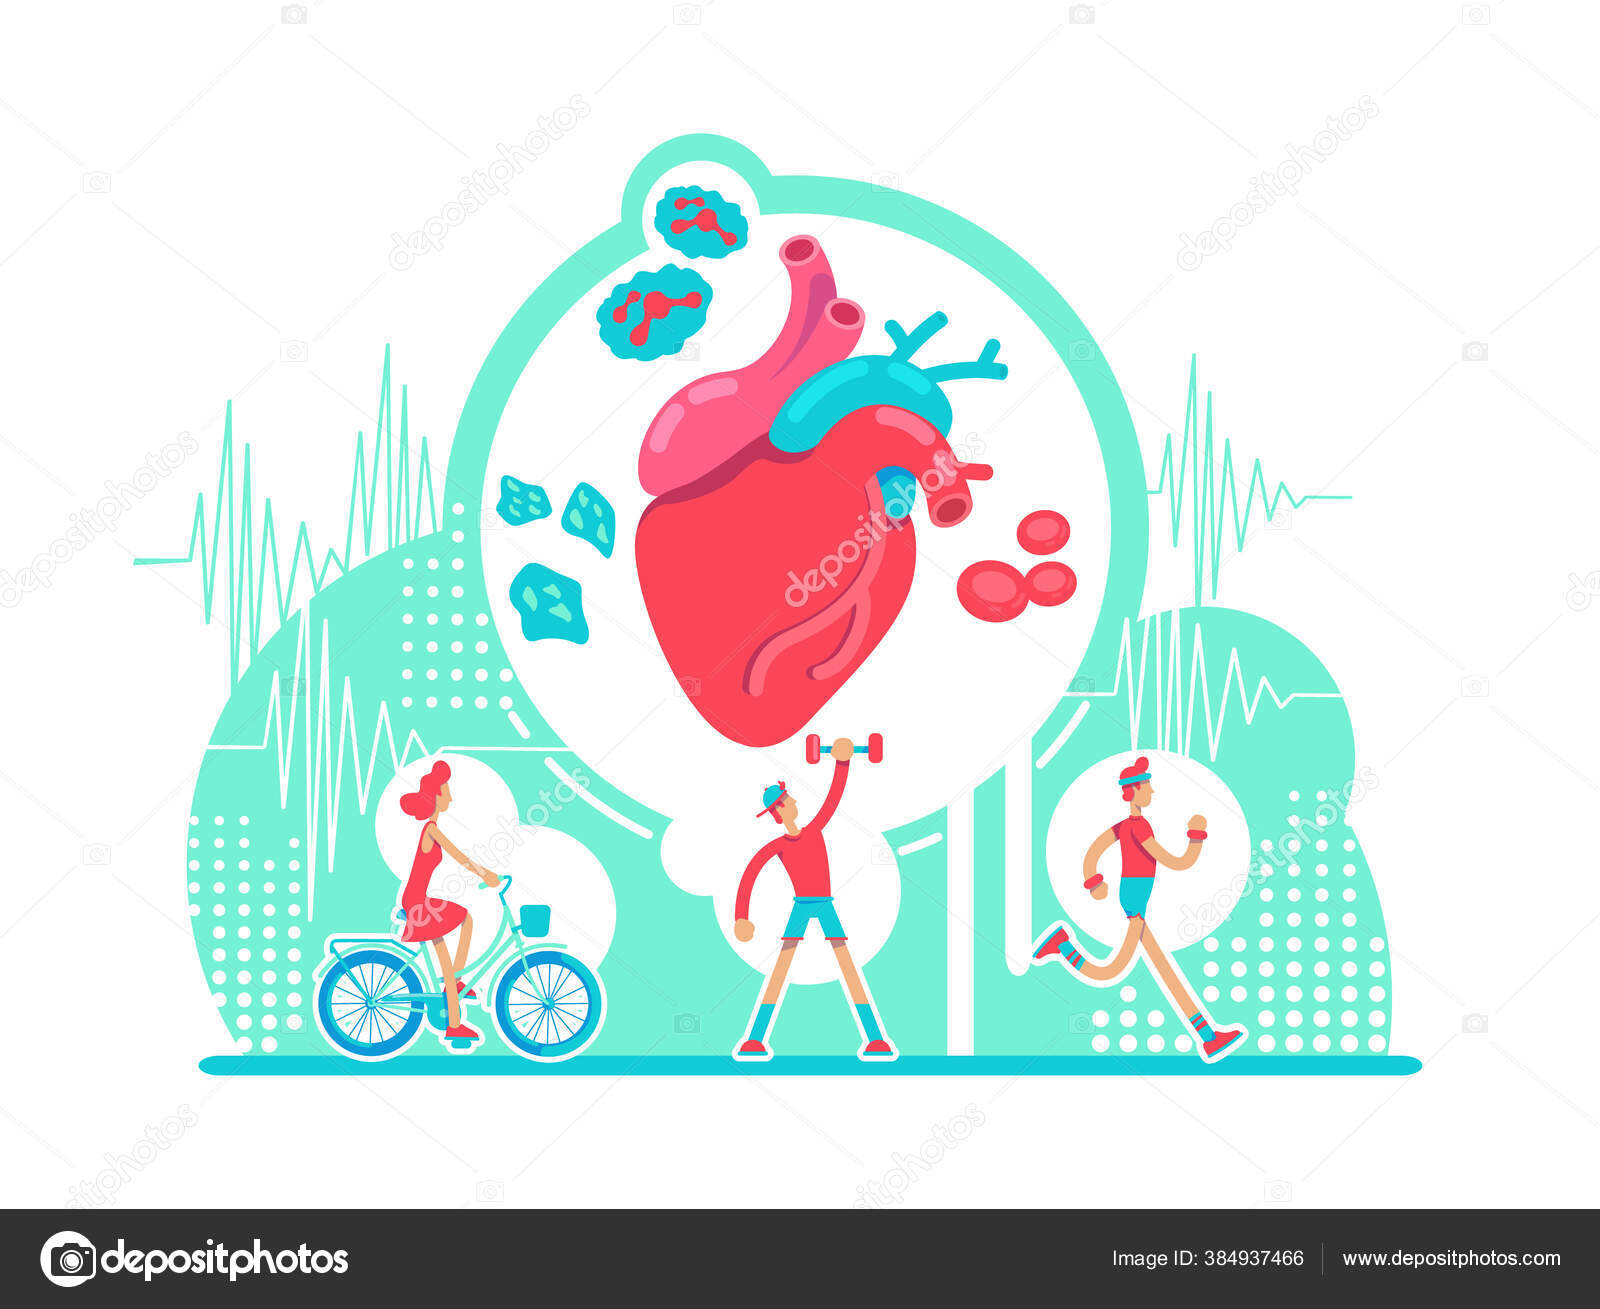

# Domain Proyek
Penyakit cardiovascular merupakan jenis penyakit jantung yang disebabkan kurang pasokan darah ke jantung [1]. cardiovascular menjadi penyebab kematian nomor 2 setelah stroke, menyumbang 12,9% dari seluruh kematian di Indonesia [2]. menurut [3], terdapat keterkaitan erat antara obesitas dengan kejadian cardiovascular di RS Umum Bahteramas. Obesitas dapat menyebabkan terjadinya peningkatan pada tekanan darah/ hipertensi, kadar trigliserida, kolesterol, resistensi glukosa, dan risiko penggumpalan darah, yang semuanya terkait dengan cardiovascular. Obesitas merupakan kelebihan lemak di jaringan adiposa dan merupakan salah satu dari masalah paling umum yang dapat muncul dan dapat dicegah dengan banyak bergerak[4]. gaya hidup juga keterkaitan dengan cardiovascular dan obesitas. maka observasi yang dilakukan menggunakan variabel umur dalam hari, gender, tinggi badan, berat badan, tekanan darah, kadar cholesterol, kadar glukosa,
merokok,alcohol,	activitas,	terkena penyakit cardiovascular.

# Business Understanding

## Problem Statements

Rumusan masalah dari masalah latar belakang diatas adalah:

1.  Dari berbagai faktor yang ada, faktor mana yang paling berpengaruh terhadap terkena cardiovascular?
2.   Bagaimana mengetahui seseorang terkena cardiovascular berdasarkan riwayat kesehatan dan aktivitas yang dilakukan?


## Solution Statements



*   analisis pada data untuk memahami fitur-fitur yang mempengaruhi orang terkena cardiovascular, dengan menerapkan teknik visualisasi data dan deskripsi statistik data mengetahui korelasi antar fitur dan memahami hubungan antara data target (label) dan fitur lainnya.
*   Menggunakan algoritma machine learning untuk membandingkan performa model untuk mendapatkan model atau algoritma yang memiliki akurasi prediksi terbaik dalam memprediksi berat badan seseorang berdasarkan riwayat kesehatan dan aktivitas yang dilakukan.



## Metodologi


Prediksi berat badan adalah tujuan yang ingin dicapai. berdasarkan penelitian yang ada, berat badan merupakan variabel kontinu. Dalam predictive metodologi pada proyek ini adalah membangun model regresi dengan berat badan sebagai target.


## Metrik

Metrik yang digunakan untuk mengevaluasi seberapa baik model klasifikasi merupakan confusion matrix. confusion matrix merupakansuatu metode yang digunakan untuk melakukan perhitungan akurasi pada konsep data mining [5].

# Data Understanding

tahap dalam proses analisis data yang bertujuan untuk memahami dataset secara mendalam sebelum melakukan analisis lebih lanjut.

## 1. Mengimport Library


Pada bagian ini kita mengimport seluruh library yang diperlukan untuk menganalisis

In [ ]:
!pip install kaggle

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import textwrap
import numpy as np
import zipfile
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

## Data Loading

tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"kevincs092001","key":"73c4e093b0f2004c8ba7f8402a702cf1"}'}

In [ ]:
# Create the .kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the kaggle.json file to the .kaggle directory
shutil.move('kaggle (2).json', '/root/.kaggle/kaggle (2).json')

# Set the file permissions
os.chmod('/root/.kaggle/kaggle (2).json', 600)


In [ ]:
!kaggle datasets download -d sulianova/cardiovascular-disease-dataset

# List files in the current directory
os.listdir()

Dataset URL: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
License(s): unknown
  0% 0.00/742k [00:00<?, ?B/s]
100% 742k/742k [00:00<00:00, 113MB/s]


['.config', 'cardiovascular-disease-dataset.zip', 'sample_data']

In [ ]:
#membuka zip menjadi folder
with zipfile.ZipFile("cardiovascular-disease-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset-folder")

#membaca csv dalam folder
data = pd.read_csv("dataset-folder/cardio_train.csv",sep=";")

# Display the first few rows
data

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]


penjelasan:

diperoleh hasil bahwa terdapat 13 kolom dan 70.000 data

Kode diatas untuk menghapus beberapa fitur yang tidak penting yaitu:

id : urutan data

### Deskripsi Variabel

Makna Variabel

Variabel | Keterangan
----------|----------
age |  umur dalam hari
gender| jenis kelamin (1 : perempuan, 2 untuk laki-laki)
height| tinggi badan dalam satuan cm
weight| berat badan dalam satuan
ap_hi | tekanan darah saat jantung memompa darah ke seluruh tubuh (normal:  120–129 mmHg untuk sistolik untuk sistolik)
ap_lo | tekanan darah saat jantung berelaksasi sebelum kembali memompa darah. (normal80–83 mmHg untuk diastolik)
cholesterol| 1: normal, 2: diatas normal, 3: jauh diatas normal
gluc | 1: normal, 2: diatas normal, 3: jauh diatas normal
smoke | 0: tidak merokok, 1: merokok
alco | 0: tidak minum alkohol, 1: minum alkohol
active | 0: tidak olahrga, 1: aktif olahraga
cardio | 0: tidak terkena sakit cardio, 1: terkena sakit cardio



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
 11  umur         70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


Dapat dilihat bahwa terdapat 1 variabel bertipe `float64` dan 10 variabel bertipe `int64`.

In [ ]:
data['umur'] = data['age']/365
data['umur'] = data['umur'].apply(math.ceil)

In [ ]:
#menghapus kolom id karena tidak digunakan
data.drop(columns=['id'], inplace=True)
data.drop(columns=['age'], inplace=True)

penjelasan:

data umur diubah dari harian menjadi tahun agar mudah menganalisis dengan cara dibagi 365

In [ ]:
data.shape

(70000, 12)

Dari Output diatas didapat informasi:
<br>

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 70000 | 12 |


<br>

## Exploratory Data Analysis - Menangani Missing Value dan Outliers

In [ ]:
data.duplicated().sum()

3197

In [ ]:
# Menampilkan data duplikat
data[data.duplicated]

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
842         2     165    60.0    120     80            1     1      0     0   
958         2     175    89.0    120     80            1     1      0     0   
1855        1     165    78.0    120     80            1     1      0     0   
1898        1     160    58.0    120     80            1     1      0     0   
3904        2     169    65.0    120     80            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69922       1     165    62.0    100     60            1     1      0     0   
69951       1     158    55.0    110     70            1     1      0     0   
69983       1     165    72.0    120     80            1     1      0     0   
69986       2     180    78.0    120     80            1     1      0     0   
69995       2     168    76.0    120     80            1     1      1     0   

       active  cardio  umur  
842         0       0    41  
958         1       0    50  
1855        1       1    59  
1898        1       0    58  
3904        1       0    43  
...       ...     ...   ...  
69922       1       0    43  
69951       1       0    42  
69983       1       0    54  
69986       1       0    50  
69995       1       0    53  

[3197 rows x 12 columns]

Dari hasil di atas, terlihat bahwa ada data-data tersebut memang terduplikasi. Oleh karena itu, data duplikat ini akan dihapus.

In [ ]:
df_cleaned = data.drop_duplicates()

setelah dicek terdapat 3197 data yang duplicated yang kemudian kita hapus agar tidak memprediksi hasil prediksi

In [ ]:
df_cleaned.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
umur           0
dtype: int64

penjelasan:

dari output diatas didapati bahwa tidak terdapat missing value pada dataset.

In [ ]:
df_cleaned

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69994       1     165    80.0    150     80            1     1      0     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  cardio  umur  
0           1       0    51  
1           1       1    56  
2           0       1    52  
3           1       1    49  
4           0       0    48  
...       ...     ...   ...  
69994       1       1    58  
69996       1       1    62  
69997       0       1    53  
69998       0       1    62  
69999       1       0    57  

[66803 rows x 12 columns]

In [ ]:
ag = (df_cleaned['umur'] == 0).sum()
gender = (df_cleaned['gender'] == 0).sum()
hei = (df_cleaned['height'] == 0).sum()
wei = (df_cleaned['weight'] == 0).sum()
hi = (df_cleaned['ap_hi'] == 0).sum()
lo = (df_cleaned['ap_lo'] == 0).sum()
coles = (df_cleaned['cholesterol'] == 0).sum()
glu = (df_cleaned['gluc'] == 0).sum()


print("Nilai 0 di kolom umur: ", ag)
print("Nilai 0 di kolom gender: ", gender)
print("Nilai 0 di kolom height: ", hei)
print("Nilai 0 di kolom weight: ", wei)
print("Nilai 0 di kolom ap_hi: ", hi)
print("Nilai 0 di kolom ap_lo: ", lo)
print("Nilai 0 di kolom chlosterol: ", coles)
print("Nilai 0 di kolom gluc: ", glu)


Nilai 0 di kolom umur:  0
Nilai 0 di kolom gender:  0
Nilai 0 di kolom height:  0
Nilai 0 di kolom weight:  0
Nilai 0 di kolom ap_hi:  0
Nilai 0 di kolom ap_lo:  21
Nilai 0 di kolom chlosterol:  0
Nilai 0 di kolom gluc:  0


setelah dicek untuk setiap kolom yg dipilih terdapat nilai 0 pada kolom ap_lo maka sebanyak 21. maka kita akan mendrop baris yang nilai kolom ap_lo = 0

In [ ]:
df_cleaned = df_cleaned[df_cleaned['ap_lo'] != 0]

kode diatas untuk menghapus tiap baris yang nilai kolom ap_lo 0

In [ ]:
ag = (df_cleaned['umur'] == 0).sum()
gender = (df_cleaned['gender'] == 0).sum()
hei = (df_cleaned['height'] == 0).sum()
wei = (df_cleaned['weight'] == 0).sum()
hi = (df_cleaned['ap_hi'] == 0).sum()
lo = (df_cleaned['ap_lo'] == 0).sum()
coles = (df_cleaned['cholesterol'] == 0).sum()
glu = (df_cleaned['gluc'] == 0).sum()


print("Nilai 0 di kolom umur: ", ag)
print("Nilai 0 di kolom gender: ", gender)
print("Nilai 0 di kolom height: ", hei)
print("Nilai 0 di kolom weight: ", wei)
print("Nilai 0 di kolom ap_hi: ", hi)
print("Nilai 0 di kolom ap_lo: ", lo)
print("Nilai 0 di kolom chlosterol: ", coles)
print("Nilai 0 di kolom gluc: ", glu)


Nilai 0 di kolom umur:  0
Nilai 0 di kolom gender:  0
Nilai 0 di kolom height:  0
Nilai 0 di kolom weight:  0
Nilai 0 di kolom ap_hi:  0
Nilai 0 di kolom ap_lo:  0
Nilai 0 di kolom chlosterol:  0
Nilai 0 di kolom gluc:  0


setelah ditangani untuk setiap kolom yg dipilih tidak terdapat nilai 0.

### Deskripsi Statistik dari Data

In [ ]:
df_cleaned.describe()

gender        height        weight         ap_hi         ap_lo  \
count  66782.000000  66782.000000  66782.000000  66782.000000  66782.000000   
mean       1.356129    164.341619     74.522241    129.161990     97.473840   
std        0.478858      8.333598     14.579325    157.493091    192.913276   
min        1.000000     55.000000     10.000000   -150.000000    -70.000000   
25%        1.000000    159.000000     65.000000    120.000000     80.000000   
50%        1.000000    165.000000     72.000000    120.000000     80.000000   
75%        2.000000    170.000000     83.000000    140.000000     90.000000   
max        2.000000    250.000000    200.000000  16020.000000  11000.000000   

        cholesterol          gluc         smoke          alco        active  \
count  66782.000000  66782.000000  66782.000000  66782.000000  66782.000000   
mean       1.382693      1.236112      0.092121      0.056288      0.798524   
std        0.690109      0.582060      0.289198      0.230478      0.401106   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.000000      1.000000   
50%        1.000000      1.000000      0.000000      0.000000      1.000000   
75%        2.000000      1.000000      0.000000      0.000000      1.000000   
max        3.000000      3.000000      1.000000      1.000000      1.000000   

             cardio          umur  
count  66782.000000  66782.000000  
mean       0.511994     53.857372  
std        0.499860      6.803136  
min        0.000000     30.000000  
25%        0.000000     49.000000  
50%        1.000000     54.000000  
75%        1.000000     59.000000  
max        1.000000     65.000000

Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

Dari hasil tersebut, dapat disimpulkan bahwa responden memiliki rentang usia 30-65 tahun dengan tinggi rentang 0.5-2.5 meter dan berat rentang 10-200 kilogram, sedangkan tekanan sistolik -150 hingga 16020 dan diastolik -70 hingga 11000. Dari hasil tersebut, kita perlu melakukan hapus outlier dan pengecakan lebih lanjut

In [ ]:
df_cleaned.shape

(66782, 12)

total data menjadi 66782 baris

### Menangani Outliers

menangani outliers dengan IQR Method

In [ ]:
#Cek data outlier
numerical_feature = ['umur', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_feature = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

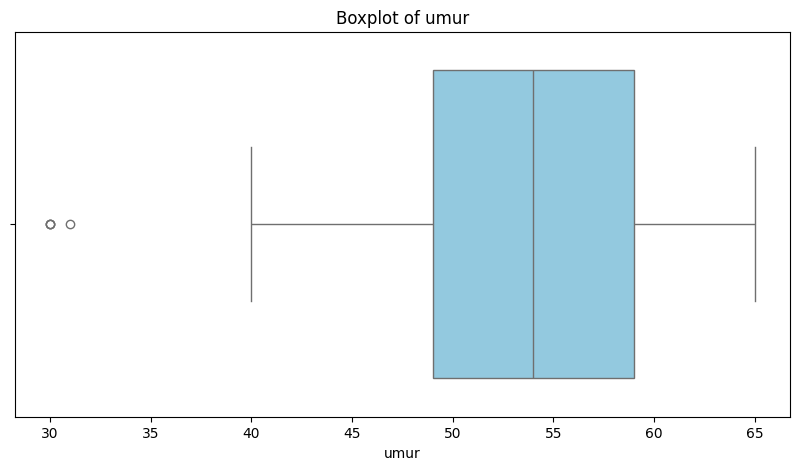

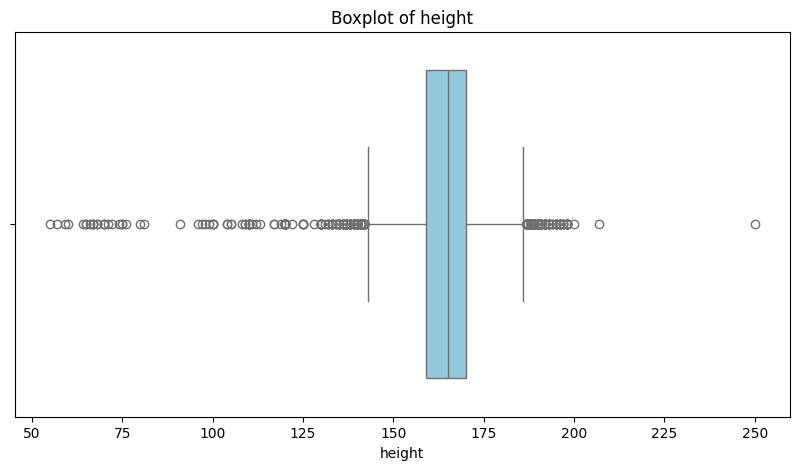

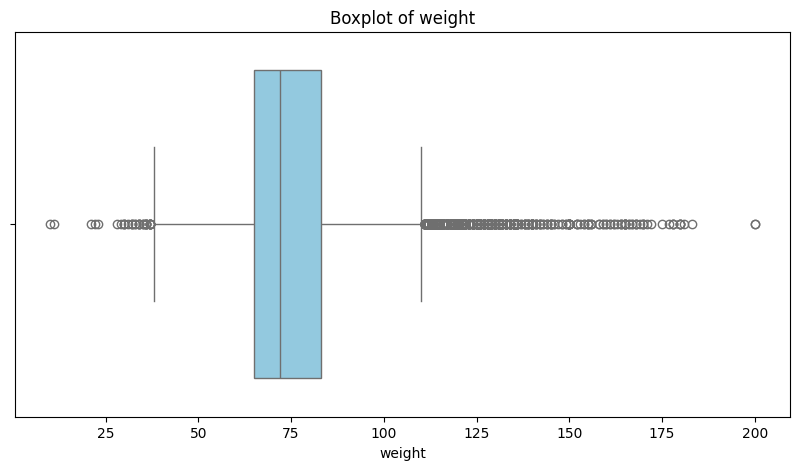

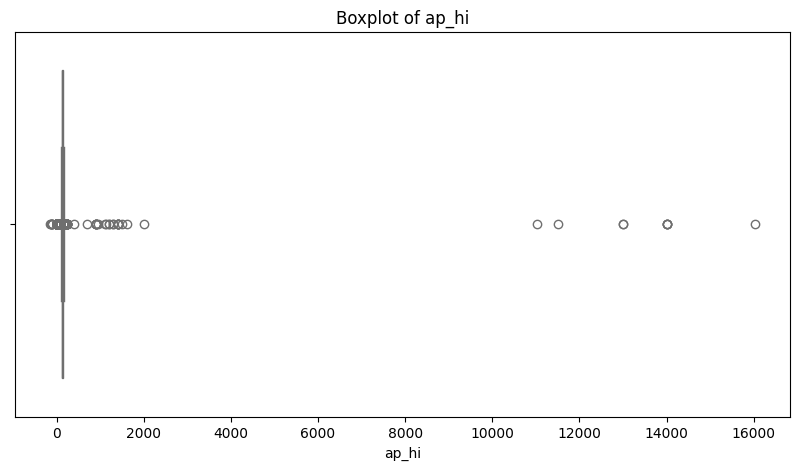

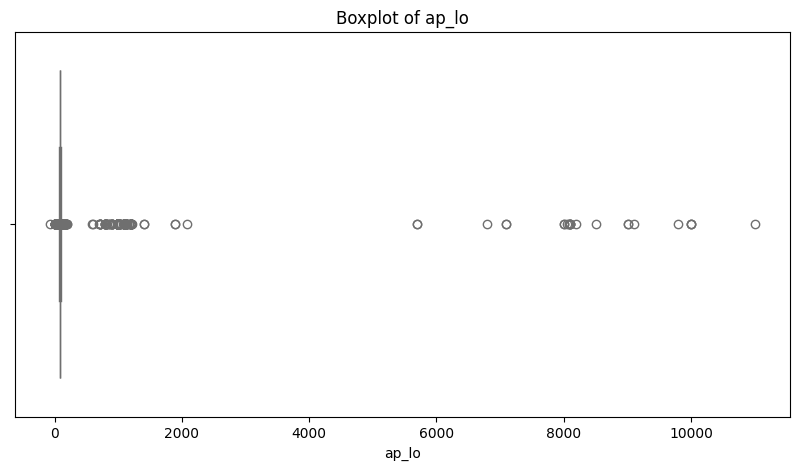

In [ ]:
for num in numerical_feature:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_cleaned, x=num, color='skyblue')
    plt.title(f'Boxplot of {num}')
    plt.xlabel(num)
    plt.show()

Berikut adalah interpretasi dari boxplot di atas.
1. Pada kolom `Umur`, dapat dilihat bahwa mayoritas responden berusia di rentang 48-58 tahun. Terdapat dua outlier, yaitu usia 30 tahun ke atas. Meski demikian, outlier ini tidak akan dihapus karena sangat memungkinkan seseorang berusia 30 tahun ke atas.
2. Pada kolom `Weight`, dapat dilihat bahwa mayoritas responden memiliki berat badan di rentang 60-80 kilogram. Terdapat banyak outlier. Dengan demikian, outlier ini akan ditangani karena sangat kecil memungkinkan seseorang memiliki berat badan dengan rentang 20 kilogram hingga 35 kg pada umur 35 keatas.
3. Pada kolom `Height`, dapat dilihat bahwa mayoritas responden memiliki tinggi badan di rentang 1,6-1,7 meter. Terdapat banyak outlier. Dengan demikian, outlier ini akan ditangani karena sangat kecil kemungkinan umur 30 keatas memiliki rentang 0,5 meter hingga 1 meter.
4. Pada kolom `ap_hi`, dapat dilihat bahwa terdapat banyak outlier. Dengan demikian, outlier ini akan dihapus karena tidak mungkin seseorang memiliki tekanan darah lebih dari 500 mmHg dan minus.
5. Pada kolom `ap_lo`,  dapat dilihat bahwa terdapat banyak outlier. Dengan demikian, outlier ini akan dihapus karena tidak mungkin seseorang memiliki tekanan darah lebih dari 500 mmHg dan minus.
4. Pada kolom-kolom lainnya, dapat dilihat bahwa persebaran data merata dan tidak terdapat outlier yang signifikan.

Untuk proses analisis ini, outlier akan ditangani karena sangat tidak memungkinkan responden termasuk dalam outlier tersebut karena bertentangan dengan penelitian yang ada dan hanya umur saja yang tidak akan dibuang.

In [ ]:
#Cek data outlier
numerical_features = [ 'height', 'weight', 'ap_hi', 'ap_lo']
selected_cols = df_cleaned[numerical_features]

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_cleaned[~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

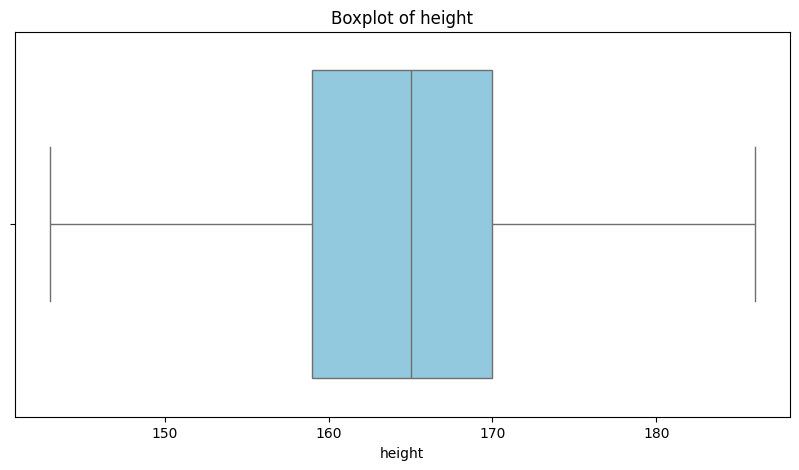

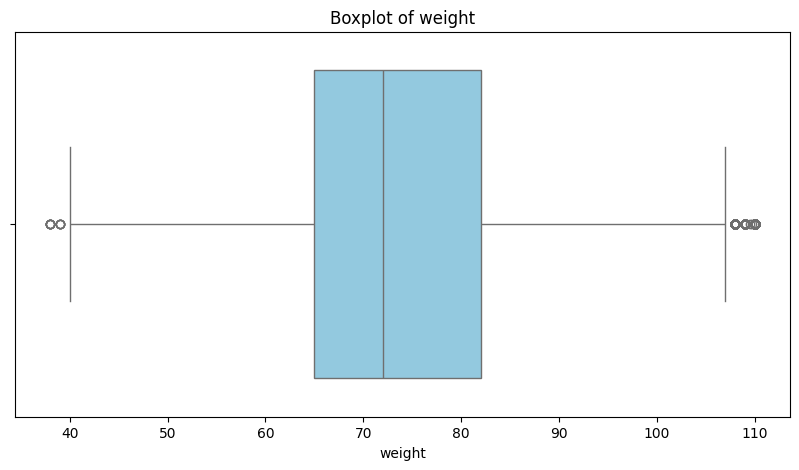

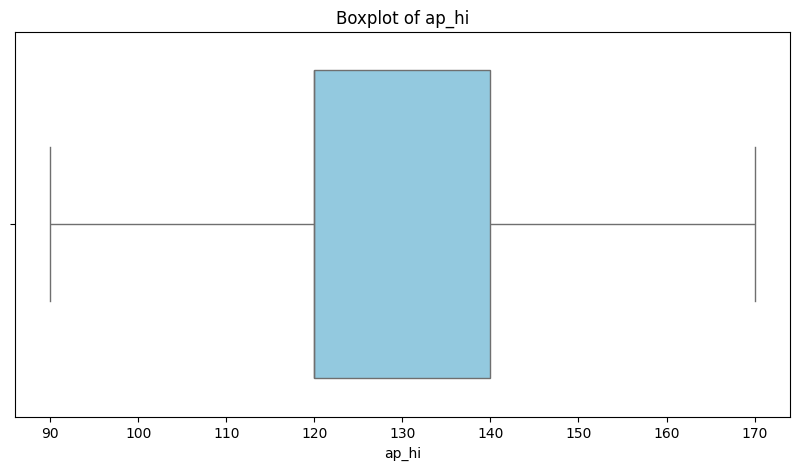

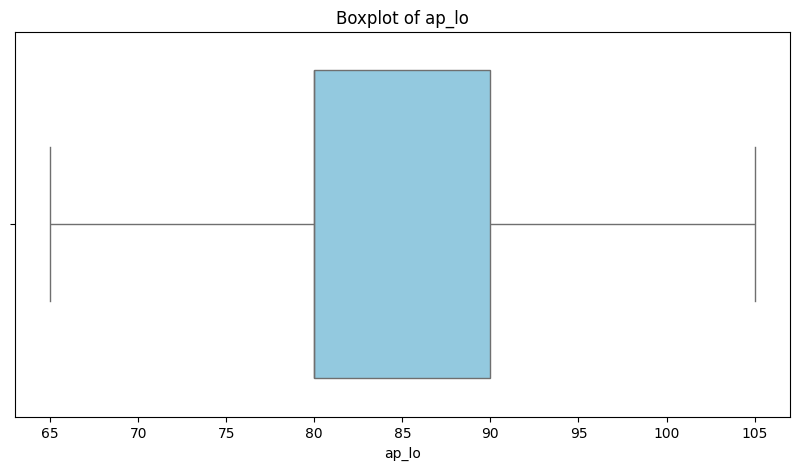

In [ ]:
for num in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_filtered, x=num, color='skyblue')
    plt.title(f'Boxplot of {num}')
    plt.xlabel(num)
    plt.show()

In [ ]:
df_filtered.shape

(59787, 12)

dataset kini menjadi 59.787 baris setelah penghapusan outlier dan visualisasi boxplot setelah dilakukan penghapusan outlier diketahui bahwa:

1. Pada kolom `Weight`, dapat dilihat bahwa mayoritas responden memiliki berat badan di rentang 65-85 kilogram. Terdapat beberapa outlier. meski demikian, outlier ini akan tidak dihapus karena memungkinan memiliki berat 110 kg.
2. Pada kolom `Height`, dapat dilihat bahwa mayoritas responden memiliki tinggi badan di rentang 1,55-1,7 meter. Terdapat banyak outlier. Dengan demikian, outlier ini akan ditangani karena sangat kecil kemungkinan umur 30 keatas memiliki rentang 0,5 meter hingga 1 meter.
3. Pada kolom `ap_hi`, dapat dilihat bahwa rentang tekanan darah diastolik responden rentang 120 mmHg - 140 mmHg.
4. Pada kolom `ap_lo`,  dapat dilihat bahwa rentang tekanan darah diastolik responden rentang 80 mmHg - 90 mmHg.



## Exploratory Data Analysis - Univariate Analysis

In [ ]:
feature = categorical_feature
count = df_filtered[feature].value_counts()

# Menghitung jumlah nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
jumlah_unik = df_filtered[feature].nunique()

# Menampilkan nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
nilai_unik = df_filtered[feature].apply(lambda x: x.unique())

# Menampilkan hasil dalam bentuk DataFrame
pd.DataFrame({"Total Nilai Berbeda": jumlah_unik, "Nilai-Nilai": nilai_unik})

Total Nilai Berbeda Nilai-Nilai
gender                         2      [2, 1]
cholesterol                    3   [1, 3, 2]
gluc                           3   [1, 2, 3]
smoke                          2      [0, 1]
alco                           2      [0, 1]
active                         2      [1, 0]
cardio                         2      [0, 1]

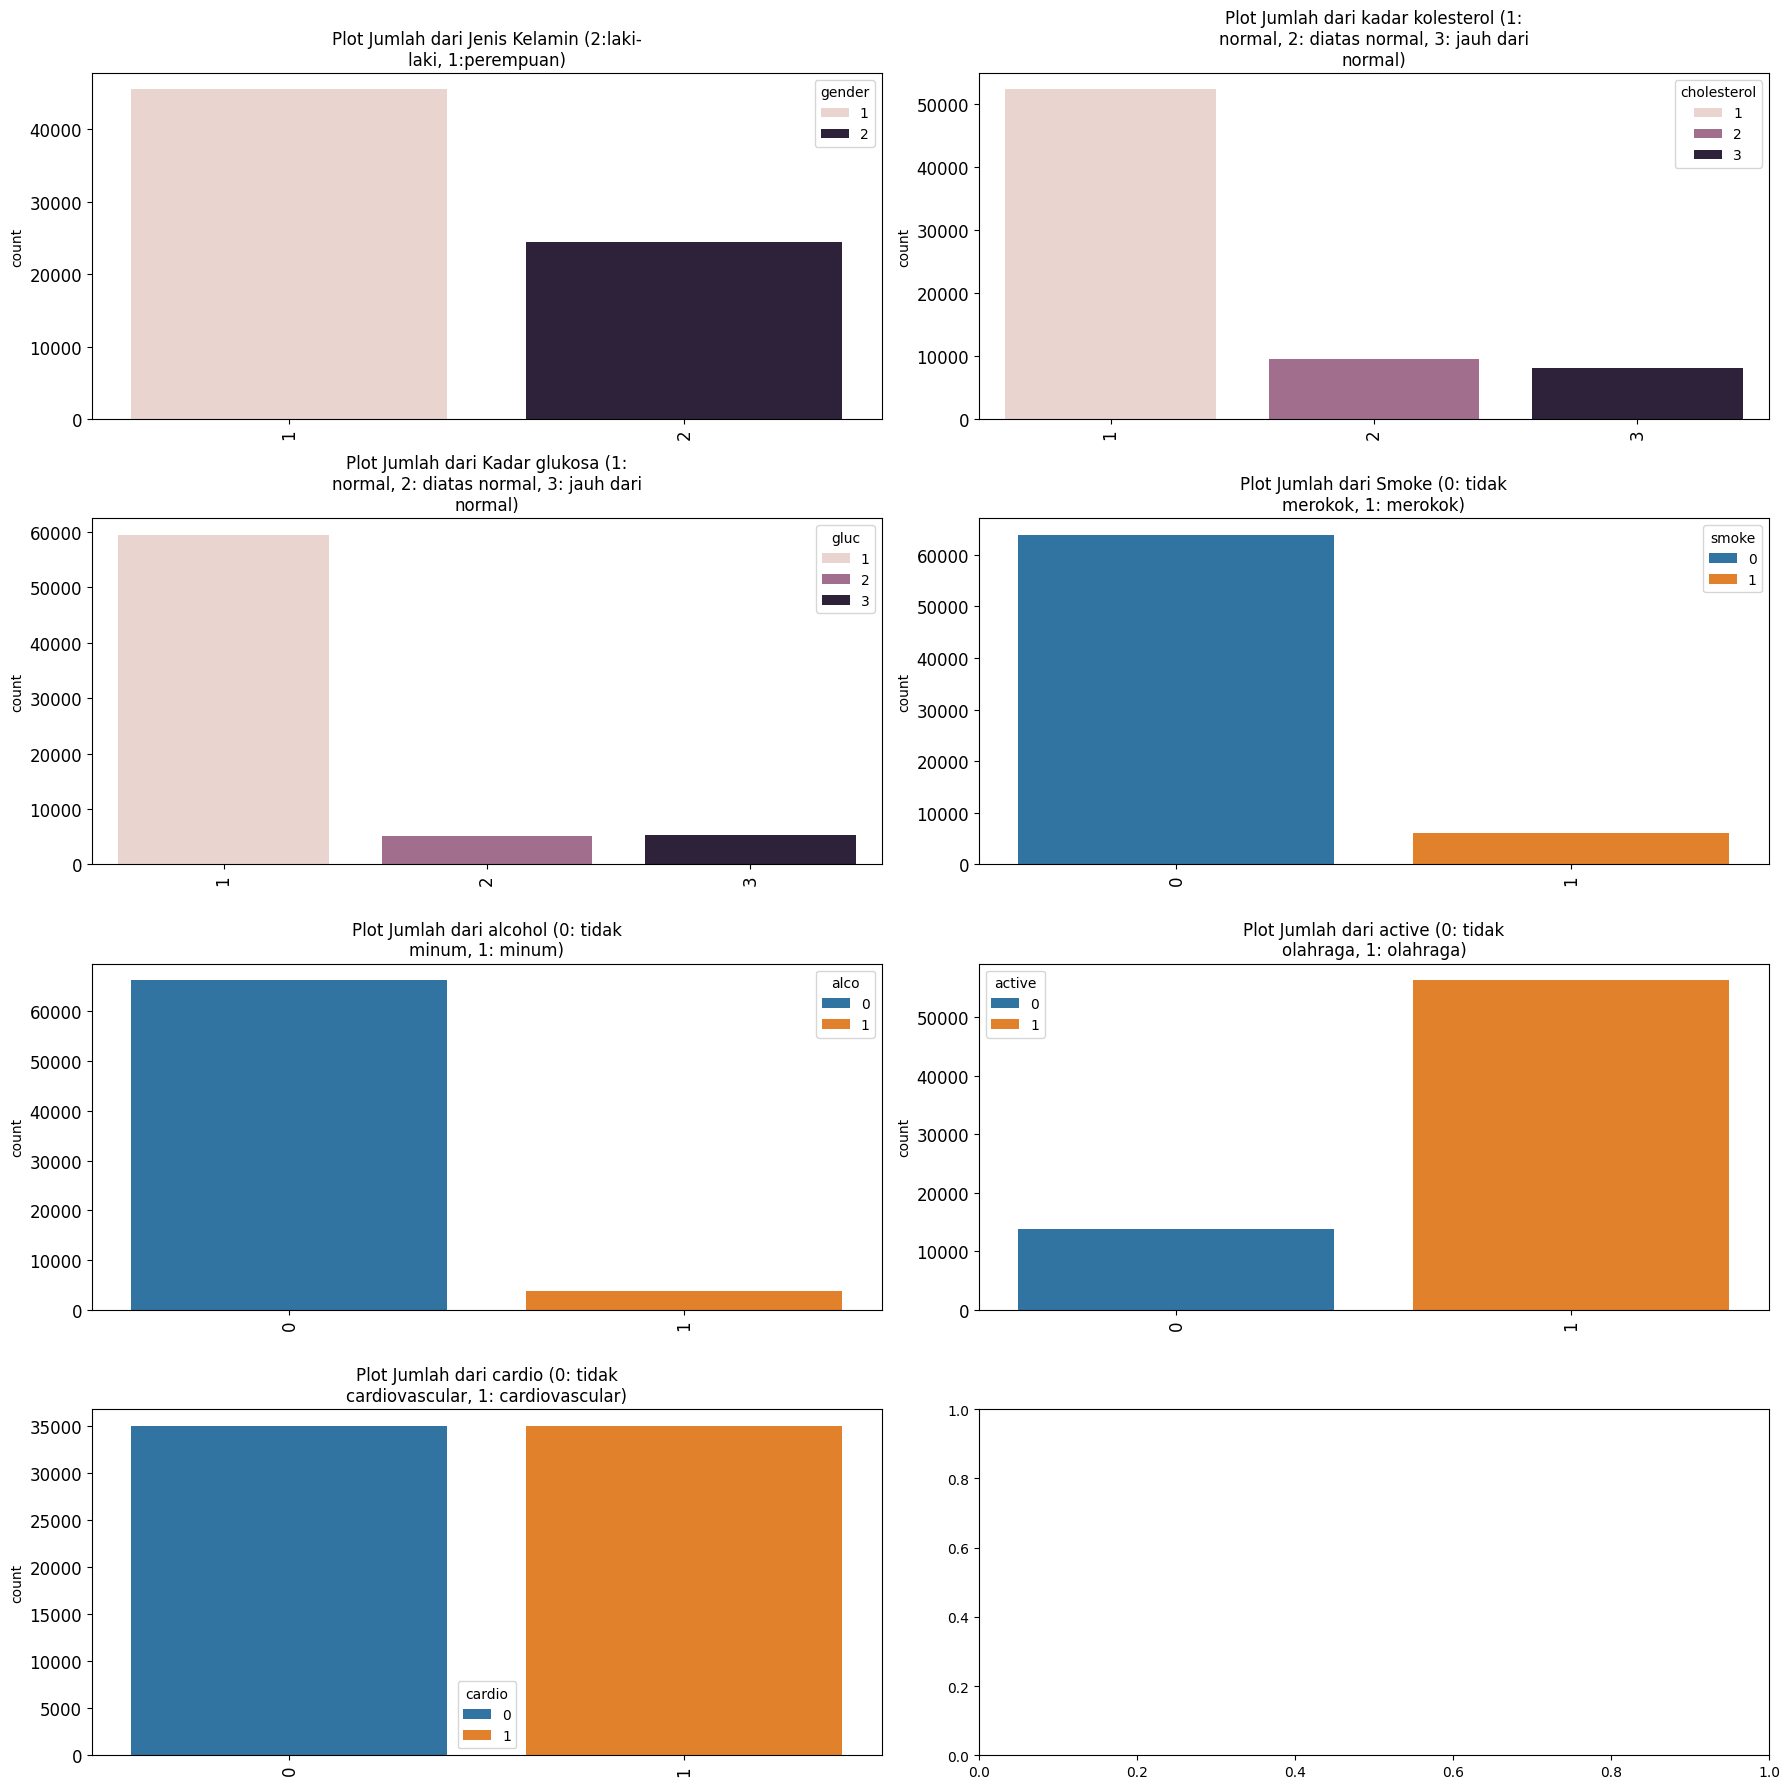

In [ ]:
# Membentuk plot dengan subplot sejumlah 9 berukuran 3 x 3
fig, axes = plt.subplots(4, 2, figsize = (18, 18))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Mendeskripsikan kolom-kolom kategorikal yang akan digunakan
deskripsi_kolom_kategorikal = ["Jenis Kelamin (2:laki-laki, 1:perempuan)",
                               "kadar kolesterol (1: normal, 2: diatas normal, 3: jauh dari normal)",
                               "Kadar glukosa (1: normal, 2: diatas normal, 3: jauh dari normal)",
                               "Smoke (0: tidak merokok, 1: merokok)",
                               "alcohol (0: tidak minum, 1: minum)",
                               "active (0: tidak olahraga, 1: olahraga)",
                               "cardio (0: tidak cardiovascular, 1: cardiovascular)"]

# Membentuk plot jumlah dalam bentuk bar plot untuk masing-masing kolom
for i, kolom in enumerate(df_filtered[feature].columns):
    sns.countplot(x = kolom, data = data, ax = axes[i], hue = kolom)

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"Plot Jumlah dari {deskripsi_kolom_kategorikal[i]}", width = 40))
    axes[i].set_title(judul)
    axes[i].title.set_size(12)

    # Mengatur label x
    axes[i].tick_params(axis = "x", labelrotation = 90)
    axes[i].tick_params(axis = "both", which = "major", labelsize = 12)
    axes[i].set_xlabel("")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Gambar di atas dapat diinterpretasikan sebagai berikut.
1. Dari `Plot Jumlah dari Riwayat terkena penyakit cardiovascular`, responden yang dijadikan responden imbang antara terkena cardiovascular dan non cardiovascular.
2. Dari `Plot Jumlah dari Frekuensi gender`, mayoritas responden laki-laki dan sisanya merupakan wanita.
3. Dari `Plot Jumlah dari tingkat kadar kolesterol`, mayoritas responden memiliki kadar normal.
4. Dari `Plot Jumlah dari tingkat kadar gula`, mayoritas responden memiliki kadar gula normal.
5. Dari `Plot Jumlah dari smoke`, mayoritas responden tidak merokok.
6. Dari `Plot Jumlah dari meminum alkohol`, sebagian besar responden terkadang tidak minum alkohol dan sebagian kecil responden meminum alkohol.
7. Dari `Plot Jumlah dari aktif bergerak`, mayoritas responden menggunakan sudah aktif bergerak dibandingkan tidak aktif bergerak


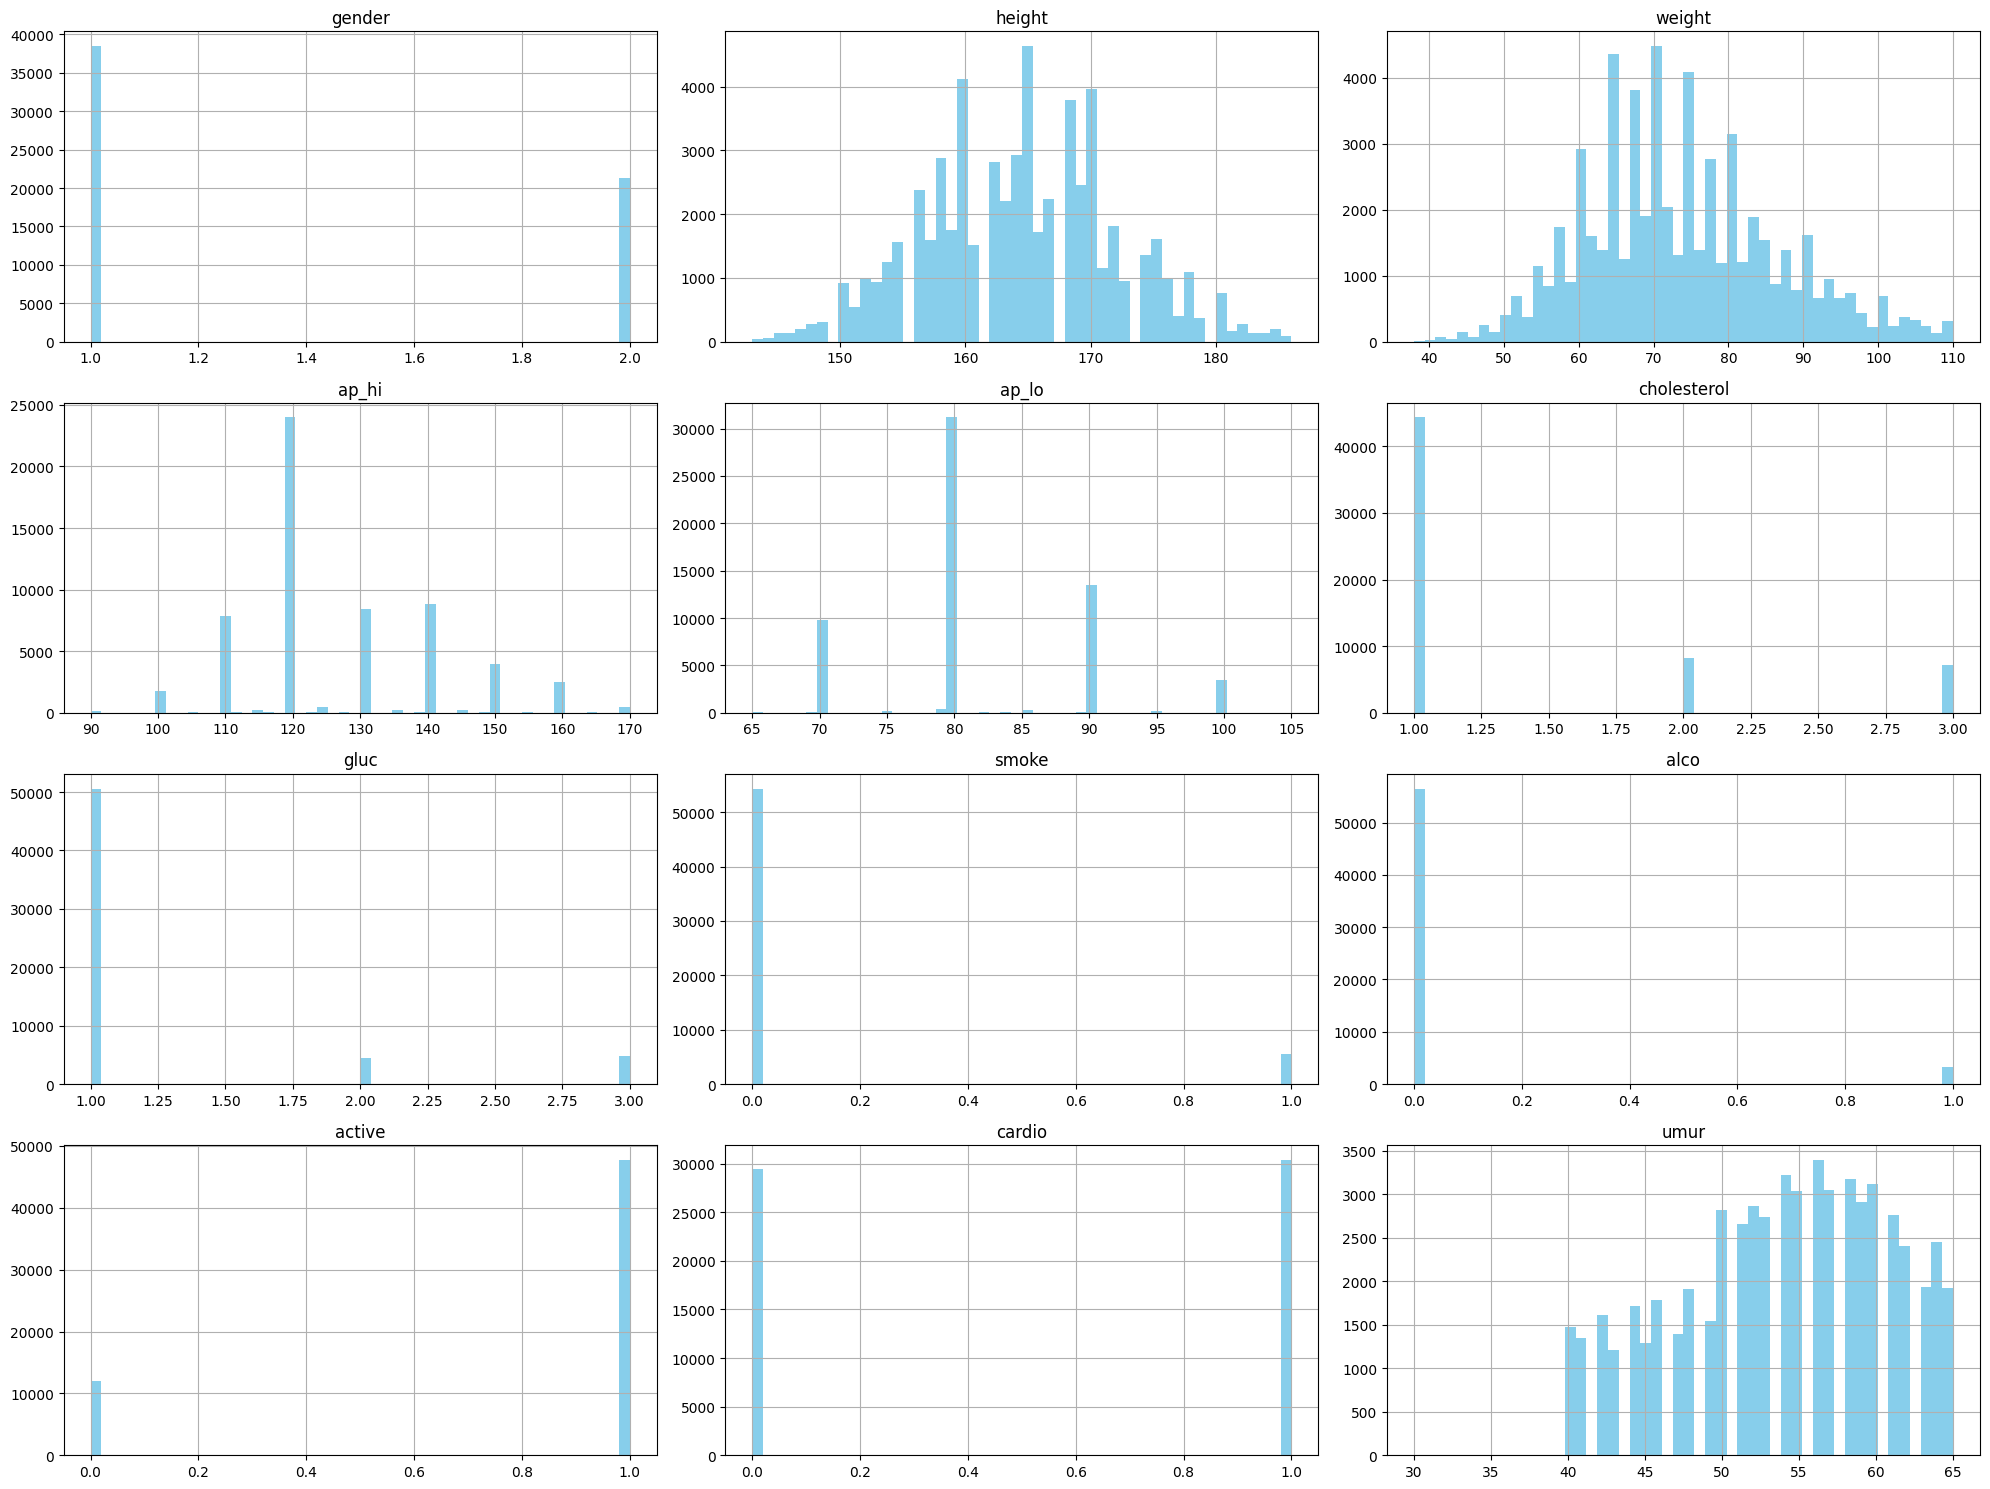

In [ ]:
df_filtered.hist(bins=50, figsize=(20,15), color= 'skyblue')

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

#menampilkan plot
plt.show()

Gambar di atas dapat diinterpretasikan sebagai berikut.
1. Plot Histogram dari `Height`, `Weight`, `ap_hi`,`ap_lo` berdistribusi normal.
2. Plot Histogram dari `active`, `cardio`, `alco`, `gluco`, `smoke`,`gender` cukup berdistribusi normal.
3. Plot Histogram dari `Umur`  memiliki distribusi data yang miring ke kanan. Artinya, mayoritas data memiliki nilai di diatas rata-rata.

## Exploratory Data Analysis - Multivariate Analysis

### membandingkan kondisi kesehatan jantung dengan jenis kelamin

In [ ]:
# Mapping for "cholesterol" and "gluc"
cholesterol_gluc_mapping = {1: "normal", 2: "above normal", 3: "well above"}

# Mapping for binary columns
binary_mapping = {1: "yes", 0: "no"}

# Mapping for binary columns
Gender = {1: "female", 2: "male"}

# Apply the mappings
df_filtered["cholesterol"] = df_filtered["cholesterol"].replace(cholesterol_gluc_mapping)
df_filtered["gluc"] = df_filtered["gluc"].replace(cholesterol_gluc_mapping)
df_filtered[["alco","smoke", "cardio", "active"]] = df_filtered[["alco","smoke", "cardio", "active"]].replace(binary_mapping)
df_filtered['gender'] = df_filtered['gender'].replace(Gender)

# Display the transformed DataFrame
df_filtered.head()

<ipython-input-26-1e2fdd0b2464>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["cholesterol"] = df_filtered["cholesterol"].replace(cholesterol_gluc_mapping)
<ipython-input-26-1e2fdd0b2464>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["gluc"] = df_filtered["gluc"].replace(cholesterol_gluc_mapping)
<ipython-input-26-1e2fdd0b2464>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

gender  height  weight  ap_hi  ap_lo   cholesterol          gluc smoke  \
0    male     168    62.0    110     80        normal        normal    no   
1  female     156    85.0    140     90    well above        normal    no   
2  female     165    64.0    130     70    well above        normal    no   
3    male     169    82.0    150    100        normal        normal    no   
5  female     151    67.0    120     80  above normal  above normal    no   

  alco active cardio  umur  
0   no    yes     no    51  
1   no    yes    yes    56  
2   no     no    yes    52  
3   no    yes    yes    49  
5   no     no     no    61

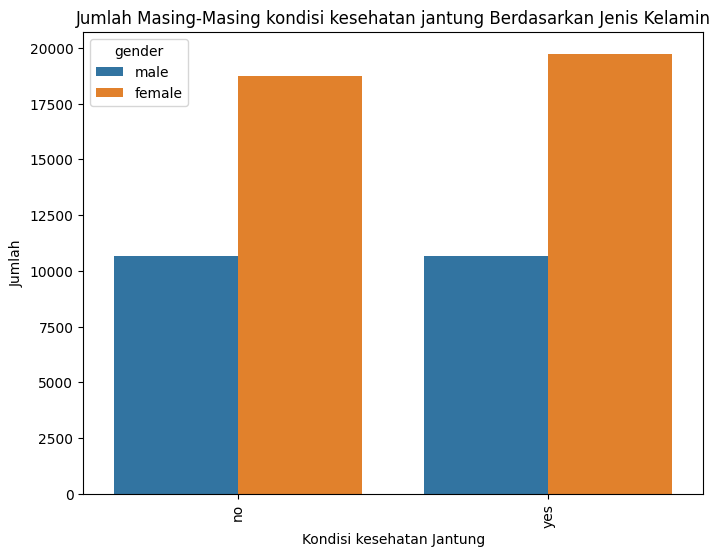

In [ ]:
# Membentuk plot jumlah dalam bentuk bar plot antara tingkat berat badan dengan jenis kelamin
plt.figure(figsize = (8, 6))
sns.countplot(x = "cardio", data = df_filtered, hue = "gender")

# Menambahkan judul pada plot
plt.title("Jumlah Masing-Masing kondisi kesehatan jantung Berdasarkan Jenis Kelamin")

# Menambahkan label sumbu x dan y pada plot
plt.xticks(rotation = 90)
plt.xlabel("Kondisi kesehatan Jantung")
plt.ylabel("Jumlah")

# Menampilkan plot
plt.show()

Dari gambar di atas, dapat disimpulkan bahwa
1. Penyakit cardiovascular didonmiasi oleh perempuan dibandingkan laki-laki.
2. responden yang tidak terkena penyakit cardiovascular juga masih didominasi oleh perempuan.

### Membandingkan kondisi kesehatan jantung dengan umur

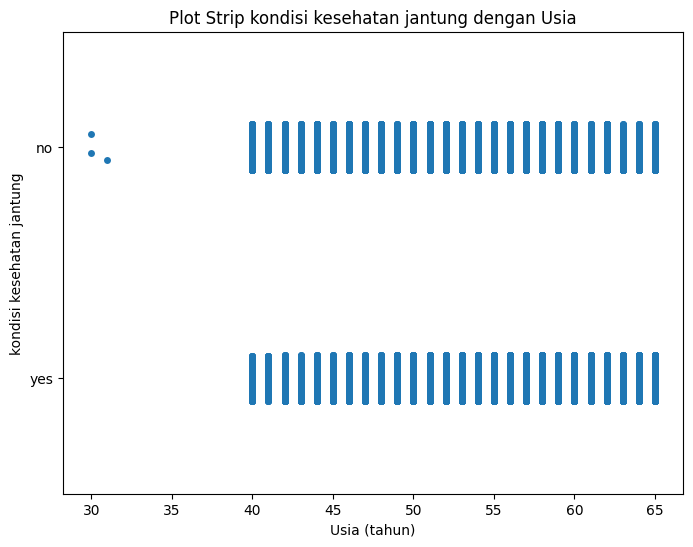

In [ ]:
# Membentuk plot strip antara kondisi kesehatan janrunf dengan usia
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_filtered, x = "umur", y = "cardio")

# Menambahkan judul pada plot
plt.title("Plot Strip kondisi kesehatan jantung dengan Usia")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Usia (tahun)")
plt.ylabel("kondisi kesehatan jantung")

# Menampilkan plot
plt.show()

Dari gambar di atas, disimpulkan bahwa
1. Seluruh responden terkena cardiovascular berusia diatas 40 tahun.
2. Seluruh responden non cardiovascular direntang 30-65 tahun.

### Membandingkan kondisi kesehatan jantung dengan tingkat kadar gula

<ipython-input-29-4fca16a325cf>:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  plot_seven = sns.histplot(data = df_filtered, x = "cardio", hue = "gluc", legend = True,


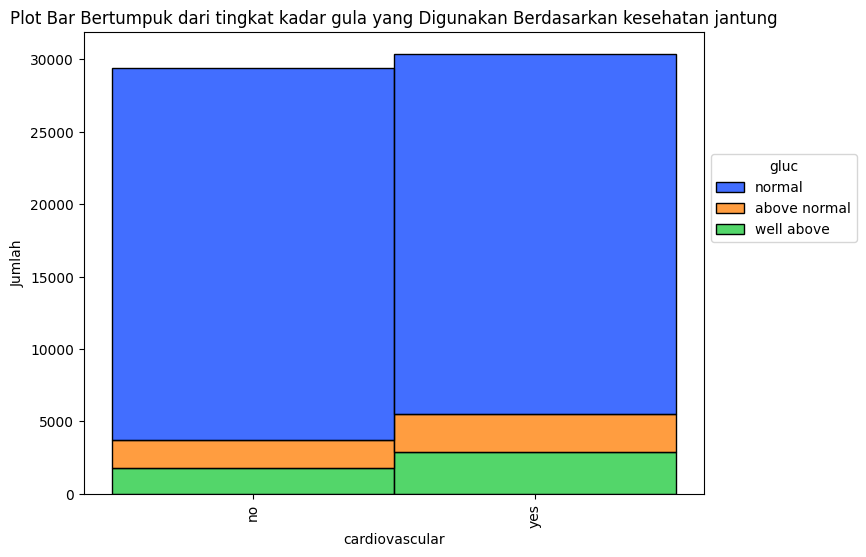

In [ ]:
# Membentuk bar plot bertumpuk antara kondisi kesehatan jantung dengan tingkat kadar gula yang digunakan
plt.figure(figsize = (8, 6))
plot_seven = sns.histplot(data = df_filtered, x = "cardio", hue = "gluc", legend = True,
                          multiple = "stack", palette = sns.color_palette("bright"))

# Menambahkan judul pada plot
plt.title("Plot Bar Bertumpuk dari tingkat kadar gula yang Digunakan Berdasarkan kesehatan jantung")

# Mengubah letak legend
sns.move_legend(plot_seven, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("cardiovascular")
plt.xticks(rotation = 90)
plt.ylabel("Jumlah")

# Menampilkan plot
plt.show()

Dari gambar di atas, disimpulkan bahwa
1. Mayoritas kadar glukosaa normal banyak yang tidak terkena cardiovascular dibandingkan dengan yang terkenan cardiovascular.
2. penyandang cardiovascular yang memiliki kadar glukosa melebihi diatas rata-rata naik cukup signifikan 2 kali lipat dibandingkan yang noncardiocascular.

### membandingkan kondisi kesehatan jantung dengan tingkat kadar kolesterol

<ipython-input-30-9bb55b1b09c1>:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  plot_seven = sns.histplot(data = df_filtered, x = "cardio", hue = "cholesterol", legend = True,


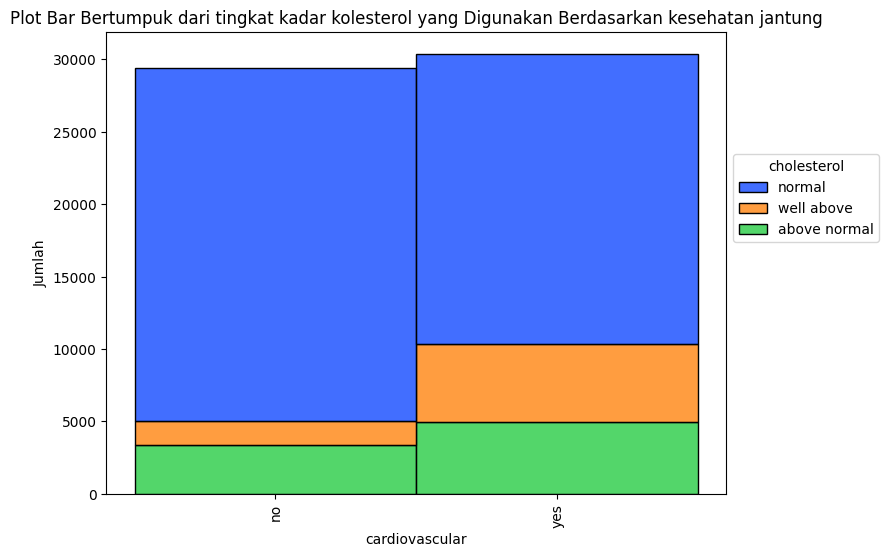

In [ ]:
# Membentuk bar plot bertumpuk antara keadaan kesehatan jantung dengan tingkat kadar kolesterol
plt.figure(figsize = (8, 6))
plot_seven = sns.histplot(data = df_filtered, x = "cardio", hue = "cholesterol", legend = True,
                          multiple = "stack", palette = sns.color_palette("bright"))

# Menambahkan judul pada plot
plt.title("Plot Bar Bertumpuk dari tingkat kadar kolesterol yang Digunakan Berdasarkan kesehatan jantung")

# Mengubah letak legend
sns.move_legend(plot_seven, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("cardiovascular")
plt.xticks(rotation = 90)
plt.ylabel("Jumlah")

# Menampilkan plot
plt.show()

Dari gambar di atas, disimpulkan bahwa
1. Mayoritas kadar kolesterol normal banyak yang tidak terkena cardiovascular.
2. penyandang cardiovascular yang memiliki kadar kolesterol melebihi diatas rata-rata naik cukup signifikan dibandingkan yang noncardiocascular.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

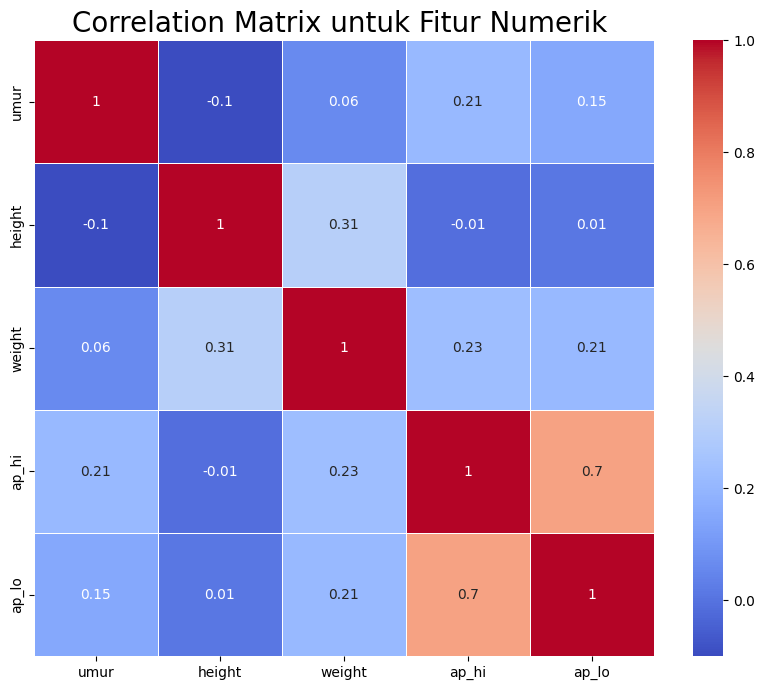

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_filtered[numerical_feature].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari heatmap di atas, dapat dilihat bahwa berat badan responden memiliki
1. Korelasi positif yang cukup kuat dengan tinggi dibandingkan faktor numerik lain.
2. Korelasi positif yang sangat lemah terhadap usia.
3. Korelasi positif yang lemah terhadap tekanan sistolik.
4. Korelasi positif yang lemah terhadap tekanan diastolik.

# Data Preparation

## Encoding Kategorikal

Encoding Kategorikal dilakukan terhadap 4 variabel, yaitu
* `Active` (Apakah responden berolahraga)
* `SMOKE` (Apakah responden merupakan perokok)
* `cardio` (Apakah responden merupakan penyandang cardiovascular)
* `alco` (Apakah responden merupakan peminum alkohol)

karena kategori-kategori pada keempat variabel tersebut hanya berisi antara `yes` (iya) dan `no` (tidak)

In [ ]:
# Membuat list kolom-kolom kategorikal yang memiliki entri antara yes dan no
Encoding_Kategorikal = ["cardio", "active", "smoke","alco"]

# Mengubah nilai yes menjadi 1 dan nilai no menjadi 0 pada seluruh kolom tersebut
for kategori in Encoding_Kategorikal:
    df_filtered[kategori] = df_filtered[kategori].map({"yes": 1, "no": 0})

<ipython-input-32-26df8b0cab6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[kategori] = df_filtered[kategori].map({"yes": 1, "no": 0})
<ipython-input-32-26df8b0cab6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[kategori] = df_filtered[kategori].map({"yes": 1, "no": 0})
<ipython-input-32-26df8b0cab6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

## One Hot Encoding

One Hot Encoding dilakukan terhadap 3 variabel, yaitu

* `gluc` (tingkat kadar glukosa )
* `cholesterol` (tingkat kadar kolesterol)
* `Gender` (Jenis kelamin responden)

karena kategori-kategori pada kedua variabel tersebut tidak memiliki urutan tertentu

In [ ]:
# Membentuk kolom dummy dari kolom gluc,cholesterol, dan gender
data_encoded = pd.get_dummies(df_filtered[["gluc","cholesterol", "gender"]], drop_first = True)

# Menggabungkan data asli dengan data dummy yang telah dibuat
data = pd.concat([df_filtered, data_encoded], axis = 1)

# Menghapus kolom MTRANS dan Gender
data.drop(columns = ["gluc","cholesterol", "gender"], inplace = True)

In [ ]:
# menampilkan lima data teratas yang sudah di encoding dan one hot encoding
data.head()

height  weight  ap_hi  ap_lo  smoke  alco  active  cardio  umur  \
0     168    62.0    110     80      0     0       1       0    51   
1     156    85.0    140     90      0     0       1       1    56   
2     165    64.0    130     70      0     0       0       1    52   
3     169    82.0    150    100      0     0       1       1    49   
5     151    67.0    120     80      0     0       0       0    61   

   gluc_normal  gluc_well above  cholesterol_normal  cholesterol_well above  \
0         True            False                True                   False   
1         True            False               False                    True   
2         True            False               False                    True   
3         True            False                True                   False   
5        False            False               False                   False   

   gender_male  
0         True  
1        False  
2        False  
3         True  
5        False

## split train test

Selanjutnya, karena target kita adalah variabel `cardio` untuk mengetahui akurasi prediksi dari cardio, maka kita akan membuang kolom tersebut dari data dan assign kolom tersebut ke variabel baru.

In [ ]:
from sklearn.model_selection import train_test_split

# Membentuk variabel X sebagai pengaruh dari target
X = data.drop(['cardio'], axis=1)

# Membentuk variabel y sebagai target
y = data['cardio']

# Membentuk data training dan data testing dengan komposisi 80% : 20 % dan dirandom setiap dijalankan ulang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

Lalu, kita membagi data menjadi 2, yaitu
* Data training sebesar 80% untuk melatih model
* Data testing sebesar 20% untuk menguji model

In [ ]:
# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (41850, 13)
Ukuran X_test:  (17937, 13)
Ukuran y_train:  (41850,)
Ukuran y_test:  (17937,)


In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 59787
Total # of sample in train dataset: 41850
Total # of sample in test dataset: 17937


## Standarisasi

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma dengan range 0 hingga 1 dan menyeragamkan karena memiliki satuan yang berbeda pada tiap fitur.


In [ ]:
# scaling untuk data training
numerical_features= ['height', 'ap_hi', 'ap_lo','weight']
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

height  ap_hi  ap_lo    weight
11615  0.953488  0.375  0.375  0.555556
23387  0.558140  0.625  0.625  0.527778
52368  0.534884  0.625  0.625  0.597222
16373  0.279070  0.625  0.625  0.833333
39595  0.348837  0.500  0.375  0.305556

In [ ]:
# scaling untuk data testing
numerical_features= ['height', 'ap_hi', 'ap_lo','weight']
scaler = MinMaxScaler()
scaler.fit(X_test[numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

height  ap_hi  ap_lo    weight
9548   0.511628  0.250  0.125  0.236111
59672  0.255814  0.125  0.125  0.486111
67801  0.627907  0.375  0.375  0.444444
58027  0.581395  0.625  0.375  0.555556
21989  0.441860  0.750  0.875  0.527778

# Model Development

In [ ]:
# Function for evalution report and plotting confusion matrix
def make_evaluation(y_true, y_pred, title):

    # Membuat list nama target yang diinginkan
    target_nama = ['Terkena Cardiovascular',
                    'Non Cardiovascular']

    # Menampilkan laporan klasifikasi (classification report)
    print(classification_report(y_true, y_pred, target_names = target_nama))

    # Membentuk Confusion Matrix
    fig, ax = plt.subplots(figsize = (10, 5))
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax = ax)

    # Menambahkan label sumbu x dan y pada confusion matrix
    ax.xaxis.set_ticklabels(target_nama, rotation = 90)
    ax.yaxis.set_ticklabels(target_nama)

    # Menghilangkan garis-garis grid
    ax.grid(False)

    # Menambahkan judul pada confusion matrix
    _ = ax.set_title(title)
    plt.show()

Seluruh model yang akan dibuat menggunakan hyperparameter tuning menggunakan optuna. Optimasi hyperparameter dengan Optuna terbukti efektif dalam meningkatkan performa model untuk mengetahui parameter yang tepat untuk algoritma model pada setiap model [6].

## Model Development dengan Algoritma XGBoost

In [ ]:
import optuna
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Ensure that X_train, X_test, y_train, y_test are converted to NumPy arrays
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Example of converting y_train, y_test if they are DataFrames
y_train = y_train.values if isinstance(y_train, pd.DataFrame) else y_train
y_test = y_test.values if isinstance(y_test, pd.DataFrame) else y_test

def objective(trial):
    # Suggest hyperparameters from the search space
    max_depth = trial.suggest_int('max_depth', 3, 15)  # Integer values between 3 and 15
    n_estimators = trial.suggest_int('n_estimators', 50, 200)  # Integer values between 50 and 200
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)  # Log-uniform distribution between 1e-4 and 1e-1
    random_state = trial.suggest_int('random_state', 0, 1000)  # Integer values for random_state

    # Create the XGBoost model with suggested hyperparameters
    model_xgb = XGBClassifier(max_depth=max_depth,
                              n_estimators=n_estimators,
                              learning_rate=learning_rate,
                              random_state=random_state,
                              n_jobs=-1)

    # Train the model
    model_xgb.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model_xgb.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # We want to maximize accuracy

# Create Optuna study to optimize the hyperparameters
study = optuna.create_study(direction='maximize')  # 'maximize' because we want to maximize accuracy
study.optimize(objective, n_trials=250)  # Run the optimization for 50 trials

# Best hyperparameters found by Optuna
print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)

[I 2024-11-24 11:04:44,445] A new study created in memory with name: no-name-12a1d977-3a53-4256-98fc-008bd313322a
<ipython-input-42-4d769abff6d5>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)  # Log-uniform distribution between 1e-4 and 1e-1
[I 2024-11-24 11:04:45,986] Trial 0 finished with value: 0.5056586943190055 and parameters: {'max_depth': 13, 'n_estimators': 82, 'learning_rate': 0.0001280954630493107, 'random_state': 902}. Best is trial 0 with value: 0.5056586943190055.
<ipython-input-42-4d769abff6d5>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform

Best hyperparameters:  {'max_depth': 4, 'n_estimators': 96, 'learning_rate': 0.07013356046738305, 'random_state': 723}
Best accuracy:  0.7334002341528684


In [ ]:
# Memanggil fungsi XGBClassifier dari library sklearn
model_xgb = XGBClassifier(max_depth = 4, n_estimators = 86,
                          random_state = 118, learning_rate =  0.07013356046738305, n_jobs = -1)

# Melatih model XGBoost dengan data training pada X dan y
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07013356046738305,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=86, n_jobs=-1,
              num_parallel_tree=None, random_state=118, ...)

Xgboost dengan parameter sebagai berikut:

  - max_depth = 4 :  Kedalaman maksimum pohon (default: None, yang berarti pohon akan terus tumbuh hingga semua daun murni atau hingga semua daun memiliki kurang dari min_samples_split sampel)

  - learning_rate:  mengontrol kecepatan pembelajaran model. Secara khusus, learning rate menentukan seberapa besar kontribusi setiap pohon (weak learner) terhadap model akhir untuk menghindari overfitting.

  - n_estimators : untuk mengurangi error yang tersisa dari prediksi pohon sebelumnya.

  - random_state: Menentukan generator bilangan acak untuk memastikan hasil yang dapat direproduksi (default: None).

  - n_jobs=-1: Menentukan jumlah inti (cores) yang digunakan untuk menghitung. Jika diatur ke -1, model akan menggunakan semua inti yang tersedia, sehingga mempercepat proses pelatihan.

In [ ]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_xgb = model_xgb.predict(X_test)

# Menampilkan akurasi model
xgb = accuracy_score(y_test, pred_xgb)
accuracy_xgboost= round(accuracy_score(y_test, pred_xgb)*100,2)
print("hasil akurasi model xgboost: ", accuracy_xgboost,"%")

hasil akurasi model xgboost:  73.31 %


                        precision    recall  f1-score   support

Terkena Cardiovascular       0.71      0.77      0.74      8867
    Non Cardiovascular       0.76      0.69      0.72      9070

              accuracy                           0.73     17937
             macro avg       0.73      0.73      0.73     17937
          weighted avg       0.74      0.73      0.73     17937



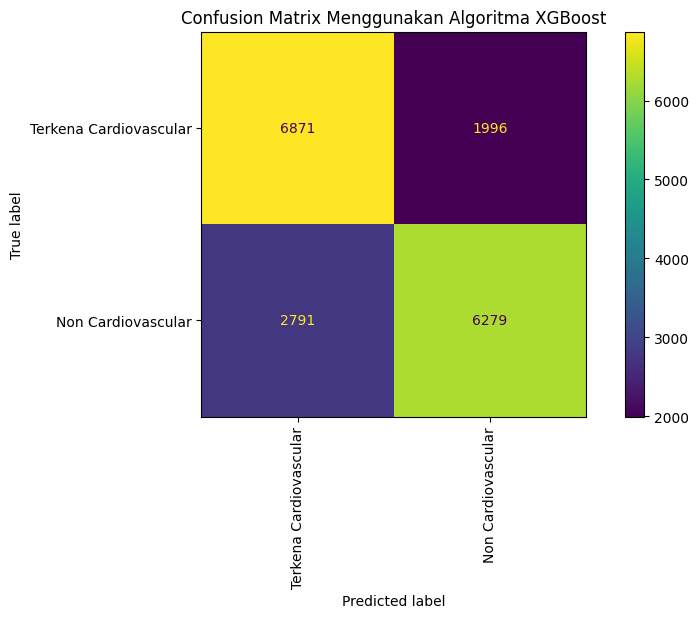

In [ ]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_xgb, title = f"Confusion Matrix Menggunakan Algoritma XGBoost")

Menggunakan XGBoost dimaknai:

1. 6871 responden cardiovascular telah diklasifikasikan dengan benar
2. 6279 responden noncardiovascular telah diklasifikasikan dengan benar
3. 1996 responden noncardiovacular diklasifikasikan sebagai responden cardiovascular (False Positif)
4. 2791 responden cardiovascular diklasifikasikan sebagai responden noncardiovascular (False Negatif)

## Model Development dengan Algoritma Logistic Regeression

In [ ]:
#membuat object algoritma Logistic Regression
clf_lg = LogisticRegression(solver='sag',n_jobs=-1,random_state=50)

#memodelkan data dengan algoritma Logistic Regression
model_lg = clf_lg.fit(X_train,y_train)

#melakukan predict pda data test
pred_lg = model_lg.predict(X_test)

algoritma logistik regession dengan parameter berikut:

  - solver : sag (Stochastic Average Gradient Descent), metode berbasis gradien stokastik, digunakan untuk menemukan parameter terbaik (koefisien) dalam model dengan data yang besar dan sparseness tinggi.

  - n_jobs=-1: Menentukan jumlah inti (cores) yang digunakan untuk menghitung. Jika diatur ke -1, model akan menggunakan semua inti yang tersedia, sehingga mempercepat proses pelatihan.


In [ ]:
# Menampilkan akurasi model
accuracy_lg= round(accuracy_score(y_test, pred_lg)*100,2)
print("hasil akurasi model Logisik Regression: ", accuracy_lg,"%")

hasil akurasi model Logisik Regression:  72.53 %


                        precision    recall  f1-score   support

Terkena Cardiovascular       0.70      0.77      0.74      8867
    Non Cardiovascular       0.75      0.68      0.71      9070

              accuracy                           0.73     17937
             macro avg       0.73      0.73      0.72     17937
          weighted avg       0.73      0.73      0.72     17937



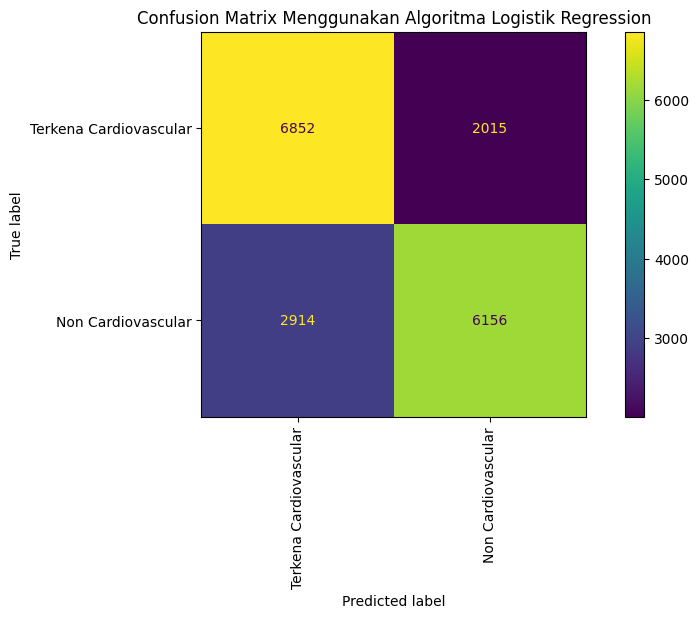

In [ ]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_lg, title = f"Confusion Matrix Menggunakan Algoritma Logistik Regression")

Menggunakan Logistik Regression dimaknai:

1. 6852 responden cardiovascular telah diklasifikasikan dengan benar
2. 6256 responden noncardiovascular telah diklasifikasikan dengan benar
3. 2914 responden noncardiovacular diklasifikasikan sebagai responden cardiovascular (False Positif)
4. 2015 responden cardiovascular diklasifikasikan sebagai responden noncardiovascular (False Negatif)

## Model Development dengan Algoritma Decision Tree

In [ ]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Ensure that X_train, X_test, y_train, y_test are converted to NumPy arrays if needed
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.values if isinstance(y_train, pd.DataFrame) else y_train
y_test = y_test.values if isinstance(y_test, pd.DataFrame) else y_test

def objective(trial):
    # Suggest hyperparameters from the search space for DecisionTreeClassifier
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)  # Integer values from 1 to 10
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)  # Integer values from 2 to 20
    max_depth = trial.suggest_int('max_depth', 1, 100)

    # Create the DecisionTreeClassifier model with suggested hyperparameters
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,
                                min_samples_split=min_samples_split,
                                max_depth=max_depth,
                                max_features= None,
                                random_state=42)  # Use a fixed random state for reproducibility

    # Train the model
    dt.fit(X_train, y_train)

    # Predict on the test set
    y_pred = dt.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # We want to maximize accuracy

# Create an Optuna study to optimize the hyperparameters
study = optuna.create_study(direction='maximize')  # 'maximize' because we want to maximize accuracy
study.optimize(objective, n_trials=500)  # Run the optimization for 50 trials

# Output the best hyperparameters found by Optuna
print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)


[I 2024-11-23 21:17:13,678] A new study created in memory with name: no-name-65d4b880-ca48-429d-845a-987caf8525ac
[I 2024-11-23 21:17:13,817] Trial 0 finished with value: 0.7238668673691253 and parameters: {'min_samples_leaf': 24, 'min_samples_split': 49, 'max_depth': 8}. Best is trial 0 with value: 0.7238668673691253.
[I 2024-11-23 21:17:13,999] Trial 1 finished with value: 0.6986675586775938 and parameters: {'min_samples_leaf': 12, 'min_samples_split': 44, 'max_depth': 51}. Best is trial 0 with value: 0.7238668673691253.
[I 2024-11-23 21:17:14,175] Trial 2 finished with value: 0.7005630818977533 and parameters: {'min_samples_leaf': 14, 'min_samples_split': 46, 'max_depth': 37}. Best is trial 0 with value: 0.7238668673691253.
[I 2024-11-23 21:17:14,338] Trial 3 finished with value: 0.7143892512683281 and parameters: {'min_samples_leaf': 28, 'min_samples_split': 25, 'max_depth': 68}. Best is trial 0 with value: 0.7238668673691253.
[I 2024-11-23 21:17:14,517] Trial 4 finished with value

Best hyperparameters:  {'min_samples_leaf': 26, 'min_samples_split': 45, 'max_depth': 9}
Best accuracy:  0.7256508892233929


In [ ]:
# Memanggil fungsi KNeighborsClassifier dari library sklearn
model_dt = DecisionTreeClassifier(min_samples_leaf= 26, min_samples_split= 45, max_depth= 9,max_features=None)

# Melatih model KNN dengan data training pada X dan y
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=26, min_samples_split=45)

DecisionTreeClassifier dengan parameter sebagai berikut:

  - max_depth = 9 :  Kedalaman maksimum pohon (default: None, yang berarti pohon akan terus tumbuh hingga semua daun murni atau hingga semua daun memiliki kurang dari min_samples_split sampel).

  - min_samples_split: Jum minimum sampel yang diperlukan untuk membagi simpul (default: 2).

  - min_samples_leaf: Jumlah minimum sampel yang diperlukan untuk berada di simpul daun (default: 1).

  - max_features: Jumlah maksimum fitur yang dipertimbangkan untuk pemisahan terbaik (default: None, yang berarti semua fitur dipertimbangkan).

  - random_state: Menentukan generator bilangan acak untuk memastikan hasil yang dapat direproduksi (default: None).

In [ ]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_dt = model_dt.predict(X_test)

# Menampilkan akurasi model
accuracy_dt= round(accuracy_score(y_test, pred_dt)*100,2)
print("hasil akurasi model Logisik Regression: ", accuracy_dt,"%")

hasil akurasi model Logisik Regression:  72.57 %


                        precision    recall  f1-score   support

Terkena Cardiovascular       0.71      0.75      0.73      8867
    Non Cardiovascular       0.74      0.70      0.72      9070

              accuracy                           0.73     17937
             macro avg       0.73      0.73      0.73     17937
          weighted avg       0.73      0.73      0.73     17937



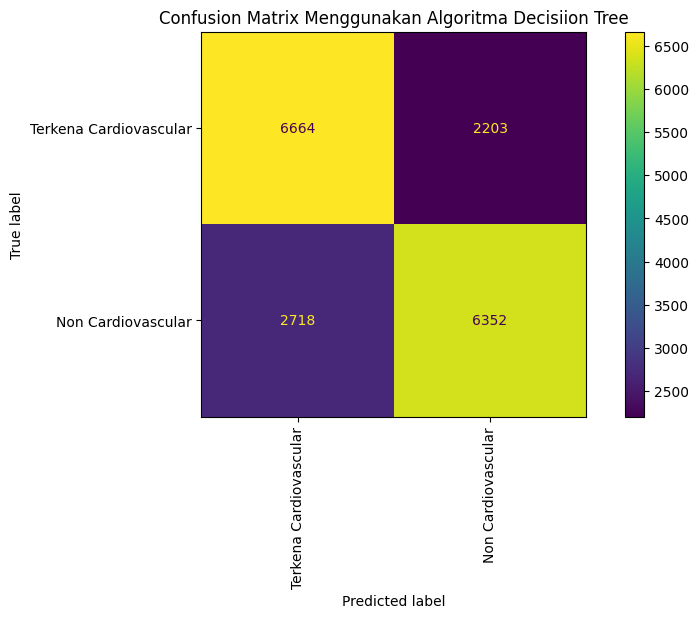

In [ ]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_dt, title = f"Confusion Matrix Menggunakan Algoritma Decisiion Tree")

Menggunakan Decision Tree dimaknai:

1. 6664 responden cardiovascular telah diklasifikasikan dengan benar
2. 6352 responden noncardiovascular telah diklasifikasikan dengan benar
3. 2203 responden noncardiovacular diklasifikasikan sebagai responden cardiovascular (False Positif)
4. 2718 responden cardiovascular diklasifikasikan sebagai responden noncardiovascular (False Negatif)

## Model Development dengan K-Nearest Neighbor

In [ ]:
# Memanggil fungsi KNeighborsClassifier dari library sklearn
model_knn = KNeighborsClassifier(n_neighbors = 20)

# Melatih model KNN dengan data training pada X dan y
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier dengan parameter sebagai berikut:

  - n_neighbors = 20 (jumlah tetangga yang dipertimbangkan untuk prediksi. Nilai kecil (1-10) cocok untuk pola lokal atau dataset kecil tetapi rawan noise. Nilai besar(11-20) membuat model lebih stabil atau dataset besar tetapi kurang peka terhadap detail lokal.)



In [ ]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_knn = model_knn.predict(X_test)

# Menampilkan akurasi model
accuracy_knn= round(accuracy_score(y_test, pred_knn)*100,2)
print("hasil akurasi model Algoritma KNN: ", accuracy_knn,"%")

hasil akurasi model Algoritma KNN:  69.57 %


                        precision    recall  f1-score   support

Terkena Cardiovascular       0.68      0.73      0.70      8867
    Non Cardiovascular       0.71      0.67      0.69      9070

              accuracy                           0.70     17937
             macro avg       0.70      0.70      0.70     17937
          weighted avg       0.70      0.70      0.70     17937



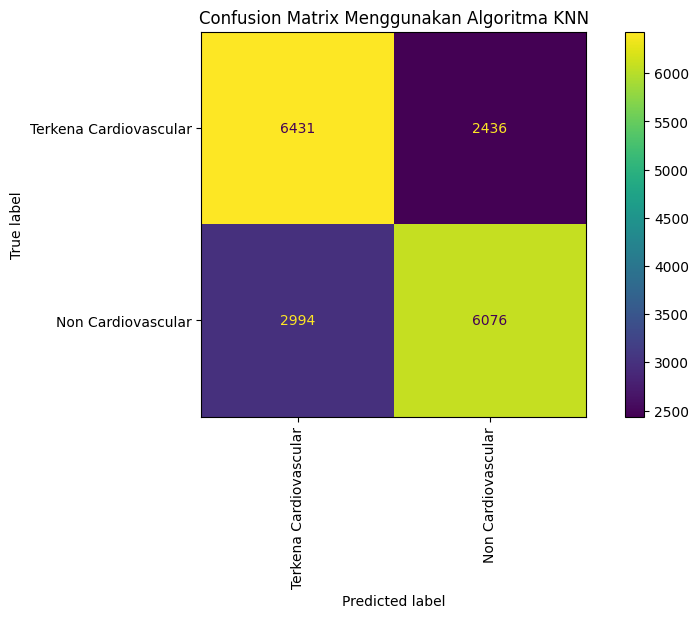

In [ ]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_knn, title = f"Confusion Matrix Menggunakan Algoritma KNN")

Menggunakan KNN dimaknai:

1. 6431 responden cardiovascular telah diklasifikasikan dengan benar
2. 6076 responden noncardiovascular telah diklasifikasikan dengan benar
3. 2436 responden noncardiovacular diklasifikasikan sebagai responden cardiovascular (False Positif)
4. 2994 responden cardiovascular diklasifikasikan sebagai responden noncardiovascular (False Negatif)

## Model Development dengan Random Forest


In [ ]:
# Memanggil fungsi RandomForestClassifier dari library sklearn
model_rf = RandomForestClassifier(n_estimators = 100, criterion = "entropy", max_depth = 10, random_state = 50)

# Melatih model Random Forest dengan data training pada X dan y
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=50)

- RandomForestClassifier dengan parameter sebagai berikut:

  - n_estimators=250: Menentukan jumlah pohon keputusan (trees) dalam hutan (forest). Semakin banyak pohon yang digunakan, model biasanya akan lebih kuat dan lebih robust, meskipun waktu pelatihan dan prediksi akan meningkat.

  - max_depth=10: Menentukan kedalaman maksimum setiap pohon dalam hutan. Ini digunakan untuk menghindari overfitting. Semakin dalam pohon, semakin banyak informasi yang dapat dipelajari, tetapi juga meningkatkan risiko model terlalu kompleks.

  - random_state=50: Parameter ini digunakan untuk memastikan reproduktifitas hasil. Dengan mengatur random_state, Anda akan mendapatkan hasil yang sama setiap kali Anda menjalankan kode.

  - n_jobs=-1: Menentukan jumlah inti (cores) yang digunakan untuk menghitung. Jika diatur ke -1, model akan menggunakan semua inti yang tersedia, sehingga mempercepat proses pelatihan.

In [ ]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_rf = model_rf.predict(X_test)

# Menampilkan akurasi model
accuracy_rf= round(accuracy_score(y_test, pred_rf)*100,2)
print("hasil akurasi model Random Forest: ", accuracy_rf,"%")

hasil akurasi model Random Forest:  73.04 %


                        precision    recall  f1-score   support

Terkena Cardiovascular       0.70      0.79      0.74      8867
    Non Cardiovascular       0.77      0.67      0.71      9070

              accuracy                           0.73     17937
             macro avg       0.73      0.73      0.73     17937
          weighted avg       0.73      0.73      0.73     17937



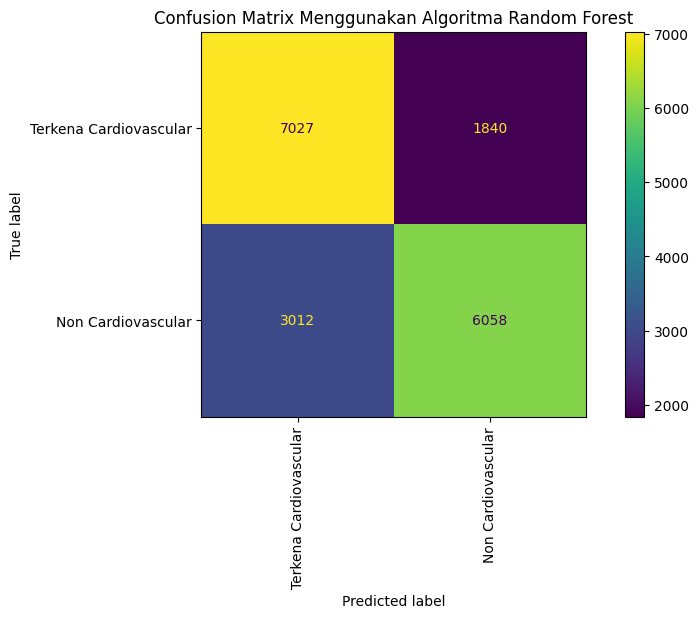

In [ ]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_rf, title = f"Confusion Matrix Menggunakan Algoritma Random Forest")

Menggunakan Random Forest dimaknai:

1. 7027 responden cardiovascular telah diklasifikasikan dengan benar
2. 6058 responden noncardiovascular telah diklasifikasikan dengan benar
3. 1840 responden noncardiovacular diklasifikasikan sebagai responden cardiovascular (False Positif)
4. 3012 responden cardiovascular diklasifikasikan sebagai responden noncardiovascular (False Negatif)

## Model Development dengan AdaBoostClassifier

In [ ]:
boosting_RF = AdaBoostClassifier(estimator= model_rf, learning_rate=0.04, random_state=40)
boosting_RF.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    n_estimators=250,
                                                    random_state=50),
                   learning_rate=0.04, random_state=40)

- AdaBoostClassifier dengan parameter sebagai berikut:

  - estimator =  model_rf Menentukan model dasar yang digunakan sebagai estimator. Dalam hal ini, model dasar yang digunakan adalah RandomClassifier (yang telah didefinisikan sebelumnya dengan nama model_rf).
  - learning_rate = 0.04 Parameter ini mengontrol kontribusi setiap estimator ke model akhir. Dalam hal ini, learning rate diatur menjadi 0.04.

  - random_state = 40 Parameter ini digunakan untuk memastikan bahwa hasil dapat direproduksi. Dengan menetapkan nilai acak, Anda akan mendapatkan hasil yang sama setiap kali Anda

In [ ]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_boosting = boosting_RF.predict(X_test)

# Menampilkan akurasi model
accuracy_boosting= round(accuracy_score(y_test, pred_rf)*100,2)
print("hasil akurasi model AdaBoost: ", accuracy_boosting,"%")

hasil akurasi model AdaBoost:  72.95 %


                        precision    recall  f1-score   support

Terkena Cardiovascular       0.71      0.78      0.74      8867
    Non Cardiovascular       0.76      0.69      0.72      9070

              accuracy                           0.73     17937
             macro avg       0.73      0.73      0.73     17937
          weighted avg       0.73      0.73      0.73     17937



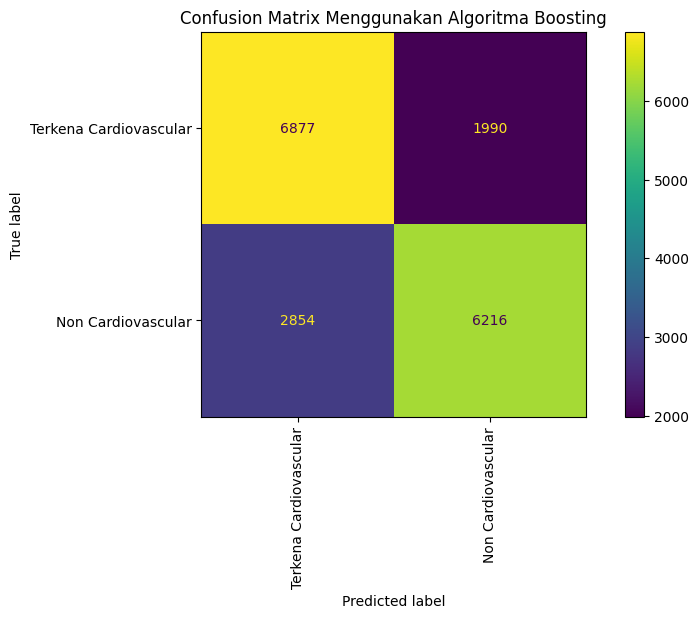

In [ ]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_boosting, title = f"Confusion Matrix Menggunakan Algoritma Boosting")

Menggunakan AdaBoostClasssifier dimaknai:

1. 6877 responden cardiovascular telah diklasifikasikan dengan benar
2. 6216 responden noncardiovascular telah diklasifikasikan dengan benar
3. 1990 responden noncardiovacular diklasifikasikan sebagai responden cardiovascular (False Positif)
4. 2854 responden cardiovascular diklasifikasikan sebagai responden noncardiovascular (False Negatif)

## Model Development dengan Catboost

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate',0.001, 0.27),
        'depth': trial.suggest_int('depth', 3, 10),
        'random_strength': trial.suggest_int('random_strength', 1, 10)
    }

    # Create the cat classifier with the suggested hyperparameters
    cat = CatBoostClassifier(**params)

    # Train the classifier and evaluate on the validation set
    cat.fit(X_train, y_train)
    accuracy = cat.score(X_test, y_test)
    return accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100,timeout=600*12)

# Print the best hyperparameters and the corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy)


[I 2024-11-24 11:53:37,632] A new study created in memory with name: no-name-18ea2cae-e4c0-4834-a71d-858a3d1f1d48


0:	learn: 0.6834455	total: 88.4ms	remaining: 46.1s
1:	learn: 0.6744027	total: 132ms	remaining: 34.4s
2:	learn: 0.6657887	total: 184ms	remaining: 31.8s
3:	learn: 0.6585759	total: 225ms	remaining: 29.2s
4:	learn: 0.6509652	total: 274ms	remaining: 28.4s
5:	learn: 0.6454576	total: 334ms	remaining: 28.8s
6:	learn: 0.6394596	total: 382ms	remaining: 28.2s
7:	learn: 0.6346179	total: 431ms	remaining: 27.8s
8:	learn: 0.6290480	total: 476ms	remaining: 27.2s
9:	learn: 0.6242272	total: 543ms	remaining: 27.9s
10:	learn: 0.6190781	total: 610ms	remaining: 28.4s
11:	learn: 0.6149619	total: 648ms	remaining: 27.6s
12:	learn: 0.6106767	total: 716ms	remaining: 28.1s
13:	learn: 0.6072976	total: 768ms	remaining: 27.9s
14:	learn: 0.6031008	total: 820ms	remaining: 27.8s
15:	learn: 0.5996907	total: 865ms	remaining: 27.4s
16:	learn: 0.5963954	total: 914ms	remaining: 27.2s
17:	learn: 0.5932825	total: 956ms	remaining: 26.8s
18:	learn: 0.5908052	total: 979ms	remaining: 26s
19:	learn: 0.5882960	total: 999ms	remainin

[I 2024-11-24 11:53:52,019] Trial 0 finished with value: 0.7301109438590623 and parameters: {'iterations': 523, 'learning_rate': 0.03573480511483551, 'depth': 9, 'random_strength': 5}. Best is trial 0 with value: 0.7301109438590623.


0:	learn: 0.6753408	total: 14.6ms	remaining: 4.93s
1:	learn: 0.6611071	total: 28.9ms	remaining: 4.85s
2:	learn: 0.6488025	total: 43.3ms	remaining: 4.83s
3:	learn: 0.6380221	total: 64.1ms	remaining: 5.36s
4:	learn: 0.6286061	total: 85.1ms	remaining: 5.67s
5:	learn: 0.6187967	total: 99.7ms	remaining: 5.52s
6:	learn: 0.6122557	total: 114ms	remaining: 5.41s
7:	learn: 0.6047776	total: 129ms	remaining: 5.31s
8:	learn: 0.5996243	total: 143ms	remaining: 5.24s
9:	learn: 0.5943835	total: 158ms	remaining: 5.18s
10:	learn: 0.5899276	total: 173ms	remaining: 5.13s
11:	learn: 0.5859232	total: 188ms	remaining: 5.1s
12:	learn: 0.5828329	total: 203ms	remaining: 5.07s
13:	learn: 0.5797001	total: 224ms	remaining: 5.19s
14:	learn: 0.5768971	total: 238ms	remaining: 5.13s
15:	learn: 0.5753671	total: 250ms	remaining: 5.02s
16:	learn: 0.5733918	total: 259ms	remaining: 4.88s
17:	learn: 0.5713705	total: 273ms	remaining: 4.85s
18:	learn: 0.5694201	total: 288ms	remaining: 4.83s
19:	learn: 0.5676993	total: 304ms	re

[I 2024-11-24 11:53:59,631] Trial 1 finished with value: 0.7294419356637118 and parameters: {'iterations': 338, 'learning_rate': 0.06687493442464965, 'depth': 8, 'random_strength': 5}. Best is trial 0 with value: 0.7301109438590623.


333:	learn: 0.5090987	total: 7.13s	remaining: 85.4ms
334:	learn: 0.5089218	total: 7.15s	remaining: 64ms
335:	learn: 0.5087780	total: 7.17s	remaining: 42.7ms
336:	learn: 0.5086335	total: 7.18s	remaining: 21.3ms
337:	learn: 0.5085259	total: 7.2s	remaining: 0us
0:	learn: 0.6885297	total: 7.71ms	remaining: 4s
1:	learn: 0.6826325	total: 14.6ms	remaining: 3.77s
2:	learn: 0.6762106	total: 20.9ms	remaining: 3.6s
3:	learn: 0.6700698	total: 28.2ms	remaining: 3.64s
4:	learn: 0.6653280	total: 35.1ms	remaining: 3.62s
5:	learn: 0.6602011	total: 42.3ms	remaining: 3.62s
6:	learn: 0.6550826	total: 49.1ms	remaining: 3.6s
7:	learn: 0.6503081	total: 55.9ms	remaining: 3.58s
8:	learn: 0.6454838	total: 62.7ms	remaining: 3.56s
9:	learn: 0.6412504	total: 69.8ms	remaining: 3.56s
10:	learn: 0.6371869	total: 76.7ms	remaining: 3.55s
11:	learn: 0.6335211	total: 87.6ms	remaining: 3.71s
12:	learn: 0.6300088	total: 94.5ms	remaining: 3.69s
13:	learn: 0.6268557	total: 103ms	remaining: 3.71s
14:	learn: 0.6230950	total: 1

[I 2024-11-24 11:54:04,067] Trial 2 finished with value: 0.7286056754195239 and parameters: {'iterations': 520, 'learning_rate': 0.03337803670811372, 'depth': 3, 'random_strength': 9}. Best is trial 0 with value: 0.7301109438590623.


0:	learn: 0.6854473	total: 8.52ms	remaining: 5.03s
1:	learn: 0.6763185	total: 16.5ms	remaining: 4.85s
2:	learn: 0.6694891	total: 23.6ms	remaining: 4.63s
3:	learn: 0.6639265	total: 34.1ms	remaining: 5.01s
4:	learn: 0.6564958	total: 41.8ms	remaining: 4.89s
5:	learn: 0.6494045	total: 49.9ms	remaining: 4.86s
6:	learn: 0.6431175	total: 57.2ms	remaining: 4.77s
7:	learn: 0.6377894	total: 65.1ms	remaining: 4.75s
8:	learn: 0.6326171	total: 74.5ms	remaining: 4.82s
9:	learn: 0.6278024	total: 82.2ms	remaining: 4.78s
10:	learn: 0.6240367	total: 89.9ms	remaining: 4.74s
11:	learn: 0.6193880	total: 98.5ms	remaining: 4.75s
12:	learn: 0.6151019	total: 106ms	remaining: 4.71s
13:	learn: 0.6121844	total: 114ms	remaining: 4.71s
14:	learn: 0.6091126	total: 123ms	remaining: 4.71s
15:	learn: 0.6061070	total: 130ms	remaining: 4.67s
16:	learn: 0.6032403	total: 138ms	remaining: 4.67s
17:	learn: 0.6009518	total: 147ms	remaining: 4.69s
18:	learn: 0.5982036	total: 156ms	remaining: 4.68s
19:	learn: 0.5959283	total: 1

[I 2024-11-24 11:54:09,950] Trial 3 finished with value: 0.7300551931761164 and parameters: {'iterations': 591, 'learning_rate': 0.03906284568177878, 'depth': 4, 'random_strength': 5}. Best is trial 0 with value: 0.7301109438590623.


0:	learn: 0.6528300	total: 15.9ms	remaining: 7.63s
1:	learn: 0.6229802	total: 39.9ms	remaining: 9.55s
2:	learn: 0.6021294	total: 66.8ms	remaining: 10.6s
3:	learn: 0.5886661	total: 94.8ms	remaining: 11.3s
4:	learn: 0.5773548	total: 122ms	remaining: 11.6s
5:	learn: 0.5705935	total: 149ms	remaining: 11.8s
6:	learn: 0.5654528	total: 177ms	remaining: 12s
7:	learn: 0.5616024	total: 203ms	remaining: 12s
8:	learn: 0.5598297	total: 234ms	remaining: 12.3s
9:	learn: 0.5584982	total: 263ms	remaining: 12.4s
10:	learn: 0.5573621	total: 293ms	remaining: 12.5s
11:	learn: 0.5569515	total: 304ms	remaining: 11.9s
12:	learn: 0.5557317	total: 320ms	remaining: 11.5s
13:	learn: 0.5552623	total: 334ms	remaining: 11.1s
14:	learn: 0.5542725	total: 348ms	remaining: 10.8s
15:	learn: 0.5539090	total: 362ms	remaining: 10.5s
16:	learn: 0.5532288	total: 376ms	remaining: 10.3s
17:	learn: 0.5524781	total: 390ms	remaining: 10s
18:	learn: 0.5520776	total: 404ms	remaining: 9.82s
19:	learn: 0.5517133	total: 418ms	remaining

[I 2024-11-24 11:54:17,495] Trial 4 finished with value: 0.7242571221497464 and parameters: {'iterations': 481, 'learning_rate': 0.21123557117374603, 'depth': 6, 'random_strength': 9}. Best is trial 0 with value: 0.7301109438590623.


471:	learn: 0.4866961	total: 6.89s	remaining: 131ms
472:	learn: 0.4866570	total: 6.9s	remaining: 117ms
473:	learn: 0.4866146	total: 6.91s	remaining: 102ms
474:	learn: 0.4865061	total: 6.92s	remaining: 87.4ms
475:	learn: 0.4864652	total: 6.93s	remaining: 72.8ms
476:	learn: 0.4863710	total: 6.94s	remaining: 58.2ms
477:	learn: 0.4862688	total: 6.95s	remaining: 43.6ms
478:	learn: 0.4861432	total: 6.96s	remaining: 29.1ms
479:	learn: 0.4860919	total: 6.97s	remaining: 14.5ms
480:	learn: 0.4859893	total: 6.98s	remaining: 0us
0:	learn: 0.6860465	total: 11.9ms	remaining: 10.9s
1:	learn: 0.6791110	total: 24.5ms	remaining: 11.2s
2:	learn: 0.6732119	total: 44ms	remaining: 13.4s
3:	learn: 0.6675164	total: 59.2ms	remaining: 13.5s
4:	learn: 0.6613992	total: 70.6ms	remaining: 12.9s
5:	learn: 0.6562922	total: 83.9ms	remaining: 12.7s
6:	learn: 0.6514506	total: 95.5ms	remaining: 12.4s
7:	learn: 0.6459451	total: 107ms	remaining: 12.2s
8:	learn: 0.6418613	total: 119ms	remaining: 12s
9:	learn: 0.6377966	tota

[I 2024-11-24 11:54:31,722] Trial 5 finished with value: 0.7301666945420081 and parameters: {'iterations': 916, 'learning_rate': 0.030298534114106376, 'depth': 7, 'random_strength': 10}. Best is trial 5 with value: 0.7301666945420081.


0:	learn: 0.6840642	total: 19ms	remaining: 13.5s
1:	learn: 0.6753431	total: 51.1ms	remaining: 18.1s
2:	learn: 0.6674654	total: 81.3ms	remaining: 19.1s
3:	learn: 0.6601474	total: 113ms	remaining: 19.9s
4:	learn: 0.6534993	total: 143ms	remaining: 20.2s
5:	learn: 0.6466307	total: 174ms	remaining: 20.4s
6:	learn: 0.6403439	total: 209ms	remaining: 21s
7:	learn: 0.6349936	total: 248ms	remaining: 21.7s
8:	learn: 0.6307580	total: 279ms	remaining: 21.7s
9:	learn: 0.6253626	total: 311ms	remaining: 21.7s
10:	learn: 0.6208144	total: 330ms	remaining: 20.9s
11:	learn: 0.6167638	total: 361ms	remaining: 20.9s
12:	learn: 0.6131811	total: 391ms	remaining: 21s
13:	learn: 0.6095136	total: 422ms	remaining: 20.9s
14:	learn: 0.6057404	total: 443ms	remaining: 20.5s
15:	learn: 0.6028470	total: 479ms	remaining: 20.7s
16:	learn: 0.6012767	total: 486ms	remaining: 19.8s
17:	learn: 0.5981903	total: 517ms	remaining: 19.8s
18:	learn: 0.5950762	total: 547ms	remaining: 19.9s
19:	learn: 0.5924715	total: 579ms	remaining:

[I 2024-11-24 11:54:58,467] Trial 6 finished with value: 0.727323409711769 and parameters: {'iterations': 709, 'learning_rate': 0.03343855021537445, 'depth': 10, 'random_strength': 6}. Best is trial 5 with value: 0.7301666945420081.


708:	learn: 0.4726695	total: 26.1s	remaining: 0us
0:	learn: 0.6382314	total: 9.71ms	remaining: 6.34s
1:	learn: 0.6096745	total: 20ms	remaining: 6.5s
2:	learn: 0.5893040	total: 30.3ms	remaining: 6.58s
3:	learn: 0.5774838	total: 40.3ms	remaining: 6.55s
4:	learn: 0.5686460	total: 54.2ms	remaining: 7.03s
5:	learn: 0.5640050	total: 67.6ms	remaining: 7.3s
6:	learn: 0.5603650	total: 77.7ms	remaining: 7.18s
7:	learn: 0.5575716	total: 88.2ms	remaining: 7.12s
8:	learn: 0.5558955	total: 105ms	remaining: 7.55s
9:	learn: 0.5548265	total: 127ms	remaining: 8.16s
10:	learn: 0.5537910	total: 137ms	remaining: 8.02s
11:	learn: 0.5532570	total: 147ms	remaining: 7.89s
12:	learn: 0.5527321	total: 158ms	remaining: 7.77s
13:	learn: 0.5522790	total: 167ms	remaining: 7.64s
14:	learn: 0.5515880	total: 177ms	remaining: 7.55s
15:	learn: 0.5511247	total: 188ms	remaining: 7.48s
16:	learn: 0.5508618	total: 198ms	remaining: 7.43s
17:	learn: 0.5505096	total: 212ms	remaining: 7.5s
18:	learn: 0.5501118	total: 224ms	remai

[I 2024-11-24 11:55:08,275] Trial 7 finished with value: 0.7187378045381055 and parameters: {'iterations': 654, 'learning_rate': 0.26784590280239307, 'depth': 6, 'random_strength': 5}. Best is trial 5 with value: 0.7301666945420081.


0:	learn: 0.6828309	total: 8.32ms	remaining: 5.36s
1:	learn: 0.6732882	total: 17.9ms	remaining: 5.75s
2:	learn: 0.6644329	total: 31.5ms	remaining: 6.74s
3:	learn: 0.6563153	total: 41.5ms	remaining: 6.65s
4:	learn: 0.6487471	total: 50.4ms	remaining: 6.45s
5:	learn: 0.6417570	total: 58.5ms	remaining: 6.23s
6:	learn: 0.6354673	total: 67.5ms	remaining: 6.15s
7:	learn: 0.6296909	total: 75.9ms	remaining: 6.05s
8:	learn: 0.6242436	total: 85.4ms	remaining: 6.03s
9:	learn: 0.6192600	total: 94.7ms	remaining: 6.01s
10:	learn: 0.6147312	total: 103ms	remaining: 5.95s
11:	learn: 0.6106004	total: 112ms	remaining: 5.91s
12:	learn: 0.6067999	total: 121ms	remaining: 5.89s
13:	learn: 0.6032304	total: 130ms	remaining: 5.85s
14:	learn: 0.5999182	total: 141ms	remaining: 5.91s
15:	learn: 0.5968669	total: 149ms	remaining: 5.86s
16:	learn: 0.5941886	total: 158ms	remaining: 5.82s
17:	learn: 0.5915722	total: 166ms	remaining: 5.79s
18:	learn: 0.5891683	total: 175ms	remaining: 5.76s
19:	learn: 0.5868834	total: 183

[I 2024-11-24 11:55:15,281] Trial 8 finished with value: 0.730222445224954 and parameters: {'iterations': 645, 'learning_rate': 0.03842852734900321, 'depth': 5, 'random_strength': 1}. Best is trial 8 with value: 0.730222445224954.


633:	learn: 0.5346041	total: 6.47s	remaining: 112ms
634:	learn: 0.5345667	total: 6.47s	remaining: 102ms
635:	learn: 0.5345480	total: 6.49s	remaining: 91.8ms
636:	learn: 0.5345196	total: 6.49s	remaining: 81.6ms
637:	learn: 0.5344962	total: 6.5s	remaining: 71.4ms
638:	learn: 0.5344856	total: 6.51s	remaining: 61.2ms
639:	learn: 0.5344636	total: 6.52s	remaining: 51ms
640:	learn: 0.5344511	total: 6.53s	remaining: 40.8ms
641:	learn: 0.5344313	total: 6.54s	remaining: 30.6ms
642:	learn: 0.5343898	total: 6.55s	remaining: 20.4ms
643:	learn: 0.5343764	total: 6.56s	remaining: 10.2ms
644:	learn: 0.5343547	total: 6.57s	remaining: 0us
0:	learn: 0.6575708	total: 7.55ms	remaining: 5.99s
1:	learn: 0.6328074	total: 17.8ms	remaining: 7.05s
2:	learn: 0.6144880	total: 24.8ms	remaining: 6.55s
3:	learn: 0.6040799	total: 32.2ms	remaining: 6.35s
4:	learn: 0.5953026	total: 39.4ms	remaining: 6.22s
5:	learn: 0.5886796	total: 47.6ms	remaining: 6.25s
6:	learn: 0.5840581	total: 55.1ms	remaining: 6.2s
7:	learn: 0.5784

[I 2024-11-24 11:55:24,277] Trial 9 finished with value: 0.7282711713218487 and parameters: {'iterations': 794, 'learning_rate': 0.19767498471144593, 'depth': 3, 'random_strength': 7}. Best is trial 8 with value: 0.730222445224954.


793:	learn: 0.5291549	total: 8.4s	remaining: 0us
0:	learn: 0.6685852	total: 5.06ms	remaining: 643ms
1:	learn: 0.6485250	total: 11.1ms	remaining: 701ms
2:	learn: 0.6323226	total: 16.1ms	remaining: 671ms
3:	learn: 0.6191708	total: 21.1ms	remaining: 653ms
4:	learn: 0.6085866	total: 26.5ms	remaining: 651ms
5:	learn: 0.5999364	total: 33.1ms	remaining: 674ms
6:	learn: 0.5925859	total: 38.2ms	remaining: 660ms
7:	learn: 0.5866004	total: 43.2ms	remaining: 648ms
8:	learn: 0.5819694	total: 48.5ms	remaining: 641ms
9:	learn: 0.5779757	total: 53.6ms	remaining: 632ms
10:	learn: 0.5745566	total: 58.6ms	remaining: 624ms
11:	learn: 0.5717198	total: 63.9ms	remaining: 618ms
12:	learn: 0.5690395	total: 72.3ms	remaining: 640ms
13:	learn: 0.5669842	total: 77.5ms	remaining: 631ms
14:	learn: 0.5655053	total: 83.1ms	remaining: 626ms
15:	learn: 0.5635508	total: 88.5ms	remaining: 620ms
16:	learn: 0.5622308	total: 93.6ms	remaining: 611ms
17:	learn: 0.5610977	total: 98.8ms	remaining: 604ms
18:	learn: 0.5599603	tota

[I 2024-11-24 11:55:25,285] Trial 10 finished with value: 0.7292746836148742 and parameters: {'iterations': 128, 'learning_rate': 0.11190962923246597, 'depth': 5, 'random_strength': 1}. Best is trial 8 with value: 0.730222445224954.


0:	learn: 0.6682111	total: 10.9ms	remaining: 10.4s
1:	learn: 0.6475643	total: 27.9ms	remaining: 13.3s
2:	learn: 0.6309181	total: 40.1ms	remaining: 12.7s
3:	learn: 0.6180943	total: 52.4ms	remaining: 12.4s
4:	learn: 0.6071235	total: 65.3ms	remaining: 12.4s
5:	learn: 0.5981152	total: 77.3ms	remaining: 12.2s
6:	learn: 0.5902175	total: 88.7ms	remaining: 12s
7:	learn: 0.5845080	total: 101ms	remaining: 12s
8:	learn: 0.5790860	total: 114ms	remaining: 11.9s
9:	learn: 0.5749384	total: 126ms	remaining: 11.9s
10:	learn: 0.5712860	total: 138ms	remaining: 11.8s
11:	learn: 0.5681939	total: 150ms	remaining: 11.8s
12:	learn: 0.5653849	total: 162ms	remaining: 11.7s
13:	learn: 0.5631214	total: 174ms	remaining: 11.7s
14:	learn: 0.5613206	total: 186ms	remaining: 11.6s
15:	learn: 0.5597401	total: 198ms	remaining: 11.6s
16:	learn: 0.5583225	total: 220ms	remaining: 12.1s
17:	learn: 0.5568719	total: 239ms	remaining: 12.4s
18:	learn: 0.5557988	total: 253ms	remaining: 12.4s
19:	learn: 0.5549301	total: 268ms	rema

[I 2024-11-24 11:55:40,321] Trial 11 finished with value: 0.7258738919551765 and parameters: {'iterations': 952, 'learning_rate': 0.09311671739538385, 'depth': 7, 'random_strength': 1}. Best is trial 8 with value: 0.730222445224954.


945:	learn: 0.4640737	total: 14.3s	remaining: 90.8ms
946:	learn: 0.4640362	total: 14.3s	remaining: 75.7ms
947:	learn: 0.4639853	total: 14.3s	remaining: 60.5ms
948:	learn: 0.4639284	total: 14.4s	remaining: 45.4ms
949:	learn: 0.4638857	total: 14.4s	remaining: 30.2ms
950:	learn: 0.4638584	total: 14.4s	remaining: 15.1ms
951:	learn: 0.4638003	total: 14.4s	remaining: 0us
0:	learn: 0.6539490	total: 11.9ms	remaining: 11.9s
1:	learn: 0.6267758	total: 21.7ms	remaining: 10.8s
2:	learn: 0.6065827	total: 35.6ms	remaining: 11.8s
3:	learn: 0.5935150	total: 47.7ms	remaining: 11.8s
4:	learn: 0.5834478	total: 59.7ms	remaining: 11.9s
5:	learn: 0.5767770	total: 71.2ms	remaining: 11.8s
6:	learn: 0.5703746	total: 83.4ms	remaining: 11.8s
7:	learn: 0.5666356	total: 95.7ms	remaining: 11.8s
8:	learn: 0.5628824	total: 107ms	remaining: 11.8s
9:	learn: 0.5603024	total: 119ms	remaining: 11.8s
10:	learn: 0.5578618	total: 131ms	remaining: 11.7s
11:	learn: 0.5562214	total: 143ms	remaining: 11.7s
12:	learn: 0.5549059	t

[I 2024-11-24 11:55:56,101] Trial 12 finished with value: 0.717344037464459 and parameters: {'iterations': 998, 'learning_rate': 0.15585034971780687, 'depth': 7, 'random_strength': 3}. Best is trial 8 with value: 0.730222445224954.


994:	learn: 0.4293331	total: 15.1s	remaining: 45.5ms
995:	learn: 0.4292719	total: 15.1s	remaining: 30.3ms
996:	learn: 0.4291886	total: 15.1s	remaining: 15.2ms
997:	learn: 0.4291458	total: 15.1s	remaining: 0us
0:	learn: 0.6928042	total: 8.83ms	remaining: 7.45s
1:	learn: 0.6924694	total: 18.1ms	remaining: 7.64s
2:	learn: 0.6921342	total: 27.1ms	remaining: 7.61s
3:	learn: 0.6917985	total: 35.9ms	remaining: 7.56s
4:	learn: 0.6914258	total: 44.5ms	remaining: 7.47s
5:	learn: 0.6911248	total: 53.4ms	remaining: 7.47s
6:	learn: 0.6907618	total: 62.3ms	remaining: 7.46s
7:	learn: 0.6903750	total: 71.2ms	remaining: 7.45s
8:	learn: 0.6900935	total: 79.9ms	remaining: 7.42s
9:	learn: 0.6898176	total: 88.2ms	remaining: 7.36s
10:	learn: 0.6894670	total: 97.4ms	remaining: 7.38s
11:	learn: 0.6891405	total: 106ms	remaining: 7.39s
12:	learn: 0.6887652	total: 115ms	remaining: 7.35s
13:	learn: 0.6883586	total: 124ms	remaining: 7.33s
14:	learn: 0.6880215	total: 132ms	remaining: 7.32s
15:	learn: 0.6877188	tota

[I 2024-11-24 11:56:06,931] Trial 13 finished with value: 0.720243072977644 and parameters: {'iterations': 845, 'learning_rate': 0.0015476071623594274, 'depth': 5, 'random_strength': 10}. Best is trial 8 with value: 0.730222445224954.


844:	learn: 0.5768126	total: 10.2s	remaining: 0us
0:	learn: 0.6926679	total: 15.3ms	remaining: 13s
1:	learn: 0.6921929	total: 30.3ms	remaining: 12.9s
2:	learn: 0.6917437	total: 45.1ms	remaining: 12.7s
3:	learn: 0.6913041	total: 59.8ms	remaining: 12.7s
4:	learn: 0.6908303	total: 74.7ms	remaining: 12.6s
5:	learn: 0.6903519	total: 89.7ms	remaining: 12.6s
6:	learn: 0.6899212	total: 104ms	remaining: 12.5s
7:	learn: 0.6894512	total: 119ms	remaining: 12.5s
8:	learn: 0.6890127	total: 134ms	remaining: 12.5s
9:	learn: 0.6885556	total: 149ms	remaining: 12.5s
10:	learn: 0.6880921	total: 171ms	remaining: 13.1s
11:	learn: 0.6876348	total: 194ms	remaining: 13.5s
12:	learn: 0.6871888	total: 208ms	remaining: 13.4s
13:	learn: 0.6867234	total: 230ms	remaining: 13.7s
14:	learn: 0.6862539	total: 245ms	remaining: 13.6s
15:	learn: 0.6858114	total: 260ms	remaining: 13.6s
16:	learn: 0.6853813	total: 276ms	remaining: 13.5s
17:	learn: 0.6849499	total: 290ms	remaining: 13.4s
18:	learn: 0.6844934	total: 306ms	rema

[I 2024-11-24 11:56:23,260] Trial 14 finished with value: 0.7260968946869599 and parameters: {'iterations': 850, 'learning_rate': 0.0017018485351196488, 'depth': 8, 'random_strength': 3}. Best is trial 8 with value: 0.730222445224954.


849:	learn: 0.5618403	total: 15.7s	remaining: 0us
0:	learn: 0.6711093	total: 11ms	remaining: 3.14s
1:	learn: 0.6522722	total: 20.5ms	remaining: 2.9s
2:	learn: 0.6370712	total: 29.4ms	remaining: 2.77s
3:	learn: 0.6245705	total: 38.3ms	remaining: 2.69s
4:	learn: 0.6156336	total: 46.5ms	remaining: 2.6s
5:	learn: 0.6074437	total: 54.9ms	remaining: 2.55s
6:	learn: 0.5998865	total: 63.4ms	remaining: 2.52s
7:	learn: 0.5930943	total: 73.3ms	remaining: 2.54s
8:	learn: 0.5875382	total: 82.6ms	remaining: 2.53s
9:	learn: 0.5837965	total: 92.1ms	remaining: 2.53s
10:	learn: 0.5802225	total: 102ms	remaining: 2.53s
11:	learn: 0.5770010	total: 111ms	remaining: 2.52s
12:	learn: 0.5744145	total: 120ms	remaining: 2.5s
13:	learn: 0.5719833	total: 129ms	remaining: 2.49s
14:	learn: 0.5699874	total: 138ms	remaining: 2.49s
15:	learn: 0.5681061	total: 148ms	remaining: 2.49s
16:	learn: 0.5665691	total: 157ms	remaining: 2.48s
17:	learn: 0.5654683	total: 166ms	remaining: 2.46s
18:	learn: 0.5638818	total: 176ms	rem

[I 2024-11-24 11:56:26,535] Trial 15 finished with value: 0.7308357027373585 and parameters: {'iterations': 285, 'learning_rate': 0.08627709429388145, 'depth': 5, 'random_strength': 3}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6592513	total: 8.87ms	remaining: 3.16s
1:	learn: 0.6334666	total: 20.7ms	remaining: 3.68s
2:	learn: 0.6166716	total: 29.1ms	remaining: 3.43s
3:	learn: 0.6034852	total: 37.8ms	remaining: 3.33s
4:	learn: 0.5947987	total: 46.3ms	remaining: 3.26s
5:	learn: 0.5860309	total: 54.5ms	remaining: 3.19s
6:	learn: 0.5795176	total: 63.8ms	remaining: 3.19s
7:	learn: 0.5747401	total: 77.6ms	remaining: 3.38s
8:	learn: 0.5706335	total: 86ms	remaining: 3.32s
9:	learn: 0.5678795	total: 94.7ms	remaining: 3.29s
10:	learn: 0.5657310	total: 104ms	remaining: 3.27s
11:	learn: 0.5640799	total: 113ms	remaining: 3.25s
12:	learn: 0.5624184	total: 123ms	remaining: 3.26s
13:	learn: 0.5608333	total: 133ms	remaining: 3.25s
14:	learn: 0.5597674	total: 142ms	remaining: 3.24s
15:	learn: 0.5586996	total: 152ms	remaining: 3.24s
16:	learn: 0.5578986	total: 161ms	remaining: 3.23s
17:	learn: 0.5570104	total: 171ms	remaining: 3.21s
18:	learn: 0.5562688	total: 180ms	remaining: 3.2s
19:	learn: 0.5557175	total: 189ms	

[I 2024-11-24 11:56:32,515] Trial 16 finished with value: 0.7293304342978202 and parameters: {'iterations': 357, 'learning_rate': 0.13695995432774696, 'depth': 5, 'random_strength': 3}. Best is trial 15 with value: 0.7308357027373585.


350:	learn: 0.5245852	total: 5.47s	remaining: 93.5ms
351:	learn: 0.5245309	total: 5.48s	remaining: 77.9ms
352:	learn: 0.5245051	total: 5.49s	remaining: 62.2ms
353:	learn: 0.5244220	total: 5.5s	remaining: 46.6ms
354:	learn: 0.5243614	total: 5.51s	remaining: 31.1ms
355:	learn: 0.5243176	total: 5.52s	remaining: 15.5ms
356:	learn: 0.5242490	total: 5.53s	remaining: 0us
0:	learn: 0.6761656	total: 4.39ms	remaining: 465ms
1:	learn: 0.6613283	total: 8.6ms	remaining: 452ms
2:	learn: 0.6491397	total: 12.8ms	remaining: 443ms
3:	learn: 0.6385589	total: 18.4ms	remaining: 475ms
4:	learn: 0.6291938	total: 22.9ms	remaining: 468ms
5:	learn: 0.6220469	total: 27.2ms	remaining: 457ms
6:	learn: 0.6144412	total: 31.7ms	remaining: 453ms
7:	learn: 0.6090785	total: 35.9ms	remaining: 444ms
8:	learn: 0.6030971	total: 40.2ms	remaining: 437ms
9:	learn: 0.5985867	total: 44.9ms	remaining: 435ms
10:	learn: 0.5941714	total: 49.4ms	remaining: 431ms
11:	learn: 0.5900076	total: 53.9ms	remaining: 427ms
12:	learn: 0.5866961

[I 2024-11-24 11:56:33,373] Trial 17 finished with value: 0.7274349110776607 and parameters: {'iterations': 107, 'learning_rate': 0.07761200695067486, 'depth': 4, 'random_strength': 2}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6648176	total: 7.39ms	remaining: 2.14s
1:	learn: 0.6436403	total: 15.2ms	remaining: 2.18s
2:	learn: 0.6290576	total: 23.5ms	remaining: 2.25s
3:	learn: 0.6154695	total: 31.7ms	remaining: 2.27s
4:	learn: 0.6051656	total: 39.1ms	remaining: 2.23s
5:	learn: 0.5958216	total: 47.9ms	remaining: 2.27s
6:	learn: 0.5898764	total: 55.5ms	remaining: 2.25s
7:	learn: 0.5842283	total: 63.4ms	remaining: 2.23s
8:	learn: 0.5793298	total: 71.3ms	remaining: 2.23s
9:	learn: 0.5756125	total: 78.9ms	remaining: 2.21s
10:	learn: 0.5729233	total: 86.8ms	remaining: 2.2s
11:	learn: 0.5698360	total: 94.5ms	remaining: 2.19s
12:	learn: 0.5674906	total: 103ms	remaining: 2.19s
13:	learn: 0.5657447	total: 111ms	remaining: 2.18s
14:	learn: 0.5641133	total: 118ms	remaining: 2.17s
15:	learn: 0.5630363	total: 128ms	remaining: 2.2s
16:	learn: 0.5617795	total: 140ms	remaining: 2.25s
17:	learn: 0.5607058	total: 148ms	remaining: 2.24s
18:	learn: 0.5598949	total: 157ms	remaining: 2.24s
19:	learn: 0.5592946	total: 165

[I 2024-11-24 11:56:36,401] Trial 18 finished with value: 0.7289401795171991 and parameters: {'iterations': 290, 'learning_rate': 0.11429791585763246, 'depth': 4, 'random_strength': 2}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6769077	total: 11.4ms	remaining: 4.86s
1:	learn: 0.6639988	total: 22.2ms	remaining: 4.72s
2:	learn: 0.6514801	total: 32.5ms	remaining: 4.59s
3:	learn: 0.6406360	total: 42.3ms	remaining: 4.47s
4:	learn: 0.6301095	total: 52.3ms	remaining: 4.41s
5:	learn: 0.6216511	total: 62.4ms	remaining: 4.38s
6:	learn: 0.6135262	total: 71.8ms	remaining: 4.3s
7:	learn: 0.6072356	total: 81.6ms	remaining: 4.27s
8:	learn: 0.6022301	total: 92ms	remaining: 4.27s
9:	learn: 0.5980867	total: 101ms	remaining: 4.2s
10:	learn: 0.5941227	total: 115ms	remaining: 4.35s
11:	learn: 0.5893790	total: 125ms	remaining: 4.33s
12:	learn: 0.5856488	total: 133ms	remaining: 4.25s
13:	learn: 0.5823524	total: 144ms	remaining: 4.24s
14:	learn: 0.5798740	total: 156ms	remaining: 4.27s
15:	learn: 0.5771939	total: 166ms	remaining: 4.26s
16:	learn: 0.5745250	total: 176ms	remaining: 4.25s
17:	learn: 0.5724983	total: 187ms	remaining: 4.25s
18:	learn: 0.5706229	total: 197ms	remaining: 4.24s
19:	learn: 0.5684608	total: 209ms	re

[I 2024-11-24 11:56:42,152] Trial 19 finished with value: 0.7297764397613871 and parameters: {'iterations': 427, 'learning_rate': 0.06934435557943439, 'depth': 6, 'random_strength': 4}. Best is trial 15 with value: 0.7308357027373585.


426:	learn: 0.5244044	total: 5.27s	remaining: 0us
0:	learn: 0.6530526	total: 24.9ms	remaining: 5.76s
1:	learn: 0.6242859	total: 46.4ms	remaining: 5.34s
2:	learn: 0.6066708	total: 69.8ms	remaining: 5.33s
3:	learn: 0.5925327	total: 92.1ms	remaining: 5.25s
4:	learn: 0.5842640	total: 119ms	remaining: 5.4s
5:	learn: 0.5769449	total: 141ms	remaining: 5.32s
6:	learn: 0.5714494	total: 164ms	remaining: 5.27s
7:	learn: 0.5683301	total: 190ms	remaining: 5.33s
8:	learn: 0.5649639	total: 217ms	remaining: 5.37s
9:	learn: 0.5630892	total: 250ms	remaining: 5.55s
10:	learn: 0.5616331	total: 268ms	remaining: 5.39s
11:	learn: 0.5600241	total: 293ms	remaining: 5.37s
12:	learn: 0.5585802	total: 319ms	remaining: 5.37s
13:	learn: 0.5574118	total: 343ms	remaining: 5.35s
14:	learn: 0.5563803	total: 368ms	remaining: 5.32s
15:	learn: 0.5556598	total: 393ms	remaining: 5.31s
16:	learn: 0.5550266	total: 419ms	remaining: 5.3s
17:	learn: 0.5544710	total: 444ms	remaining: 5.28s
18:	learn: 0.5537980	total: 469ms	remain

[I 2024-11-24 11:56:46,343] Trial 20 finished with value: 0.7296649383954954 and parameters: {'iterations': 232, 'learning_rate': 0.16672599253638026, 'depth': 5, 'random_strength': 2}. Best is trial 15 with value: 0.7308357027373585.


227:	learn: 0.5288404	total: 3.64s	remaining: 63.9ms
228:	learn: 0.5287276	total: 3.65s	remaining: 47.9ms
229:	learn: 0.5286429	total: 3.66s	remaining: 31.8ms
230:	learn: 0.5285527	total: 3.67s	remaining: 15.9ms
231:	learn: 0.5284682	total: 3.68s	remaining: 0us
0:	learn: 0.6807982	total: 11.7ms	remaining: 8.54s
1:	learn: 0.6689498	total: 24.3ms	remaining: 8.88s
2:	learn: 0.6594007	total: 36.1ms	remaining: 8.78s
3:	learn: 0.6506046	total: 47.9ms	remaining: 8.72s
4:	learn: 0.6413603	total: 60.3ms	remaining: 8.77s
5:	learn: 0.6332360	total: 72.3ms	remaining: 8.74s
6:	learn: 0.6261223	total: 84ms	remaining: 8.7s
7:	learn: 0.6186356	total: 95.9ms	remaining: 8.68s
8:	learn: 0.6137705	total: 108ms	remaining: 8.71s
9:	learn: 0.6089004	total: 120ms	remaining: 8.68s
10:	learn: 0.6035122	total: 132ms	remaining: 8.67s
11:	learn: 0.5996157	total: 149ms	remaining: 8.92s
12:	learn: 0.5953004	total: 166ms	remaining: 9.2s
13:	learn: 0.5918944	total: 178ms	remaining: 9.15s
14:	learn: 0.5885903	total: 19

[I 2024-11-24 11:56:58,743] Trial 21 finished with value: 0.7287171767854156 and parameters: {'iterations': 732, 'learning_rate': 0.05512518804130903, 'depth': 7, 'random_strength': 7}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6665472	total: 14.9ms	remaining: 9.15s
1:	learn: 0.6453581	total: 29.8ms	remaining: 9.16s
2:	learn: 0.6281175	total: 45.4ms	remaining: 9.28s
3:	learn: 0.6139062	total: 60.5ms	remaining: 9.28s
4:	learn: 0.6027915	total: 76.4ms	remaining: 9.35s
5:	learn: 0.5934189	total: 91.9ms	remaining: 9.36s
6:	learn: 0.5860946	total: 107ms	remaining: 9.35s
7:	learn: 0.5798686	total: 124ms	remaining: 9.41s
8:	learn: 0.5744485	total: 139ms	remaining: 9.39s
9:	learn: 0.5706639	total: 155ms	remaining: 9.39s
10:	learn: 0.5674224	total: 171ms	remaining: 9.41s
11:	learn: 0.5640076	total: 187ms	remaining: 9.43s
12:	learn: 0.5617038	total: 202ms	remaining: 9.38s
13:	learn: 0.5596612	total: 223ms	remaining: 9.63s
14:	learn: 0.5576986	total: 244ms	remaining: 9.78s
15:	learn: 0.5560362	total: 260ms	remaining: 9.76s
16:	learn: 0.5546839	total: 275ms	remaining: 9.72s
17:	learn: 0.5536720	total: 290ms	remaining: 9.66s
18:	learn: 0.5526273	total: 305ms	remaining: 9.61s
19:	learn: 0.5517483	total: 322ms	r

[I 2024-11-24 11:57:10,214] Trial 22 finished with value: 0.7238111166861794 and parameters: {'iterations': 617, 'learning_rate': 0.09737297362242874, 'depth': 8, 'random_strength': 1}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6898552	total: 17.1ms	remaining: 15.6s
1:	learn: 0.6862165	total: 45ms	remaining: 20.6s
2:	learn: 0.6832472	total: 70.6ms	remaining: 21.5s
3:	learn: 0.6794032	total: 98.9ms	remaining: 22.5s
4:	learn: 0.6758369	total: 136ms	remaining: 24.7s
5:	learn: 0.6725801	total: 169ms	remaining: 25.6s
6:	learn: 0.6697766	total: 198ms	remaining: 25.7s
7:	learn: 0.6665896	total: 217ms	remaining: 24.6s
8:	learn: 0.6638793	total: 238ms	remaining: 23.9s
9:	learn: 0.6612078	total: 261ms	remaining: 23.6s
10:	learn: 0.6584965	total: 283ms	remaining: 23.3s
11:	learn: 0.6560504	total: 310ms	remaining: 23.3s
12:	learn: 0.6538287	total: 326ms	remaining: 22.6s
13:	learn: 0.6516956	total: 339ms	remaining: 21.8s
14:	learn: 0.6494117	total: 365ms	remaining: 21.9s
15:	learn: 0.6471352	total: 389ms	remaining: 21.9s
16:	learn: 0.6445688	total: 418ms	remaining: 22.1s
17:	learn: 0.6419948	total: 446ms	remaining: 22.2s
18:	learn: 0.6394971	total: 473ms	remaining: 22.3s
19:	learn: 0.6370340	total: 498ms	remai

[I 2024-11-24 11:57:22,342] Trial 23 finished with value: 0.7300551931761164 and parameters: {'iterations': 915, 'learning_rate': 0.01548241773610843, 'depth': 6, 'random_strength': 8}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6829379	total: 26.3ms	remaining: 11.3s
1:	learn: 0.6716662	total: 42ms	remaining: 9.03s
2:	learn: 0.6634214	total: 51.5ms	remaining: 7.36s
3:	learn: 0.6560045	total: 62.6ms	remaining: 6.7s
4:	learn: 0.6467647	total: 72ms	remaining: 6.15s
5:	learn: 0.6392496	total: 82ms	remaining: 5.82s
6:	learn: 0.6327196	total: 92.5ms	remaining: 5.62s
7:	learn: 0.6272408	total: 103ms	remaining: 5.47s
8:	learn: 0.6224011	total: 114ms	remaining: 5.34s
9:	learn: 0.6169394	total: 129ms	remaining: 5.46s
10:	learn: 0.6130865	total: 149ms	remaining: 5.69s
11:	learn: 0.6084446	total: 169ms	remaining: 5.93s
12:	learn: 0.6040177	total: 190ms	remaining: 6.12s
13:	learn: 0.6003364	total: 209ms	remaining: 6.25s
14:	learn: 0.5973242	total: 231ms	remaining: 6.41s
15:	learn: 0.5949419	total: 250ms	remaining: 6.5s
16:	learn: 0.5925395	total: 271ms	remaining: 6.61s
17:	learn: 0.5900036	total: 292ms	remaining: 6.71s
18:	learn: 0.5874243	total: 311ms	remaining: 6.76s
19:	learn: 0.5854878	total: 333ms	remainin

[I 2024-11-24 11:57:28,545] Trial 24 finished with value: 0.7306684506885209 and parameters: {'iterations': 432, 'learning_rate': 0.049542053567951064, 'depth': 4, 'random_strength': 4}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6806191	total: 8.25ms	remaining: 3.5s
1:	learn: 0.6670107	total: 16ms	remaining: 3.38s
2:	learn: 0.6560625	total: 23.4ms	remaining: 3.29s
3:	learn: 0.6473248	total: 31.6ms	remaining: 3.33s
4:	learn: 0.6379650	total: 39.2ms	remaining: 3.29s
5:	learn: 0.6299075	total: 46.7ms	remaining: 3.26s
6:	learn: 0.6234100	total: 55.3ms	remaining: 3.3s
7:	learn: 0.6173506	total: 63.5ms	remaining: 3.31s
8:	learn: 0.6119837	total: 71.9ms	remaining: 3.32s
9:	learn: 0.6068084	total: 79.9ms	remaining: 3.31s
10:	learn: 0.6027878	total: 88.1ms	remaining: 3.32s
11:	learn: 0.5986800	total: 95.7ms	remaining: 3.29s
12:	learn: 0.5945467	total: 103ms	remaining: 3.28s
13:	learn: 0.5911197	total: 111ms	remaining: 3.26s
14:	learn: 0.5878985	total: 119ms	remaining: 3.24s
15:	learn: 0.5847098	total: 127ms	remaining: 3.25s
16:	learn: 0.5821113	total: 135ms	remaining: 3.24s
17:	learn: 0.5800448	total: 143ms	remaining: 3.24s
18:	learn: 0.5781977	total: 152ms	remaining: 3.24s
19:	learn: 0.5765727	total: 160ms

[I 2024-11-24 11:57:32,853] Trial 25 finished with value: 0.730222445224954 and parameters: {'iterations': 425, 'learning_rate': 0.06128353128188156, 'depth': 4, 'random_strength': 4}. Best is trial 15 with value: 0.7308357027373585.


423:	learn: 0.5410921	total: 3.9s	remaining: 9.19ms
424:	learn: 0.5410667	total: 3.91s	remaining: 0us
0:	learn: 0.6720802	total: 3.84ms	remaining: 749ms
1:	learn: 0.6543210	total: 7.74ms	remaining: 751ms
2:	learn: 0.6391843	total: 11.4ms	remaining: 733ms
3:	learn: 0.6271445	total: 15.2ms	remaining: 732ms
4:	learn: 0.6194311	total: 19.2ms	remaining: 732ms
5:	learn: 0.6106275	total: 23.5ms	remaining: 744ms
6:	learn: 0.6042053	total: 27.6ms	remaining: 744ms
7:	learn: 0.5983302	total: 31.7ms	remaining: 746ms
8:	learn: 0.5919481	total: 35.9ms	remaining: 746ms
9:	learn: 0.5878648	total: 40ms	remaining: 744ms
10:	learn: 0.5841630	total: 44.5ms	remaining: 749ms
11:	learn: 0.5806741	total: 48.9ms	remaining: 750ms
12:	learn: 0.5778215	total: 53.1ms	remaining: 747ms
13:	learn: 0.5753100	total: 57.2ms	remaining: 743ms
14:	learn: 0.5734049	total: 61.6ms	remaining: 743ms
15:	learn: 0.5720508	total: 65.7ms	remaining: 740ms
16:	learn: 0.5698289	total: 69.8ms	remaining: 735ms
17:	learn: 0.5686022	total

[I 2024-11-24 11:57:34,058] Trial 26 finished with value: 0.7299994424931705 and parameters: {'iterations': 196, 'learning_rate': 0.11736721716907451, 'depth': 3, 'random_strength': 4}. Best is trial 15 with value: 0.7308357027373585.


179:	learn: 0.5473970	total: 803ms	remaining: 71.4ms
180:	learn: 0.5473758	total: 810ms	remaining: 67.2ms
181:	learn: 0.5473330	total: 818ms	remaining: 62.9ms
182:	learn: 0.5473198	total: 822ms	remaining: 58.4ms
183:	learn: 0.5472521	total: 827ms	remaining: 53.9ms
184:	learn: 0.5472200	total: 831ms	remaining: 49.4ms
185:	learn: 0.5472036	total: 835ms	remaining: 44.9ms
186:	learn: 0.5471862	total: 838ms	remaining: 40.4ms
187:	learn: 0.5471637	total: 843ms	remaining: 35.9ms
188:	learn: 0.5471343	total: 847ms	remaining: 31.4ms
189:	learn: 0.5471060	total: 851ms	remaining: 26.9ms
190:	learn: 0.5470658	total: 855ms	remaining: 22.4ms
191:	learn: 0.5470432	total: 859ms	remaining: 17.9ms
192:	learn: 0.5470167	total: 863ms	remaining: 13.4ms
193:	learn: 0.5469787	total: 867ms	remaining: 8.94ms
194:	learn: 0.5469516	total: 871ms	remaining: 4.47ms
195:	learn: 0.5468986	total: 875ms	remaining: 0us
0:	learn: 0.6711962	total: 9.15ms	remaining: 3.83s
1:	learn: 0.6526860	total: 17.8ms	remaining: 3.72s


[I 2024-11-24 11:57:40,819] Trial 27 finished with value: 0.7296091877125495 and parameters: {'iterations': 419, 'learning_rate': 0.08686858258666715, 'depth': 5, 'random_strength': 2}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6809108	total: 7.67ms	remaining: 1.93s
1:	learn: 0.6688150	total: 15.5ms	remaining: 1.95s
2:	learn: 0.6575875	total: 23.4ms	remaining: 1.95s
3:	learn: 0.6484303	total: 31.3ms	remaining: 1.95s
4:	learn: 0.6403087	total: 39ms	remaining: 1.93s
5:	learn: 0.6326806	total: 46.9ms	remaining: 1.93s
6:	learn: 0.6260860	total: 54.5ms	remaining: 1.91s
7:	learn: 0.6201374	total: 62.2ms	remaining: 1.91s
8:	learn: 0.6156129	total: 70.9ms	remaining: 1.92s
9:	learn: 0.6103529	total: 79ms	remaining: 1.92s
10:	learn: 0.6054937	total: 86.6ms	remaining: 1.91s
11:	learn: 0.6017676	total: 95.4ms	remaining: 1.92s
12:	learn: 0.5981563	total: 103ms	remaining: 1.91s
13:	learn: 0.5950445	total: 113ms	remaining: 1.93s
14:	learn: 0.5914406	total: 124ms	remaining: 1.96s
15:	learn: 0.5892501	total: 132ms	remaining: 1.95s
16:	learn: 0.5870700	total: 140ms	remaining: 1.94s
17:	learn: 0.5848679	total: 149ms	remaining: 1.94s
18:	learn: 0.5825219	total: 157ms	remaining: 1.93s
19:	learn: 0.5807107	total: 166ms

[I 2024-11-24 11:57:43,463] Trial 28 finished with value: 0.7283269220047945 and parameters: {'iterations': 253, 'learning_rate': 0.052573896086859986, 'depth': 4, 'random_strength': 3}. Best is trial 15 with value: 0.7308357027373585.


250:	learn: 0.5469164	total: 2.28s	remaining: 18.2ms
251:	learn: 0.5468805	total: 2.29s	remaining: 9.09ms
252:	learn: 0.5468350	total: 2.3s	remaining: 0us
0:	learn: 0.6890834	total: 7.01ms	remaining: 3.71s
1:	learn: 0.6845104	total: 14.6ms	remaining: 3.86s
2:	learn: 0.6802835	total: 22.1ms	remaining: 3.9s
3:	learn: 0.6762846	total: 32.5ms	remaining: 4.28s
4:	learn: 0.6727155	total: 42.9ms	remaining: 4.51s
5:	learn: 0.6692173	total: 53.4ms	remaining: 4.67s
6:	learn: 0.6654782	total: 61.7ms	remaining: 4.62s
7:	learn: 0.6624802	total: 68.8ms	remaining: 4.5s
8:	learn: 0.6593257	total: 76.3ms	remaining: 4.42s
9:	learn: 0.6563464	total: 83.3ms	remaining: 4.34s
10:	learn: 0.6532804	total: 89.9ms	remaining: 4.25s
11:	learn: 0.6504983	total: 97.2ms	remaining: 4.2s
12:	learn: 0.6474531	total: 104ms	remaining: 4.14s
13:	learn: 0.6446267	total: 111ms	remaining: 4.11s
14:	learn: 0.6421610	total: 118ms	remaining: 4.07s
15:	learn: 0.6393720	total: 125ms	remaining: 4.03s
16:	learn: 0.6371225	total: 13

[I 2024-11-24 11:57:48,301] Trial 29 finished with value: 0.7274906617606066 and parameters: {'iterations': 531, 'learning_rate': 0.019497335025357655, 'depth': 3, 'random_strength': 4}. Best is trial 15 with value: 0.7308357027373585.


519:	learn: 0.5518447	total: 4.3s	remaining: 91ms
520:	learn: 0.5518365	total: 4.32s	remaining: 83ms
521:	learn: 0.5518271	total: 4.34s	remaining: 74.8ms
522:	learn: 0.5518202	total: 4.35s	remaining: 66.5ms
523:	learn: 0.5517970	total: 4.36s	remaining: 58.2ms
524:	learn: 0.5517936	total: 4.36s	remaining: 49.9ms
525:	learn: 0.5517845	total: 4.37s	remaining: 41.6ms
526:	learn: 0.5517580	total: 4.38s	remaining: 33.2ms
527:	learn: 0.5517496	total: 4.39s	remaining: 24.9ms
528:	learn: 0.5517318	total: 4.39s	remaining: 16.6ms
529:	learn: 0.5517157	total: 4.4s	remaining: 8.3ms
530:	learn: 0.5516977	total: 4.41s	remaining: 0us
0:	learn: 0.6807697	total: 8.77ms	remaining: 3.1s
1:	learn: 0.6703271	total: 17.6ms	remaining: 3.1s
2:	learn: 0.6603716	total: 27.3ms	remaining: 3.2s
3:	learn: 0.6508652	total: 36.2ms	remaining: 3.17s
4:	learn: 0.6435060	total: 45.4ms	remaining: 3.17s
5:	learn: 0.6360603	total: 53.7ms	remaining: 3.12s
6:	learn: 0.6298962	total: 62.9ms	remaining: 3.13s
7:	learn: 0.6235018	

[I 2024-11-24 11:57:54,308] Trial 30 finished with value: 0.7294419356637118 and parameters: {'iterations': 355, 'learning_rate': 0.05330341993191151, 'depth': 5, 'random_strength': 6}. Best is trial 15 with value: 0.7308357027373585.


347:	learn: 0.5402603	total: 5.47s	remaining: 110ms
348:	learn: 0.5401964	total: 5.49s	remaining: 94.5ms
349:	learn: 0.5401798	total: 5.5s	remaining: 78.6ms
350:	learn: 0.5401383	total: 5.51s	remaining: 62.8ms
351:	learn: 0.5400731	total: 5.52s	remaining: 47.1ms
352:	learn: 0.5400408	total: 5.53s	remaining: 31.3ms
353:	learn: 0.5400181	total: 5.54s	remaining: 15.7ms
354:	learn: 0.5400116	total: 5.55s	remaining: 0us
0:	learn: 0.6806613	total: 9.34ms	remaining: 4.21s
1:	learn: 0.6671168	total: 16.7ms	remaining: 3.75s
2:	learn: 0.6562077	total: 24.2ms	remaining: 3.62s
3:	learn: 0.6473134	total: 32.6ms	remaining: 3.65s
4:	learn: 0.6380158	total: 39.9ms	remaining: 3.57s
5:	learn: 0.6307444	total: 47.3ms	remaining: 3.52s
6:	learn: 0.6235283	total: 55.8ms	remaining: 3.55s
7:	learn: 0.6181443	total: 65.6ms	remaining: 3.64s
8:	learn: 0.6116862	total: 73.1ms	remaining: 3.6s
9:	learn: 0.6068606	total: 81ms	remaining: 3.58s
10:	learn: 0.6030598	total: 88.7ms	remaining: 3.56s
11:	learn: 0.5985263	t

[I 2024-11-24 11:57:58,948] Trial 31 finished with value: 0.7298879411272788 and parameters: {'iterations': 452, 'learning_rate': 0.061014342657930085, 'depth': 4, 'random_strength': 4}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6762354	total: 8.18ms	remaining: 3.12s
1:	learn: 0.6585465	total: 16.2ms	remaining: 3.08s
2:	learn: 0.6466829	total: 23ms	remaining: 2.91s
3:	learn: 0.6379296	total: 31.4ms	remaining: 2.98s
4:	learn: 0.6257341	total: 39.1ms	remaining: 2.95s
5:	learn: 0.6165404	total: 47.5ms	remaining: 2.98s
6:	learn: 0.6093392	total: 55.7ms	remaining: 2.99s
7:	learn: 0.6029034	total: 63ms	remaining: 2.95s
8:	learn: 0.5966504	total: 70.9ms	remaining: 2.95s
9:	learn: 0.5917138	total: 78.6ms	remaining: 2.93s
10:	learn: 0.5880989	total: 86.5ms	remaining: 2.93s
11:	learn: 0.5841552	total: 94.2ms	remaining: 2.91s
12:	learn: 0.5813799	total: 102ms	remaining: 2.9s
13:	learn: 0.5792257	total: 110ms	remaining: 2.89s
14:	learn: 0.5767998	total: 118ms	remaining: 2.88s
15:	learn: 0.5744604	total: 126ms	remaining: 2.89s
16:	learn: 0.5730167	total: 134ms	remaining: 2.88s
17:	learn: 0.5717776	total: 141ms	remaining: 2.86s
18:	learn: 0.5702807	total: 149ms	remaining: 2.85s
19:	learn: 0.5692696	total: 158ms	

[I 2024-11-24 11:58:02,952] Trial 32 finished with value: 0.7304454479567375 and parameters: {'iterations': 383, 'learning_rate': 0.0836625341925237, 'depth': 4, 'random_strength': 4}. Best is trial 15 with value: 0.7308357027373585.


370:	learn: 0.5392152	total: 3.51s	remaining: 114ms
371:	learn: 0.5391928	total: 3.52s	remaining: 104ms
372:	learn: 0.5391572	total: 3.53s	remaining: 94.7ms
373:	learn: 0.5391171	total: 3.54s	remaining: 85.3ms
374:	learn: 0.5390986	total: 3.55s	remaining: 75.8ms
375:	learn: 0.5390592	total: 3.56s	remaining: 66.3ms
376:	learn: 0.5390215	total: 3.57s	remaining: 56.8ms
377:	learn: 0.5389845	total: 3.58s	remaining: 47.3ms
378:	learn: 0.5389493	total: 3.59s	remaining: 37.9ms
379:	learn: 0.5389156	total: 3.6s	remaining: 28.4ms
380:	learn: 0.5388912	total: 3.6s	remaining: 18.9ms
381:	learn: 0.5388634	total: 3.61s	remaining: 9.46ms
382:	learn: 0.5388396	total: 3.62s	remaining: 0us
0:	learn: 0.6746484	total: 7.63ms	remaining: 2.31s
1:	learn: 0.6572877	total: 14.9ms	remaining: 2.25s
2:	learn: 0.6435411	total: 22.9ms	remaining: 2.29s
3:	learn: 0.6349666	total: 30.8ms	remaining: 2.31s
4:	learn: 0.6241784	total: 38.9ms	remaining: 2.33s
5:	learn: 0.6149840	total: 47ms	remaining: 2.33s
6:	learn: 0.60

[I 2024-11-24 11:58:08,222] Trial 33 finished with value: 0.7298321904443329 and parameters: {'iterations': 304, 'learning_rate': 0.08085355761716631, 'depth': 4, 'random_strength': 3}. Best is trial 15 with value: 0.7308357027373585.


300:	learn: 0.5410803	total: 4.81s	remaining: 47.9ms
301:	learn: 0.5410404	total: 4.82s	remaining: 31.9ms
302:	learn: 0.5410084	total: 4.83s	remaining: 15.9ms
303:	learn: 0.5409918	total: 4.84s	remaining: 0us
0:	learn: 0.6737660	total: 7.24ms	remaining: 4.09s
1:	learn: 0.6591587	total: 14ms	remaining: 3.94s
2:	learn: 0.6436380	total: 21.2ms	remaining: 3.98s
3:	learn: 0.6313933	total: 28.2ms	remaining: 3.96s
4:	learn: 0.6207333	total: 35.7ms	remaining: 4.01s
5:	learn: 0.6133076	total: 42.5ms	remaining: 3.97s
6:	learn: 0.6052212	total: 51.5ms	remaining: 4.11s
7:	learn: 0.5997231	total: 58.5ms	remaining: 4.08s
8:	learn: 0.5959624	total: 65.6ms	remaining: 4.06s
9:	learn: 0.5921561	total: 73.3ms	remaining: 4.08s
10:	learn: 0.5880192	total: 84.9ms	remaining: 4.28s
11:	learn: 0.5844928	total: 93.2ms	remaining: 4.3s
12:	learn: 0.5814539	total: 101ms	remaining: 4.31s
13:	learn: 0.5787910	total: 108ms	remaining: 4.27s
14:	learn: 0.5761144	total: 116ms	remaining: 4.25s
15:	learn: 0.5748019	total:

[I 2024-11-24 11:58:13,483] Trial 34 finished with value: 0.7296649383954954 and parameters: {'iterations': 566, 'learning_rate': 0.10153206255505415, 'depth': 3, 'random_strength': 5}. Best is trial 15 with value: 0.7308357027373585.


556:	learn: 0.5398687	total: 4.73s	remaining: 76.5ms
557:	learn: 0.5398507	total: 4.75s	remaining: 68.1ms
558:	learn: 0.5398389	total: 4.76s	remaining: 59.6ms
559:	learn: 0.5398290	total: 4.77s	remaining: 51.1ms
560:	learn: 0.5398165	total: 4.78s	remaining: 42.6ms
561:	learn: 0.5398098	total: 4.78s	remaining: 34.1ms
562:	learn: 0.5397843	total: 4.79s	remaining: 25.5ms
563:	learn: 0.5397705	total: 4.8s	remaining: 17ms
564:	learn: 0.5397627	total: 4.81s	remaining: 8.51ms
565:	learn: 0.5397445	total: 4.81s	remaining: 0us
0:	learn: 0.6613038	total: 13.9ms	remaining: 6.82s
1:	learn: 0.6369230	total: 23.6ms	remaining: 5.79s
2:	learn: 0.6204714	total: 31.9ms	remaining: 5.2s
3:	learn: 0.6059602	total: 40.9ms	remaining: 4.99s
4:	learn: 0.5968381	total: 49.3ms	remaining: 4.8s
5:	learn: 0.5887360	total: 57.9ms	remaining: 4.69s
6:	learn: 0.5815126	total: 66.5ms	remaining: 4.61s
7:	learn: 0.5763389	total: 74.7ms	remaining: 4.52s
8:	learn: 0.5719875	total: 84.1ms	remaining: 4.51s
9:	learn: 0.5687943

[I 2024-11-24 11:58:21,126] Trial 35 finished with value: 0.7287171767854156 and parameters: {'iterations': 492, 'learning_rate': 0.12938123213946817, 'depth': 5, 'random_strength': 2}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6829650	total: 9.93ms	remaining: 3.54s
1:	learn: 0.6742105	total: 20.7ms	remaining: 3.68s
2:	learn: 0.6655434	total: 30.6ms	remaining: 3.62s
3:	learn: 0.6565820	total: 40.6ms	remaining: 3.6s
4:	learn: 0.6486147	total: 50.6ms	remaining: 3.57s
5:	learn: 0.6417908	total: 60.8ms	remaining: 3.56s
6:	learn: 0.6358296	total: 70.7ms	remaining: 3.55s
7:	learn: 0.6299221	total: 80.7ms	remaining: 3.53s
8:	learn: 0.6243575	total: 90.6ms	remaining: 3.51s
9:	learn: 0.6199572	total: 101ms	remaining: 3.51s
10:	learn: 0.6155434	total: 111ms	remaining: 3.5s
11:	learn: 0.6107816	total: 121ms	remaining: 3.5s
12:	learn: 0.6068192	total: 132ms	remaining: 3.49s
13:	learn: 0.6030737	total: 142ms	remaining: 3.48s
14:	learn: 0.6002031	total: 152ms	remaining: 3.48s
15:	learn: 0.5970062	total: 162ms	remaining: 3.47s
16:	learn: 0.5941695	total: 173ms	remaining: 3.46s
17:	learn: 0.5916898	total: 189ms	remaining: 3.57s
18:	learn: 0.5887411	total: 216ms	remaining: 3.85s
19:	learn: 0.5865613	total: 229ms	r

[I 2024-11-24 11:58:25,693] Trial 36 finished with value: 0.7297764397613871 and parameters: {'iterations': 358, 'learning_rate': 0.04305765976074681, 'depth': 6, 'random_strength': 5}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6804286	total: 4.17ms	remaining: 667ms
1:	learn: 0.6688445	total: 8.9ms	remaining: 707ms
2:	learn: 0.6591097	total: 13ms	remaining: 684ms
3:	learn: 0.6499752	total: 17ms	remaining: 667ms
4:	learn: 0.6408030	total: 21.5ms	remaining: 671ms
5:	learn: 0.6347069	total: 26ms	remaining: 672ms
6:	learn: 0.6275928	total: 30.5ms	remaining: 672ms
7:	learn: 0.6224732	total: 35.7ms	remaining: 682ms
8:	learn: 0.6163247	total: 42.8ms	remaining: 722ms
9:	learn: 0.6112576	total: 47.2ms	remaining: 712ms
10:	learn: 0.6065098	total: 52ms	remaining: 709ms
11:	learn: 0.6024110	total: 56.4ms	remaining: 700ms
12:	learn: 0.5981123	total: 61ms	remaining: 695ms
13:	learn: 0.5948919	total: 65.8ms	remaining: 691ms
14:	learn: 0.5924053	total: 70.4ms	remaining: 685ms
15:	learn: 0.5892310	total: 75.2ms	remaining: 682ms
16:	learn: 0.5865283	total: 80.3ms	remaining: 680ms
17:	learn: 0.5847845	total: 84.5ms	remaining: 671ms
18:	learn: 0.5824401	total: 89.4ms	remaining: 668ms
19:	learn: 0.5801514	total: 93.8m

[I 2024-11-24 11:58:26,839] Trial 37 finished with value: 0.7265429001505268 and parameters: {'iterations': 161, 'learning_rate': 0.07154174310536199, 'depth': 4, 'random_strength': 6}. Best is trial 15 with value: 0.7308357027373585.


155:	learn: 0.5505909	total: 793ms	remaining: 25.4ms
156:	learn: 0.5505500	total: 801ms	remaining: 20.4ms
157:	learn: 0.5504929	total: 810ms	remaining: 15.4ms
158:	learn: 0.5504556	total: 815ms	remaining: 10.2ms
159:	learn: 0.5504247	total: 819ms	remaining: 5.12ms
160:	learn: 0.5503781	total: 824ms	remaining: 0us
0:	learn: 0.6891302	total: 7.03ms	remaining: 4.37s
1:	learn: 0.6851425	total: 14.4ms	remaining: 4.46s
2:	learn: 0.6813176	total: 21.3ms	remaining: 4.4s
3:	learn: 0.6776482	total: 28.5ms	remaining: 4.4s
4:	learn: 0.6739899	total: 35.3ms	remaining: 4.35s
5:	learn: 0.6704972	total: 42ms	remaining: 4.31s
6:	learn: 0.6673748	total: 49.2ms	remaining: 4.32s
7:	learn: 0.6640554	total: 57ms	remaining: 4.38s
8:	learn: 0.6609134	total: 64ms	remaining: 4.36s
9:	learn: 0.6578029	total: 71ms	remaining: 4.34s
10:	learn: 0.6548160	total: 77.6ms	remaining: 4.31s
11:	learn: 0.6519237	total: 85.1ms	remaining: 4.33s
12:	learn: 0.6492783	total: 91.7ms	remaining: 4.29s
13:	learn: 0.6467385	total: 9

[I 2024-11-24 11:58:34,116] Trial 38 finished with value: 0.7274906617606066 and parameters: {'iterations': 622, 'learning_rate': 0.017055920506796367, 'depth': 3, 'random_strength': 1}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6828380	total: 9.47ms	remaining: 3.69s
1:	learn: 0.6730510	total: 19.7ms	remaining: 3.82s
2:	learn: 0.6646281	total: 28.7ms	remaining: 3.72s
3:	learn: 0.6555015	total: 37.8ms	remaining: 3.65s
4:	learn: 0.6486291	total: 46ms	remaining: 3.55s
5:	learn: 0.6410769	total: 56.3ms	remaining: 3.61s
6:	learn: 0.6342448	total: 67.5ms	remaining: 3.7s
7:	learn: 0.6280189	total: 79.3ms	remaining: 3.79s
8:	learn: 0.6223296	total: 88.4ms	remaining: 3.75s
9:	learn: 0.6184616	total: 97.4ms	remaining: 3.71s
10:	learn: 0.6142193	total: 108ms	remaining: 3.75s
11:	learn: 0.6104490	total: 117ms	remaining: 3.68s
12:	learn: 0.6070139	total: 125ms	remaining: 3.64s
13:	learn: 0.6039699	total: 134ms	remaining: 3.6s
14:	learn: 0.6011739	total: 143ms	remaining: 3.58s
15:	learn: 0.5980780	total: 151ms	remaining: 3.55s
16:	learn: 0.5959729	total: 159ms	remaining: 3.5s
17:	learn: 0.5928742	total: 167ms	remaining: 3.47s
18:	learn: 0.5904215	total: 177ms	remaining: 3.46s
19:	learn: 0.5878735	total: 186ms	re

[I 2024-11-24 11:58:38,738] Trial 39 finished with value: 0.7301666945420081 and parameters: {'iterations': 391, 'learning_rate': 0.04396275855977352, 'depth': 5, 'random_strength': 4}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6861886	total: 9.57ms	remaining: 6.51s
1:	learn: 0.6796138	total: 20.5ms	remaining: 6.95s
2:	learn: 0.6737502	total: 30.5ms	remaining: 6.88s
3:	learn: 0.6676986	total: 40.3ms	remaining: 6.83s
4:	learn: 0.6628726	total: 50.3ms	remaining: 6.79s
5:	learn: 0.6573282	total: 60.9ms	remaining: 6.85s
6:	learn: 0.6526837	total: 71.1ms	remaining: 6.85s
7:	learn: 0.6482998	total: 81.4ms	remaining: 6.85s
8:	learn: 0.6440559	total: 91.3ms	remaining: 6.82s
9:	learn: 0.6407928	total: 99.3ms	remaining: 6.66s
10:	learn: 0.6364300	total: 109ms	remaining: 6.61s
11:	learn: 0.6323618	total: 119ms	remaining: 6.65s
12:	learn: 0.6285538	total: 129ms	remaining: 6.65s
13:	learn: 0.6254581	total: 140ms	remaining: 6.66s
14:	learn: 0.6221629	total: 150ms	remaining: 6.67s
15:	learn: 0.6188389	total: 161ms	remaining: 6.69s
16:	learn: 0.6160649	total: 171ms	remaining: 6.69s
17:	learn: 0.6131393	total: 182ms	remaining: 6.69s
18:	learn: 0.6112214	total: 192ms	remaining: 6.7s
19:	learn: 0.6089260	total: 205m

[I 2024-11-24 11:58:49,229] Trial 40 finished with value: 0.7304454479567375 and parameters: {'iterations': 681, 'learning_rate': 0.02597360773820097, 'depth': 6, 'random_strength': 3}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6849959	total: 9.55ms	remaining: 6.87s
1:	learn: 0.6773678	total: 19.9ms	remaining: 7.17s
2:	learn: 0.6706416	total: 29.9ms	remaining: 7.17s
3:	learn: 0.6637413	total: 40.1ms	remaining: 7.18s
4:	learn: 0.6583145	total: 50.3ms	remaining: 7.2s
5:	learn: 0.6521172	total: 60.6ms	remaining: 7.22s
6:	learn: 0.6469948	total: 70.6ms	remaining: 7.2s
7:	learn: 0.6421834	total: 80.9ms	remaining: 7.21s
8:	learn: 0.6375772	total: 91.1ms	remaining: 7.21s
9:	learn: 0.6340548	total: 99ms	remaining: 7.04s
10:	learn: 0.6295275	total: 109ms	remaining: 7.06s
11:	learn: 0.6255109	total: 118ms	remaining: 6.96s
12:	learn: 0.6219223	total: 128ms	remaining: 6.98s
13:	learn: 0.6180249	total: 142ms	remaining: 7.19s
14:	learn: 0.6145059	total: 153ms	remaining: 7.18s
15:	learn: 0.6114254	total: 162ms	remaining: 7.13s
16:	learn: 0.6086112	total: 172ms	remaining: 7.12s
17:	learn: 0.6059791	total: 185ms	remaining: 7.21s
18:	learn: 0.6032189	total: 195ms	remaining: 7.19s
19:	learn: 0.6003525	total: 206ms	r

[I 2024-11-24 11:58:58,189] Trial 41 finished with value: 0.7298879411272788 and parameters: {'iterations': 721, 'learning_rate': 0.030487564341360684, 'depth': 6, 'random_strength': 3}. Best is trial 15 with value: 0.7308357027373585.


717:	learn: 0.5305946	total: 8.41s	remaining: 35.1ms
718:	learn: 0.5305786	total: 8.43s	remaining: 23.4ms
719:	learn: 0.5305232	total: 8.44s	remaining: 11.7ms
720:	learn: 0.5304938	total: 8.45s	remaining: 0us
0:	learn: 0.6871856	total: 25.4ms	remaining: 16.6s
1:	learn: 0.6818326	total: 39.7ms	remaining: 13s
2:	learn: 0.6764047	total: 52.1ms	remaining: 11.4s
3:	learn: 0.6705720	total: 70.6ms	remaining: 11.5s
4:	learn: 0.6652242	total: 87.5ms	remaining: 11.4s
5:	learn: 0.6604646	total: 102ms	remaining: 11.1s
6:	learn: 0.6555638	total: 117ms	remaining: 10.9s
7:	learn: 0.6511346	total: 140ms	remaining: 11.4s
8:	learn: 0.6470494	total: 162ms	remaining: 11.7s
9:	learn: 0.6434319	total: 176ms	remaining: 11.4s
10:	learn: 0.6396962	total: 187ms	remaining: 11s
11:	learn: 0.6363035	total: 206ms	remaining: 11.1s
12:	learn: 0.6335081	total: 235ms	remaining: 11.7s
13:	learn: 0.6302244	total: 276ms	remaining: 12.7s
14:	learn: 0.6267712	total: 301ms	remaining: 12.9s
15:	learn: 0.6238678	total: 327ms	r

[I 2024-11-24 11:59:08,638] Trial 42 finished with value: 0.7297206890784412 and parameters: {'iterations': 657, 'learning_rate': 0.025039036310043655, 'depth': 6, 'random_strength': 5}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6804678	total: 30.4ms	remaining: 15.2s
1:	learn: 0.6687864	total: 61.7ms	remaining: 15.4s
2:	learn: 0.6581580	total: 93.3ms	remaining: 15.5s
3:	learn: 0.6481973	total: 125ms	remaining: 15.5s
4:	learn: 0.6394402	total: 156ms	remaining: 15.5s
5:	learn: 0.6319315	total: 187ms	remaining: 15.4s
6:	learn: 0.6241622	total: 218ms	remaining: 15.4s
7:	learn: 0.6174073	total: 263ms	remaining: 16.2s
8:	learn: 0.6114994	total: 296ms	remaining: 16.2s
9:	learn: 0.6060681	total: 327ms	remaining: 16.1s
10:	learn: 0.6009331	total: 359ms	remaining: 16s
11:	learn: 0.5964772	total: 389ms	remaining: 15.9s
12:	learn: 0.5924484	total: 421ms	remaining: 15.8s
13:	learn: 0.5885668	total: 452ms	remaining: 15.7s
14:	learn: 0.5850187	total: 497ms	remaining: 16.1s
15:	learn: 0.5818992	total: 528ms	remaining: 16s
16:	learn: 0.5794670	total: 558ms	remaining: 15.9s
17:	learn: 0.5766171	total: 591ms	remaining: 15.8s
18:	learn: 0.5740796	total: 623ms	remaining: 15.8s
19:	learn: 0.5717974	total: 667ms	remainin

[I 2024-11-24 11:59:29,636] Trial 43 finished with value: 0.7281039192730111 and parameters: {'iterations': 501, 'learning_rate': 0.04568263076141986, 'depth': 10, 'random_strength': 2}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6376236	total: 8.73ms	remaining: 4.88s
1:	learn: 0.6050542	total: 17.7ms	remaining: 4.93s
2:	learn: 0.5882199	total: 26ms	remaining: 4.83s
3:	learn: 0.5797370	total: 35.1ms	remaining: 4.88s
4:	learn: 0.5714625	total: 43.5ms	remaining: 4.83s
5:	learn: 0.5672061	total: 52.5ms	remaining: 4.85s
6:	learn: 0.5622072	total: 61.5ms	remaining: 4.86s
7:	learn: 0.5595400	total: 69.6ms	remaining: 4.8s
8:	learn: 0.5578953	total: 79.1ms	remaining: 4.84s
9:	learn: 0.5568553	total: 89.7ms	remaining: 4.93s
10:	learn: 0.5555805	total: 99ms	remaining: 4.94s
11:	learn: 0.5549662	total: 108ms	remaining: 4.92s
12:	learn: 0.5544312	total: 117ms	remaining: 4.94s
13:	learn: 0.5533950	total: 126ms	remaining: 4.9s
14:	learn: 0.5529409	total: 135ms	remaining: 4.91s
15:	learn: 0.5522656	total: 145ms	remaining: 4.92s
16:	learn: 0.5518100	total: 154ms	remaining: 4.92s
17:	learn: 0.5514439	total: 163ms	remaining: 4.91s
18:	learn: 0.5511977	total: 172ms	remaining: 4.9s
19:	learn: 0.5510791	total: 180ms	rem

[I 2024-11-24 11:59:36,042] Trial 44 finished with value: 0.7242571221497464 and parameters: {'iterations': 560, 'learning_rate': 0.2399936546306119, 'depth': 5, 'random_strength': 3}. Best is trial 15 with value: 0.7308357027373585.


551:	learn: 0.4976325	total: 5.86s	remaining: 84.9ms
552:	learn: 0.4975789	total: 5.87s	remaining: 74.3ms
553:	learn: 0.4975680	total: 5.88s	remaining: 63.7ms
554:	learn: 0.4974989	total: 5.89s	remaining: 53.1ms
555:	learn: 0.4974330	total: 5.9s	remaining: 42.5ms
556:	learn: 0.4973492	total: 5.91s	remaining: 31.8ms
557:	learn: 0.4972216	total: 5.92s	remaining: 21.2ms
558:	learn: 0.4971684	total: 5.93s	remaining: 10.6ms
559:	learn: 0.4970973	total: 5.94s	remaining: 0us
0:	learn: 0.6852116	total: 8.26ms	remaining: 5.54s
1:	learn: 0.6762986	total: 17ms	remaining: 5.68s
2:	learn: 0.6692502	total: 24.2ms	remaining: 5.39s
3:	learn: 0.6624256	total: 31.8ms	remaining: 5.29s
4:	learn: 0.6570996	total: 40.4ms	remaining: 5.38s
5:	learn: 0.6497940	total: 47.9ms	remaining: 5.31s
6:	learn: 0.6443734	total: 56.1ms	remaining: 5.32s
7:	learn: 0.6396959	total: 64.3ms	remaining: 5.33s
8:	learn: 0.6343731	total: 71.6ms	remaining: 5.27s
9:	learn: 0.6290534	total: 79.4ms	remaining: 5.25s
10:	learn: 0.624933

[I 2024-11-24 11:59:44,891] Trial 45 finished with value: 0.7301109438590623 and parameters: {'iterations': 671, 'learning_rate': 0.038279253417137615, 'depth': 4, 'random_strength': 4}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6747380	total: 8.13ms	remaining: 6.19s
1:	learn: 0.6588174	total: 16.7ms	remaining: 6.35s
2:	learn: 0.6451488	total: 25.6ms	remaining: 6.48s
3:	learn: 0.6335779	total: 33.5ms	remaining: 6.34s
4:	learn: 0.6232978	total: 42ms	remaining: 6.35s
5:	learn: 0.6148956	total: 51.3ms	remaining: 6.46s
6:	learn: 0.6074085	total: 60.9ms	remaining: 6.56s
7:	learn: 0.6008514	total: 69.5ms	remaining: 6.55s
8:	learn: 0.5951666	total: 78.2ms	remaining: 6.54s
9:	learn: 0.5906528	total: 86.8ms	remaining: 6.53s
10:	learn: 0.5869070	total: 94.9ms	remaining: 6.48s
11:	learn: 0.5832361	total: 103ms	remaining: 6.45s
12:	learn: 0.5799317	total: 112ms	remaining: 6.47s
13:	learn: 0.5767864	total: 121ms	remaining: 6.48s
14:	learn: 0.5747644	total: 131ms	remaining: 6.51s
15:	learn: 0.5725467	total: 139ms	remaining: 6.48s
16:	learn: 0.5708556	total: 148ms	remaining: 6.5s
17:	learn: 0.5689225	total: 157ms	remaining: 6.48s
18:	learn: 0.5672065	total: 165ms	remaining: 6.46s
19:	learn: 0.5659268	total: 173ms

[I 2024-11-24 11:59:53,815] Trial 46 finished with value: 0.7297206890784412 and parameters: {'iterations': 762, 'learning_rate': 0.06996544133699042, 'depth': 5, 'random_strength': 1}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6913721	total: 13.3ms	remaining: 3.88s
1:	learn: 0.6897370	total: 40.4ms	remaining: 5.86s
2:	learn: 0.6879175	total: 68.3ms	remaining: 6.58s
3:	learn: 0.6860075	total: 100ms	remaining: 7.21s
4:	learn: 0.6841054	total: 129ms	remaining: 7.42s
5:	learn: 0.6824572	total: 146ms	remaining: 6.97s
6:	learn: 0.6806844	total: 161ms	remaining: 6.55s
7:	learn: 0.6790123	total: 176ms	remaining: 6.23s
8:	learn: 0.6772140	total: 205ms	remaining: 6.46s
9:	learn: 0.6757554	total: 249ms	remaining: 7.02s
10:	learn: 0.6742124	total: 275ms	remaining: 7.03s
11:	learn: 0.6727474	total: 302ms	remaining: 7.05s
12:	learn: 0.6711777	total: 330ms	remaining: 7.07s
13:	learn: 0.6697107	total: 355ms	remaining: 7.06s
14:	learn: 0.6683933	total: 382ms	remaining: 7.06s
15:	learn: 0.6671376	total: 406ms	remaining: 7s
16:	learn: 0.6656340	total: 434ms	remaining: 7.02s
17:	learn: 0.6641885	total: 473ms	remaining: 7.21s
18:	learn: 0.6630023	total: 499ms	remaining: 7.17s
19:	learn: 0.6617408	total: 538ms	remaini

[I 2024-11-24 11:59:59,331] Trial 47 finished with value: 0.724368623515638 and parameters: {'iterations': 292, 'learning_rate': 0.007343292905883564, 'depth': 6, 'random_strength': 5}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6659446	total: 15.2ms	remaining: 7.24s
1:	learn: 0.6441274	total: 30.5ms	remaining: 7.25s
2:	learn: 0.6278988	total: 45ms	remaining: 7.12s
3:	learn: 0.6151699	total: 59.7ms	remaining: 7.08s
4:	learn: 0.6049733	total: 71.4ms	remaining: 6.75s
5:	learn: 0.5961184	total: 86.9ms	remaining: 6.84s
6:	learn: 0.5900453	total: 101ms	remaining: 6.79s
7:	learn: 0.5852442	total: 108ms	remaining: 6.33s
8:	learn: 0.5796637	total: 123ms	remaining: 6.43s
9:	learn: 0.5747353	total: 139ms	remaining: 6.5s
10:	learn: 0.5708204	total: 158ms	remaining: 6.71s
11:	learn: 0.5669119	total: 177ms	remaining: 6.89s
12:	learn: 0.5639042	total: 193ms	remaining: 6.92s
13:	learn: 0.5618253	total: 209ms	remaining: 6.92s
14:	learn: 0.5598735	total: 236ms	remaining: 7.29s
15:	learn: 0.5584099	total: 259ms	remaining: 7.47s
16:	learn: 0.5569898	total: 278ms	remaining: 7.53s
17:	learn: 0.5556732	total: 293ms	remaining: 7.49s
18:	learn: 0.5546313	total: 310ms	remaining: 7.49s
19:	learn: 0.5532227	total: 325ms	rema

[I 2024-11-24 12:00:08,740] Trial 48 finished with value: 0.7249261303450967 and parameters: {'iterations': 478, 'learning_rate': 0.1026285152710966, 'depth': 8, 'random_strength': 3}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6764083	total: 9.91ms	remaining: 3.85s
1:	learn: 0.6579846	total: 19.8ms	remaining: 3.82s
2:	learn: 0.6434179	total: 35.3ms	remaining: 4.54s
3:	learn: 0.6328480	total: 59.3ms	remaining: 5.71s
4:	learn: 0.6244310	total: 80.6ms	remaining: 6.19s
5:	learn: 0.6168928	total: 101ms	remaining: 6.48s
6:	learn: 0.6092109	total: 126ms	remaining: 6.88s
7:	learn: 0.6025691	total: 146ms	remaining: 6.96s
8:	learn: 0.5959844	total: 166ms	remaining: 7s
9:	learn: 0.5900600	total: 179ms	remaining: 6.77s
10:	learn: 0.5855921	total: 198ms	remaining: 6.8s
11:	learn: 0.5816690	total: 222ms	remaining: 6.99s
12:	learn: 0.5793533	total: 252ms	remaining: 7.28s
13:	learn: 0.5768223	total: 281ms	remaining: 7.52s
14:	learn: 0.5747229	total: 299ms	remaining: 7.45s
15:	learn: 0.5726425	total: 313ms	remaining: 7.29s
16:	learn: 0.5707748	total: 327ms	remaining: 7.14s
17:	learn: 0.5693178	total: 345ms	remaining: 7.11s
18:	learn: 0.5677581	total: 367ms	remaining: 7.14s
19:	learn: 0.5665043	total: 388ms	remain

[I 2024-11-24 12:00:13,942] Trial 49 finished with value: 0.7303339465908457 and parameters: {'iterations': 389, 'learning_rate': 0.08702373984724851, 'depth': 4, 'random_strength': 6}. Best is trial 15 with value: 0.7308357027373585.


387:	learn: 0.5382393	total: 4.61s	remaining: 11.9ms
388:	learn: 0.5382048	total: 4.62s	remaining: 0us
0:	learn: 0.6773898	total: 8.1ms	remaining: 3.13s
1:	learn: 0.6598778	total: 15.6ms	remaining: 3.01s
2:	learn: 0.6481549	total: 22.5ms	remaining: 2.89s
3:	learn: 0.6394811	total: 30.8ms	remaining: 2.95s
4:	learn: 0.6281841	total: 38.7ms	remaining: 2.97s
5:	learn: 0.6177318	total: 46.7ms	remaining: 2.97s
6:	learn: 0.6116729	total: 54.5ms	remaining: 2.97s
7:	learn: 0.6048104	total: 62.3ms	remaining: 2.96s
8:	learn: 0.5995773	total: 70.7ms	remaining: 2.98s
9:	learn: 0.5958623	total: 78.4ms	remaining: 2.96s
10:	learn: 0.5917966	total: 86.5ms	remaining: 2.96s
11:	learn: 0.5879189	total: 95.1ms	remaining: 2.98s
12:	learn: 0.5842935	total: 103ms	remaining: 2.97s
13:	learn: 0.5816106	total: 112ms	remaining: 2.99s
14:	learn: 0.5792795	total: 120ms	remaining: 2.97s
15:	learn: 0.5763851	total: 128ms	remaining: 2.97s
16:	learn: 0.5747156	total: 135ms	remaining: 2.95s
17:	learn: 0.5731588	total: 1

[I 2024-11-24 12:00:18,143] Trial 50 finished with value: 0.7298879411272788 and parameters: {'iterations': 388, 'learning_rate': 0.0817270589749008, 'depth': 4, 'random_strength': 6}. Best is trial 15 with value: 0.7308357027373585.


383:	learn: 0.5390225	total: 3.74s	remaining: 38.9ms
384:	learn: 0.5389811	total: 3.75s	remaining: 29.2ms
385:	learn: 0.5389577	total: 3.76s	remaining: 19.5ms
386:	learn: 0.5389301	total: 3.77s	remaining: 9.74ms
387:	learn: 0.5389007	total: 3.78s	remaining: 0us
0:	learn: 0.6757528	total: 8.04ms	remaining: 2.66s
1:	learn: 0.6566970	total: 15.5ms	remaining: 2.55s
2:	learn: 0.6442687	total: 22.2ms	remaining: 2.44s
3:	learn: 0.6352413	total: 30.6ms	remaining: 2.51s
4:	learn: 0.6234875	total: 38.1ms	remaining: 2.49s
5:	learn: 0.6127593	total: 45.5ms	remaining: 2.47s
6:	learn: 0.6064386	total: 53.5ms	remaining: 2.48s
7:	learn: 0.6003408	total: 61.6ms	remaining: 2.5s
8:	learn: 0.5962797	total: 69.4ms	remaining: 2.49s
9:	learn: 0.5909207	total: 77.3ms	remaining: 2.49s
10:	learn: 0.5866562	total: 84.7ms	remaining: 2.47s
11:	learn: 0.5836135	total: 92.4ms	remaining: 2.46s
12:	learn: 0.5808110	total: 101ms	remaining: 2.48s
13:	learn: 0.5787142	total: 109ms	remaining: 2.48s
14:	learn: 0.5758491	to

[I 2024-11-24 12:00:22,533] Trial 51 finished with value: 0.7307242013714668 and parameters: {'iterations': 332, 'learning_rate': 0.0906005725699626, 'depth': 4, 'random_strength': 7}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6690698	total: 19.2ms	remaining: 4.8s
1:	learn: 0.6519326	total: 38.8ms	remaining: 4.83s
2:	learn: 0.6340716	total: 51.8ms	remaining: 4.29s
3:	learn: 0.6216260	total: 68.3ms	remaining: 4.22s
4:	learn: 0.6105970	total: 93.3ms	remaining: 4.59s
5:	learn: 0.6022175	total: 115ms	remaining: 4.71s
6:	learn: 0.5963397	total: 131ms	remaining: 4.58s
7:	learn: 0.5914542	total: 142ms	remaining: 4.32s
8:	learn: 0.5882047	total: 162ms	remaining: 4.36s
9:	learn: 0.5851248	total: 181ms	remaining: 4.35s
10:	learn: 0.5821525	total: 200ms	remaining: 4.36s
11:	learn: 0.5806402	total: 221ms	remaining: 4.4s
12:	learn: 0.5788975	total: 240ms	remaining: 4.39s
13:	learn: 0.5768565	total: 260ms	remaining: 4.4s
14:	learn: 0.5747779	total: 284ms	remaining: 4.47s
15:	learn: 0.5730942	total: 301ms	remaining: 4.42s
16:	learn: 0.5718165	total: 313ms	remaining: 4.31s
17:	learn: 0.5702262	total: 325ms	remaining: 4.2s
18:	learn: 0.5683625	total: 344ms	remaining: 4.2s
19:	learn: 0.5669975	total: 353ms	remaini

[I 2024-11-24 12:00:26,015] Trial 52 finished with value: 0.7282154206389029 and parameters: {'iterations': 251, 'learning_rate': 0.12833078606982745, 'depth': 3, 'random_strength': 7}. Best is trial 15 with value: 0.7308357027373585.


244:	learn: 0.5442738	total: 2.88s	remaining: 70.6ms
245:	learn: 0.5442279	total: 2.9s	remaining: 59ms
246:	learn: 0.5442012	total: 2.91s	remaining: 47.2ms
247:	learn: 0.5441904	total: 2.92s	remaining: 35.4ms
248:	learn: 0.5441639	total: 2.93s	remaining: 23.5ms
249:	learn: 0.5441215	total: 2.94s	remaining: 11.8ms
250:	learn: 0.5440961	total: 2.95s	remaining: 0us
0:	learn: 0.6648423	total: 8.29ms	remaining: 2.49s
1:	learn: 0.6379960	total: 16ms	remaining: 2.4s
2:	learn: 0.6228843	total: 25ms	remaining: 2.48s
3:	learn: 0.6131573	total: 34ms	remaining: 2.52s
4:	learn: 0.6024272	total: 41.7ms	remaining: 2.47s
5:	learn: 0.5929961	total: 49.8ms	remaining: 2.45s
6:	learn: 0.5876274	total: 58.3ms	remaining: 2.45s
7:	learn: 0.5828357	total: 66.4ms	remaining: 2.43s
8:	learn: 0.5789313	total: 74.3ms	remaining: 2.41s
9:	learn: 0.5757007	total: 82.3ms	remaining: 2.4s
10:	learn: 0.5730443	total: 90.7ms	remaining: 2.39s
11:	learn: 0.5709521	total: 99.1ms	remaining: 2.39s
12:	learn: 0.5689721	total: 1

[I 2024-11-24 12:00:29,306] Trial 53 finished with value: 0.7301666945420081 and parameters: {'iterations': 301, 'learning_rate': 0.1452181423127169, 'depth': 4, 'random_strength': 8}. Best is trial 15 with value: 0.7308357027373585.


299:	learn: 0.5354538	total: 2.87s	remaining: 9.58ms
300:	learn: 0.5354325	total: 2.89s	remaining: 0us
0:	learn: 0.6753898	total: 9.41ms	remaining: 3.18s
1:	learn: 0.6569124	total: 16.9ms	remaining: 2.84s
2:	learn: 0.6436715	total: 25.3ms	remaining: 2.84s
3:	learn: 0.6322012	total: 33.5ms	remaining: 2.8s
4:	learn: 0.6239254	total: 42.2ms	remaining: 2.82s
5:	learn: 0.6162195	total: 49.3ms	remaining: 2.73s
6:	learn: 0.6104326	total: 57.6ms	remaining: 2.73s
7:	learn: 0.6043518	total: 66.1ms	remaining: 2.73s
8:	learn: 0.5996216	total: 74.3ms	remaining: 2.73s
9:	learn: 0.5931502	total: 82.9ms	remaining: 2.73s
10:	learn: 0.5889648	total: 90.3ms	remaining: 2.69s
11:	learn: 0.5851119	total: 97.6ms	remaining: 2.66s
12:	learn: 0.5818195	total: 106ms	remaining: 2.65s
13:	learn: 0.5789432	total: 114ms	remaining: 2.64s
14:	learn: 0.5772558	total: 122ms	remaining: 2.64s
15:	learn: 0.5756438	total: 131ms	remaining: 2.64s
16:	learn: 0.5731285	total: 139ms	remaining: 2.64s
17:	learn: 0.5710039	total: 1

[I 2024-11-24 12:00:33,006] Trial 54 finished with value: 0.7307799520544127 and parameters: {'iterations': 339, 'learning_rate': 0.0881318979624746, 'depth': 4, 'random_strength': 8}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6784062	total: 7.66ms	remaining: 2.42s
1:	learn: 0.6612762	total: 14ms	remaining: 2.2s
2:	learn: 0.6451279	total: 20.8ms	remaining: 2.17s
3:	learn: 0.6317079	total: 27.9ms	remaining: 2.18s
4:	learn: 0.6226983	total: 36.3ms	remaining: 2.27s
5:	learn: 0.6131557	total: 44.3ms	remaining: 2.29s
6:	learn: 0.6053735	total: 51.3ms	remaining: 2.27s
7:	learn: 0.5996240	total: 58.1ms	remaining: 2.25s
8:	learn: 0.5959154	total: 65.1ms	remaining: 2.23s
9:	learn: 0.5904299	total: 72.8ms	remaining: 2.24s
10:	learn: 0.5855277	total: 79.9ms	remaining: 2.22s
11:	learn: 0.5832035	total: 87ms	remaining: 2.21s
12:	learn: 0.5806228	total: 94.4ms	remaining: 2.21s
13:	learn: 0.5783255	total: 101ms	remaining: 2.19s
14:	learn: 0.5766767	total: 109ms	remaining: 2.19s
15:	learn: 0.5754118	total: 116ms	remaining: 2.18s
16:	learn: 0.5733116	total: 123ms	remaining: 2.16s
17:	learn: 0.5714920	total: 130ms	remaining: 2.16s
18:	learn: 0.5705174	total: 139ms	remaining: 2.18s
19:	learn: 0.5688161	total: 151ms

[I 2024-11-24 12:00:37,770] Trial 55 finished with value: 0.7294976863466578 and parameters: {'iterations': 317, 'learning_rate': 0.11113696316078985, 'depth': 3, 'random_strength': 8}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6601480	total: 21.8ms	remaining: 4.57s
1:	learn: 0.6302531	total: 32ms	remaining: 3.35s
2:	learn: 0.6128768	total: 39.5ms	remaining: 2.74s
3:	learn: 0.5994017	total: 46.8ms	remaining: 2.42s
4:	learn: 0.5902062	total: 55.7ms	remaining: 2.29s
5:	learn: 0.5829194	total: 76.9ms	remaining: 2.63s
6:	learn: 0.5774341	total: 87.4ms	remaining: 2.55s
7:	learn: 0.5744884	total: 95.3ms	remaining: 2.42s
8:	learn: 0.5720737	total: 103ms	remaining: 2.3s
9:	learn: 0.5694760	total: 111ms	remaining: 2.24s
10:	learn: 0.5680883	total: 119ms	remaining: 2.16s
11:	learn: 0.5668598	total: 126ms	remaining: 2.09s
12:	learn: 0.5646995	total: 134ms	remaining: 2.04s
13:	learn: 0.5628856	total: 143ms	remaining: 2.01s
14:	learn: 0.5616769	total: 151ms	remaining: 1.97s
15:	learn: 0.5604673	total: 159ms	remaining: 1.93s
16:	learn: 0.5600748	total: 168ms	remaining: 1.92s
17:	learn: 0.5595085	total: 177ms	remaining: 1.9s
18:	learn: 0.5586773	total: 187ms	remaining: 1.89s
19:	learn: 0.5581498	total: 195ms	rem

[I 2024-11-24 12:00:40,312] Trial 56 finished with value: 0.7292746836148742 and parameters: {'iterations': 211, 'learning_rate': 0.17201050609717253, 'depth': 4, 'random_strength': 9}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6709212	total: 18.4ms	remaining: 6.21s
1:	learn: 0.6526919	total: 38.1ms	remaining: 6.4s
2:	learn: 0.6362452	total: 58.9ms	remaining: 6.57s
3:	learn: 0.6252009	total: 76.5ms	remaining: 6.39s
4:	learn: 0.6122814	total: 96.9ms	remaining: 6.45s
5:	learn: 0.6032033	total: 116ms	remaining: 6.43s
6:	learn: 0.5951320	total: 137ms	remaining: 6.48s
7:	learn: 0.5888320	total: 157ms	remaining: 6.49s
8:	learn: 0.5826728	total: 181ms	remaining: 6.63s
9:	learn: 0.5783980	total: 208ms	remaining: 6.84s
10:	learn: 0.5736915	total: 250ms	remaining: 7.42s
11:	learn: 0.5715027	total: 260ms	remaining: 7.07s
12:	learn: 0.5688971	total: 280ms	remaining: 7s
13:	learn: 0.5679625	total: 301ms	remaining: 6.96s
14:	learn: 0.5657975	total: 321ms	remaining: 6.92s
15:	learn: 0.5634915	total: 342ms	remaining: 6.88s
16:	learn: 0.5620073	total: 353ms	remaining: 6.67s
17:	learn: 0.5605540	total: 373ms	remaining: 6.64s
18:	learn: 0.5587205	total: 394ms	remaining: 6.61s
19:	learn: 0.5571580	total: 415ms	remain

[I 2024-11-24 12:00:48,667] Trial 57 finished with value: 0.7248703796621508 and parameters: {'iterations': 338, 'learning_rate': 0.09335190783167552, 'depth': 9, 'random_strength': 9}. Best is trial 15 with value: 0.7308357027373585.


0:	learn: 0.6783374	total: 22.5ms	remaining: 10.5s
1:	learn: 0.6639262	total: 47.1ms	remaining: 10.9s
2:	learn: 0.6511322	total: 82.8ms	remaining: 12.8s
3:	learn: 0.6392239	total: 107ms	remaining: 12.3s
4:	learn: 0.6292185	total: 131ms	remaining: 12s
5:	learn: 0.6196128	total: 152ms	remaining: 11.6s
6:	learn: 0.6112695	total: 168ms	remaining: 11s
7:	learn: 0.6047759	total: 193ms	remaining: 11s
8:	learn: 0.5985881	total: 217ms	remaining: 11s
9:	learn: 0.5941416	total: 243ms	remaining: 11s
10:	learn: 0.5900925	total: 268ms	remaining: 11s
11:	learn: 0.5866912	total: 291ms	remaining: 11s
12:	learn: 0.5833303	total: 315ms	remaining: 11s
13:	learn: 0.5817040	total: 334ms	remaining: 10.7s
14:	learn: 0.5786809	total: 358ms	remaining: 10.7s
15:	learn: 0.5768244	total: 377ms	remaining: 10.6s
16:	learn: 0.5745770	total: 389ms	remaining: 10.2s
17:	learn: 0.5732744	total: 400ms	remaining: 9.93s
18:	learn: 0.5709941	total: 414ms	remaining: 9.72s
19:	learn: 0.5693690	total: 438ms	remaining: 9.76s
20:

[I 2024-11-24 12:00:55,730] Trial 58 finished with value: 0.7289401795171991 and parameters: {'iterations': 465, 'learning_rate': 0.0749655127623102, 'depth': 5, 'random_strength': 7}. Best is trial 15 with value: 0.7308357027373585.


457:	learn: 0.5311736	total: 6.33s	remaining: 96.8ms
458:	learn: 0.5311515	total: 6.36s	remaining: 83.1ms
459:	learn: 0.5310915	total: 6.37s	remaining: 69.2ms
460:	learn: 0.5310411	total: 6.38s	remaining: 55.4ms
461:	learn: 0.5310148	total: 6.39s	remaining: 41.5ms
462:	learn: 0.5309713	total: 6.4s	remaining: 27.6ms
463:	learn: 0.5309165	total: 6.41s	remaining: 13.8ms
464:	learn: 0.5308540	total: 6.42s	remaining: 0us
0:	learn: 0.6782887	total: 11.7ms	remaining: 3.2s
1:	learn: 0.6647072	total: 24.3ms	remaining: 3.31s
2:	learn: 0.6540243	total: 36.2ms	remaining: 3.28s
3:	learn: 0.6444106	total: 48.1ms	remaining: 3.25s
4:	learn: 0.6337971	total: 60.1ms	remaining: 3.24s
5:	learn: 0.6260657	total: 73.5ms	remaining: 3.29s
6:	learn: 0.6185201	total: 85.5ms	remaining: 3.27s
7:	learn: 0.6109545	total: 97.5ms	remaining: 3.25s
8:	learn: 0.6052609	total: 110ms	remaining: 3.24s
9:	learn: 0.6002439	total: 122ms	remaining: 3.22s
10:	learn: 0.5949785	total: 134ms	remaining: 3.21s
11:	learn: 0.5921020	t

[I 2024-11-24 12:00:59,885] Trial 59 finished with value: 0.7312259575179796 and parameters: {'iterations': 275, 'learning_rate': 0.06472008735372431, 'depth': 7, 'random_strength': 8}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6786265	total: 11.9ms	remaining: 3.12s
1:	learn: 0.6653243	total: 24.6ms	remaining: 3.2s
2:	learn: 0.6548208	total: 36.6ms	remaining: 3.16s
3:	learn: 0.6453373	total: 48.3ms	remaining: 3.12s
4:	learn: 0.6348721	total: 60.3ms	remaining: 3.1s
5:	learn: 0.6272058	total: 72ms	remaining: 3.07s
6:	learn: 0.6197021	total: 84.1ms	remaining: 3.06s
7:	learn: 0.6121778	total: 96.1ms	remaining: 3.05s
8:	learn: 0.6071592	total: 108ms	remaining: 3.04s
9:	learn: 0.6021677	total: 120ms	remaining: 3.03s
10:	learn: 0.5967627	total: 132ms	remaining: 3.02s
11:	learn: 0.5938809	total: 144ms	remaining: 3s
12:	learn: 0.5896695	total: 157ms	remaining: 3s
13:	learn: 0.5865681	total: 168ms	remaining: 2.98s
14:	learn: 0.5849206	total: 175ms	remaining: 2.87s
15:	learn: 0.5818774	total: 187ms	remaining: 2.87s
16:	learn: 0.5797289	total: 199ms	remaining: 2.87s
17:	learn: 0.5771244	total: 214ms	remaining: 2.9s
18:	learn: 0.5745654	total: 244ms	remaining: 3.12s
19:	learn: 0.5724335	total: 256ms	remaining:

[I 2024-11-24 12:01:05,437] Trial 60 finished with value: 0.730222445224954 and parameters: {'iterations': 262, 'learning_rate': 0.06315314623239993, 'depth': 7, 'random_strength': 8}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6704613	total: 26.4ms	remaining: 8.68s
1:	learn: 0.6507416	total: 59.7ms	remaining: 9.79s
2:	learn: 0.6365883	total: 92.1ms	remaining: 10s
3:	learn: 0.6247366	total: 125ms	remaining: 10.2s
4:	learn: 0.6115879	total: 158ms	remaining: 10.3s
5:	learn: 0.6033408	total: 182ms	remaining: 9.82s
6:	learn: 0.5956823	total: 194ms	remaining: 8.94s
7:	learn: 0.5880052	total: 206ms	remaining: 8.29s
8:	learn: 0.5844985	total: 219ms	remaining: 7.8s
9:	learn: 0.5800284	total: 246ms	remaining: 7.86s
10:	learn: 0.5752861	total: 265ms	remaining: 7.69s
11:	learn: 0.5727421	total: 277ms	remaining: 7.34s
12:	learn: 0.5695749	total: 289ms	remaining: 7.06s
13:	learn: 0.5675249	total: 301ms	remaining: 6.8s
14:	learn: 0.5657538	total: 313ms	remaining: 6.58s
15:	learn: 0.5635551	total: 325ms	remaining: 6.39s
16:	learn: 0.5618220	total: 338ms	remaining: 6.21s
17:	learn: 0.5606825	total: 350ms	remaining: 6.07s
18:	learn: 0.5592676	total: 363ms	remaining: 5.94s
19:	learn: 0.5578811	total: 375ms	remainin

[I 2024-11-24 12:01:10,694] Trial 61 finished with value: 0.7286056754195239 and parameters: {'iterations': 330, 'learning_rate': 0.10425336940461576, 'depth': 7, 'random_strength': 7}. Best is trial 59 with value: 0.7312259575179796.


323:	learn: 0.5095808	total: 4.62s	remaining: 85.5ms
324:	learn: 0.5094678	total: 4.65s	remaining: 71.5ms
325:	learn: 0.5093601	total: 4.66s	remaining: 57.2ms
326:	learn: 0.5092975	total: 4.67s	remaining: 42.9ms
327:	learn: 0.5091802	total: 4.69s	remaining: 28.6ms
328:	learn: 0.5090586	total: 4.7s	remaining: 14.3ms
329:	learn: 0.5089278	total: 4.71s	remaining: 0us
0:	learn: 0.6728531	total: 11.8ms	remaining: 4.37s
1:	learn: 0.6552374	total: 24.4ms	remaining: 4.51s
2:	learn: 0.6421617	total: 36.5ms	remaining: 4.49s
3:	learn: 0.6309886	total: 48.6ms	remaining: 4.47s
4:	learn: 0.6186011	total: 60.4ms	remaining: 4.43s
5:	learn: 0.6105748	total: 72ms	remaining: 4.39s
6:	learn: 0.6027760	total: 84ms	remaining: 4.38s
7:	learn: 0.5949845	total: 96.1ms	remaining: 4.37s
8:	learn: 0.5913582	total: 108ms	remaining: 4.36s
9:	learn: 0.5864997	total: 121ms	remaining: 4.37s
10:	learn: 0.5814122	total: 133ms	remaining: 4.36s
11:	learn: 0.5784373	total: 145ms	remaining: 4.35s
12:	learn: 0.5748792	total:

[I 2024-11-24 12:01:16,507] Trial 62 finished with value: 0.7307799520544127 and parameters: {'iterations': 372, 'learning_rate': 0.0896438338509137, 'depth': 7, 'random_strength': 8}. Best is trial 59 with value: 0.7312259575179796.


370:	learn: 0.5104113	total: 5.29s	remaining: 14.3ms
371:	learn: 0.5103518	total: 5.32s	remaining: 0us
0:	learn: 0.6727759	total: 30.3ms	remaining: 8.28s
1:	learn: 0.6550930	total: 61.3ms	remaining: 8.34s
2:	learn: 0.6419879	total: 95.4ms	remaining: 8.62s
3:	learn: 0.6307914	total: 136ms	remaining: 9.17s
4:	learn: 0.6199448	total: 169ms	remaining: 9.1s
5:	learn: 0.6119105	total: 199ms	remaining: 8.89s
6:	learn: 0.6040533	total: 230ms	remaining: 8.78s
7:	learn: 0.5959838	total: 261ms	remaining: 8.69s
8:	learn: 0.5923452	total: 305ms	remaining: 8.99s
9:	learn: 0.5874447	total: 323ms	remaining: 8.53s
10:	learn: 0.5822733	total: 338ms	remaining: 8.09s
11:	learn: 0.5791478	total: 354ms	remaining: 7.72s
12:	learn: 0.5755084	total: 370ms	remaining: 7.43s
13:	learn: 0.5730836	total: 396ms	remaining: 7.36s
14:	learn: 0.5710976	total: 423ms	remaining: 7.3s
15:	learn: 0.5684321	total: 469ms	remaining: 7.56s
16:	learn: 0.5662937	total: 498ms	remaining: 7.53s
17:	learn: 0.5649054	total: 533ms	remai

[I 2024-11-24 12:01:22,247] Trial 63 finished with value: 0.7301109438590623 and parameters: {'iterations': 274, 'learning_rate': 0.0900430306769833, 'depth': 7, 'random_strength': 9}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6689602	total: 11.9ms	remaining: 2.2s
1:	learn: 0.6469403	total: 25.1ms	remaining: 2.3s
2:	learn: 0.6317398	total: 37.2ms	remaining: 2.26s
3:	learn: 0.6187731	total: 49.5ms	remaining: 2.24s
4:	learn: 0.6095187	total: 61.7ms	remaining: 2.22s
5:	learn: 0.6006068	total: 74.5ms	remaining: 2.22s
6:	learn: 0.5938731	total: 88.6ms	remaining: 2.25s
7:	learn: 0.5873455	total: 101ms	remaining: 2.24s
8:	learn: 0.5819954	total: 114ms	remaining: 2.24s
9:	learn: 0.5780880	total: 127ms	remaining: 2.23s
10:	learn: 0.5741781	total: 134ms	remaining: 2.12s
11:	learn: 0.5712246	total: 147ms	remaining: 2.11s
12:	learn: 0.5675268	total: 159ms	remaining: 2.11s
13:	learn: 0.5661080	total: 164ms	remaining: 2s
14:	learn: 0.5641675	total: 177ms	remaining: 2s
15:	learn: 0.5629645	total: 181ms	remaining: 1.91s
16:	learn: 0.5620051	total: 194ms	remaining: 1.91s
17:	learn: 0.5605108	total: 207ms	remaining: 1.92s
18:	learn: 0.5596719	total: 213ms	remaining: 1.86s
19:	learn: 0.5585898	total: 226ms	remainin

[I 2024-11-24 12:01:25,190] Trial 64 finished with value: 0.7292746836148742 and parameters: {'iterations': 185, 'learning_rate': 0.11982813238351966, 'depth': 9, 'random_strength': 8}. Best is trial 59 with value: 0.7312259575179796.


178:	learn: 0.5221107	total: 2.51s	remaining: 84ms
179:	learn: 0.5219346	total: 2.53s	remaining: 70.3ms
180:	learn: 0.5217743	total: 2.55s	remaining: 56.3ms
181:	learn: 0.5216661	total: 2.56s	remaining: 42.2ms
182:	learn: 0.5213929	total: 2.57s	remaining: 28.1ms
183:	learn: 0.5212294	total: 2.59s	remaining: 14.1ms
184:	learn: 0.5210849	total: 2.6s	remaining: 0us
0:	learn: 0.6753308	total: 11.6ms	remaining: 5.11s
1:	learn: 0.6594985	total: 24.1ms	remaining: 5.3s
2:	learn: 0.6474218	total: 36.4ms	remaining: 5.33s
3:	learn: 0.6368546	total: 48.1ms	remaining: 5.27s
4:	learn: 0.6266051	total: 60.2ms	remaining: 5.26s
5:	learn: 0.6188079	total: 71.7ms	remaining: 5.21s
6:	learn: 0.6118531	total: 83.5ms	remaining: 5.19s
7:	learn: 0.6036469	total: 95.5ms	remaining: 5.18s
8:	learn: 0.5998881	total: 108ms	remaining: 5.17s
9:	learn: 0.5949928	total: 120ms	remaining: 5.2s
10:	learn: 0.5893853	total: 132ms	remaining: 5.19s
11:	learn: 0.5859496	total: 144ms	remaining: 5.16s
12:	learn: 0.5818693	total:

[I 2024-11-24 12:01:33,804] Trial 65 finished with value: 0.7286056754195239 and parameters: {'iterations': 442, 'learning_rate': 0.07817365885722584, 'depth': 7, 'random_strength': 10}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6794778	total: 14.9ms	remaining: 5.88s
1:	learn: 0.6662204	total: 29.5ms	remaining: 5.8s
2:	learn: 0.6567195	total: 44.4ms	remaining: 5.82s
3:	learn: 0.6471984	total: 59.5ms	remaining: 5.83s
4:	learn: 0.6383010	total: 70.4ms	remaining: 5.5s
5:	learn: 0.6308583	total: 93.6ms	remaining: 6.09s
6:	learn: 0.6231549	total: 109ms	remaining: 6.06s
7:	learn: 0.6172659	total: 124ms	remaining: 6.02s
8:	learn: 0.6105493	total: 139ms	remaining: 5.96s
9:	learn: 0.6059115	total: 151ms	remaining: 5.84s
10:	learn: 0.6012474	total: 167ms	remaining: 5.86s
11:	learn: 0.5970030	total: 182ms	remaining: 5.81s
12:	learn: 0.5922760	total: 196ms	remaining: 5.78s
13:	learn: 0.5886348	total: 211ms	remaining: 5.76s
14:	learn: 0.5857540	total: 233ms	remaining: 5.91s
15:	learn: 0.5829167	total: 261ms	remaining: 6.2s
16:	learn: 0.5797004	total: 276ms	remaining: 6.15s
17:	learn: 0.5768572	total: 291ms	remaining: 6.11s
18:	learn: 0.5748984	total: 300ms	remaining: 5.95s
19:	learn: 0.5728646	total: 315ms	rema

[I 2024-11-24 12:01:40,962] Trial 66 finished with value: 0.7300551931761164 and parameters: {'iterations': 396, 'learning_rate': 0.056162852057222434, 'depth': 8, 'random_strength': 8}. Best is trial 59 with value: 0.7312259575179796.


393:	learn: 0.5129874	total: 6.7s	remaining: 34ms
394:	learn: 0.5129871	total: 6.72s	remaining: 17ms
395:	learn: 0.5129147	total: 6.74s	remaining: 0us
0:	learn: 0.6785553	total: 9.89ms	remaining: 3.53s
1:	learn: 0.6616508	total: 16.3ms	remaining: 2.9s
2:	learn: 0.6456265	total: 23.5ms	remaining: 2.78s
3:	learn: 0.6329060	total: 30.4ms	remaining: 2.69s
4:	learn: 0.6225685	total: 38.4ms	remaining: 2.71s
5:	learn: 0.6142646	total: 45.4ms	remaining: 2.67s
6:	learn: 0.6067222	total: 52.7ms	remaining: 2.64s
7:	learn: 0.5998331	total: 59.6ms	remaining: 2.61s
8:	learn: 0.5962461	total: 66.9ms	remaining: 2.59s
9:	learn: 0.5936484	total: 74.6ms	remaining: 2.6s
10:	learn: 0.5887106	total: 81.4ms	remaining: 2.57s
11:	learn: 0.5848728	total: 88.1ms	remaining: 2.54s
12:	learn: 0.5818004	total: 95ms	remaining: 2.52s
13:	learn: 0.5795951	total: 102ms	remaining: 2.5s
14:	learn: 0.5771482	total: 109ms	remaining: 2.49s
15:	learn: 0.5751154	total: 116ms	remaining: 2.48s
16:	learn: 0.5735331	total: 124ms	r

[I 2024-11-24 12:01:45,092] Trial 67 finished with value: 0.7297206890784412 and parameters: {'iterations': 358, 'learning_rate': 0.10967643441775826, 'depth': 3, 'random_strength': 9}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6814814	total: 5.19ms	remaining: 789ms
1:	learn: 0.6707247	total: 12.7ms	remaining: 957ms
2:	learn: 0.6615698	total: 19.5ms	remaining: 973ms
3:	learn: 0.6528932	total: 25.3ms	remaining: 944ms
4:	learn: 0.6450348	total: 31.7ms	remaining: 939ms
5:	learn: 0.6390849	total: 38ms	remaining: 930ms
6:	learn: 0.6326797	total: 43.7ms	remaining: 911ms
7:	learn: 0.6274418	total: 49.5ms	remaining: 897ms
8:	learn: 0.6213989	total: 55.8ms	remaining: 892ms
9:	learn: 0.6163433	total: 62.2ms	remaining: 889ms
10:	learn: 0.6116282	total: 68.2ms	remaining: 880ms
11:	learn: 0.6075440	total: 73.7ms	remaining: 865ms
12:	learn: 0.6031448	total: 79ms	remaining: 850ms
13:	learn: 0.5998469	total: 84.7ms	remaining: 841ms
14:	learn: 0.5972417	total: 90.6ms	remaining: 833ms
15:	learn: 0.5938829	total: 102ms	remaining: 875ms
16:	learn: 0.5903690	total: 114ms	remaining: 911ms
17:	learn: 0.5884703	total: 121ms	remaining: 907ms
18:	learn: 0.5860158	total: 127ms	remaining: 898ms
19:	learn: 0.5835932	total: 13

[I 2024-11-24 12:01:47,330] Trial 68 finished with value: 0.7269331549311479 and parameters: {'iterations': 153, 'learning_rate': 0.06557486802673358, 'depth': 4, 'random_strength': 7}. Best is trial 59 with value: 0.7312259575179796.


145:	learn: 0.5515797	total: 1.59s	remaining: 76.4ms
146:	learn: 0.5515113	total: 1.61s	remaining: 65.7ms
147:	learn: 0.5514746	total: 1.62s	remaining: 54.8ms
148:	learn: 0.5514629	total: 1.64s	remaining: 43.9ms
149:	learn: 0.5514401	total: 1.65s	remaining: 33ms
150:	learn: 0.5514307	total: 1.66s	remaining: 22ms
151:	learn: 0.5513818	total: 1.67s	remaining: 11ms
152:	learn: 0.5513604	total: 1.68s	remaining: 0us
0:	learn: 0.6712657	total: 11.7ms	remaining: 2.62s
1:	learn: 0.6525182	total: 23.9ms	remaining: 2.66s
2:	learn: 0.6388619	total: 35.9ms	remaining: 2.65s
3:	learn: 0.6273783	total: 47.6ms	remaining: 2.63s
4:	learn: 0.6146135	total: 59.6ms	remaining: 2.62s
5:	learn: 0.6065055	total: 71.3ms	remaining: 2.6s
6:	learn: 0.5987876	total: 83.2ms	remaining: 2.59s
7:	learn: 0.5910609	total: 95.4ms	remaining: 2.59s
8:	learn: 0.5875383	total: 108ms	remaining: 2.58s
9:	learn: 0.5828691	total: 120ms	remaining: 2.57s
10:	learn: 0.5779756	total: 131ms	remaining: 2.56s
11:	learn: 0.5752184	total:

[I 2024-11-24 12:01:50,776] Trial 69 finished with value: 0.7302781959078999 and parameters: {'iterations': 225, 'learning_rate': 0.0972290809484562, 'depth': 7, 'random_strength': 8}. Best is trial 59 with value: 0.7312259575179796.


217:	learn: 0.5243188	total: 2.98s	remaining: 95.7ms
218:	learn: 0.5242120	total: 3.01s	remaining: 82.4ms
219:	learn: 0.5240882	total: 3.02s	remaining: 68.6ms
220:	learn: 0.5240304	total: 3.03s	remaining: 54.8ms
221:	learn: 0.5239068	total: 3.04s	remaining: 41.1ms
222:	learn: 0.5238133	total: 3.05s	remaining: 27.4ms
223:	learn: 0.5237206	total: 3.06s	remaining: 13.7ms
224:	learn: 0.5236279	total: 3.08s	remaining: 0us
0:	learn: 0.6764811	total: 8.22ms	remaining: 3.36s
1:	learn: 0.6580947	total: 16.5ms	remaining: 3.37s
2:	learn: 0.6459648	total: 23.7ms	remaining: 3.22s
3:	learn: 0.6341927	total: 31.8ms	remaining: 3.22s
4:	learn: 0.6255524	total: 39ms	remaining: 3.16s
5:	learn: 0.6195292	total: 47.6ms	remaining: 3.21s
6:	learn: 0.6117809	total: 55.8ms	remaining: 3.21s
7:	learn: 0.6087126	total: 64.4ms	remaining: 3.24s
8:	learn: 0.6020968	total: 75.7ms	remaining: 3.37s
9:	learn: 0.5964475	total: 83.7ms	remaining: 3.35s
10:	learn: 0.5913880	total: 91.4ms	remaining: 3.31s
11:	learn: 0.586191

[I 2024-11-24 12:01:55,188] Trial 70 finished with value: 0.7301666945420081 and parameters: {'iterations': 410, 'learning_rate': 0.08668524052768899, 'depth': 4, 'random_strength': 7}. Best is trial 59 with value: 0.7312259575179796.


400:	learn: 0.5380169	total: 3.9s	remaining: 87.5ms
401:	learn: 0.5379727	total: 3.92s	remaining: 77.9ms
402:	learn: 0.5379397	total: 3.93s	remaining: 68.3ms
403:	learn: 0.5379166	total: 3.94s	remaining: 58.5ms
404:	learn: 0.5378605	total: 3.95s	remaining: 48.7ms
405:	learn: 0.5378413	total: 3.96s	remaining: 39ms
406:	learn: 0.5378088	total: 3.96s	remaining: 29.2ms
407:	learn: 0.5377785	total: 3.97s	remaining: 19.5ms
408:	learn: 0.5377754	total: 3.98s	remaining: 9.74ms
409:	learn: 0.5377395	total: 3.99s	remaining: 0us
0:	learn: 0.6817719	total: 10.1ms	remaining: 3.31s
1:	learn: 0.6723099	total: 21.1ms	remaining: 3.43s
2:	learn: 0.6628447	total: 31.4ms	remaining: 3.39s
3:	learn: 0.6531619	total: 42ms	remaining: 3.39s
4:	learn: 0.6446449	total: 52.1ms	remaining: 3.35s
5:	learn: 0.6374663	total: 61.8ms	remaining: 3.31s
6:	learn: 0.6303653	total: 71.4ms	remaining: 3.26s
7:	learn: 0.6245783	total: 81.4ms	remaining: 3.25s
8:	learn: 0.6197182	total: 92.9ms	remaining: 3.28s
9:	learn: 0.6144390

[I 2024-11-24 12:02:01,675] Trial 71 finished with value: 0.7297206890784412 and parameters: {'iterations': 327, 'learning_rate': 0.0479684048438474, 'depth': 6, 'random_strength': 4}. Best is trial 59 with value: 0.7312259575179796.


319:	learn: 0.5371295	total: 5.89s	remaining: 129ms
320:	learn: 0.5370804	total: 5.91s	remaining: 110ms
321:	learn: 0.5370052	total: 5.92s	remaining: 91.9ms
322:	learn: 0.5369438	total: 5.93s	remaining: 73.5ms
323:	learn: 0.5369132	total: 5.94s	remaining: 55ms
324:	learn: 0.5368475	total: 5.95s	remaining: 36.6ms
325:	learn: 0.5368114	total: 5.96s	remaining: 18.3ms
326:	learn: 0.5367534	total: 5.97s	remaining: 0us
0:	learn: 0.6841986	total: 8.97ms	remaining: 3.2s
1:	learn: 0.6760167	total: 17.8ms	remaining: 3.16s
2:	learn: 0.6686482	total: 26.3ms	remaining: 3.11s
3:	learn: 0.6614018	total: 34.6ms	remaining: 3.06s
4:	learn: 0.6556632	total: 43.8ms	remaining: 3.09s
5:	learn: 0.6500013	total: 53ms	remaining: 3.11s
6:	learn: 0.6438238	total: 61.7ms	remaining: 3.09s
7:	learn: 0.6380582	total: 70.8ms	remaining: 3.1s
8:	learn: 0.6327635	total: 79.8ms	remaining: 3.09s
9:	learn: 0.6280068	total: 89.3ms	remaining: 3.11s
10:	learn: 0.6238581	total: 98.8ms	remaining: 3.12s
11:	learn: 0.6204833	tota

[I 2024-11-24 12:02:05,960] Trial 72 finished with value: 0.7288286781513074 and parameters: {'iterations': 358, 'learning_rate': 0.033971072508775915, 'depth': 5, 'random_strength': 3}. Best is trial 59 with value: 0.7312259575179796.


350:	learn: 0.5449259	total: 3.77s	remaining: 75.3ms
351:	learn: 0.5449122	total: 3.79s	remaining: 64.6ms
352:	learn: 0.5448867	total: 3.82s	remaining: 54.1ms
353:	learn: 0.5448557	total: 3.83s	remaining: 43.3ms
354:	learn: 0.5448258	total: 3.84s	remaining: 32.5ms
355:	learn: 0.5448071	total: 3.85s	remaining: 21.6ms
356:	learn: 0.5447750	total: 3.86s	remaining: 10.8ms
357:	learn: 0.5447411	total: 3.87s	remaining: 0us
0:	learn: 0.6877964	total: 11.8ms	remaining: 6.26s
1:	learn: 0.6820804	total: 22.6ms	remaining: 5.99s
2:	learn: 0.6774752	total: 32.4ms	remaining: 5.71s
3:	learn: 0.6721318	total: 42.3ms	remaining: 5.57s
4:	learn: 0.6667482	total: 52ms	remaining: 5.47s
5:	learn: 0.6618897	total: 62.6ms	remaining: 5.48s
6:	learn: 0.6578267	total: 72.5ms	remaining: 5.42s
7:	learn: 0.6536241	total: 84.9ms	remaining: 5.55s
8:	learn: 0.6501751	total: 95ms	remaining: 5.51s
9:	learn: 0.6464880	total: 105ms	remaining: 5.47s
10:	learn: 0.6426172	total: 115ms	remaining: 5.44s
11:	learn: 0.6386116	to

[I 2024-11-24 12:02:14,575] Trial 73 finished with value: 0.7284941740536321 and parameters: {'iterations': 531, 'learning_rate': 0.02508249066218761, 'depth': 6, 'random_strength': 9}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6760655	total: 25.5ms	remaining: 7.34s
1:	learn: 0.6599277	total: 63ms	remaining: 9.04s
2:	learn: 0.6487552	total: 100ms	remaining: 9.57s
3:	learn: 0.6378027	total: 140ms	remaining: 9.98s
4:	learn: 0.6281106	total: 163ms	remaining: 9.26s
5:	learn: 0.6180797	total: 197ms	remaining: 9.27s
6:	learn: 0.6110515	total: 246ms	remaining: 9.9s
7:	learn: 0.6032070	total: 280ms	remaining: 9.83s
8:	learn: 0.5989819	total: 313ms	remaining: 9.73s
9:	learn: 0.5928838	total: 328ms	remaining: 9.14s
10:	learn: 0.5888907	total: 342ms	remaining: 8.65s
11:	learn: 0.5845944	total: 358ms	remaining: 8.26s
12:	learn: 0.5815771	total: 377ms	remaining: 8s
13:	learn: 0.5787700	total: 391ms	remaining: 7.68s
14:	learn: 0.5758232	total: 405ms	remaining: 7.41s
15:	learn: 0.5742367	total: 416ms	remaining: 7.11s
16:	learn: 0.5722258	total: 426ms	remaining: 6.81s
17:	learn: 0.5701547	total: 440ms	remaining: 6.62s
18:	learn: 0.5682236	total: 469ms	remaining: 6.66s
19:	learn: 0.5666276	total: 499ms	remaining: 

[I 2024-11-24 12:02:20,236] Trial 74 finished with value: 0.7303339465908457 and parameters: {'iterations': 289, 'learning_rate': 0.07081268047503837, 'depth': 8, 'random_strength': 8}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6781255	total: 7.67ms	remaining: 2.81s
1:	learn: 0.6653626	total: 15.8ms	remaining: 2.9s
2:	learn: 0.6541551	total: 23.2ms	remaining: 2.82s
3:	learn: 0.6434985	total: 31.1ms	remaining: 2.83s
4:	learn: 0.6349420	total: 38.3ms	remaining: 2.78s
5:	learn: 0.6265829	total: 46.6ms	remaining: 2.81s
6:	learn: 0.6202908	total: 55.1ms	remaining: 2.84s
7:	learn: 0.6143495	total: 63.9ms	remaining: 2.88s
8:	learn: 0.6092077	total: 73.6ms	remaining: 2.94s
9:	learn: 0.6037092	total: 81.6ms	remaining: 2.92s
10:	learn: 0.5999337	total: 89.5ms	remaining: 2.9s
11:	learn: 0.5954967	total: 98.2ms	remaining: 2.91s
12:	learn: 0.5916206	total: 106ms	remaining: 2.89s
13:	learn: 0.5883058	total: 113ms	remaining: 2.87s
14:	learn: 0.5852916	total: 122ms	remaining: 2.86s
15:	learn: 0.5831531	total: 130ms	remaining: 2.86s
16:	learn: 0.5805205	total: 138ms	remaining: 2.84s
17:	learn: 0.5783337	total: 146ms	remaining: 2.83s
18:	learn: 0.5763793	total: 154ms	remaining: 2.82s
19:	learn: 0.5745435	total: 162

[I 2024-11-24 12:02:24,265] Trial 75 finished with value: 0.7307242013714668 and parameters: {'iterations': 368, 'learning_rate': 0.05856241514507519, 'depth': 4, 'random_strength': 2}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6729489	total: 7.37ms	remaining: 2.79s
1:	learn: 0.6565867	total: 14.6ms	remaining: 2.75s
2:	learn: 0.6445171	total: 22.5ms	remaining: 2.83s
3:	learn: 0.6326119	total: 30.5ms	remaining: 2.86s
4:	learn: 0.6229524	total: 43.5ms	remaining: 3.25s
5:	learn: 0.6136200	total: 62.1ms	remaining: 3.86s
6:	learn: 0.6059533	total: 70ms	remaining: 3.72s
7:	learn: 0.6003845	total: 78ms	remaining: 3.62s
8:	learn: 0.5950177	total: 85.9ms	remaining: 3.53s
9:	learn: 0.5903307	total: 93.9ms	remaining: 3.47s
10:	learn: 0.5864530	total: 103ms	remaining: 3.45s
11:	learn: 0.5827350	total: 111ms	remaining: 3.4s
12:	learn: 0.5799721	total: 119ms	remaining: 3.35s
13:	learn: 0.5769018	total: 127ms	remaining: 3.3s
14:	learn: 0.5743459	total: 135ms	remaining: 3.27s
15:	learn: 0.5721362	total: 142ms	remaining: 3.23s
16:	learn: 0.5701247	total: 151ms	remaining: 3.21s
17:	learn: 0.5685997	total: 158ms	remaining: 3.17s
18:	learn: 0.5675868	total: 166ms	remaining: 3.15s
19:	learn: 0.5665107	total: 174ms	rem

[I 2024-11-24 12:02:30,495] Trial 76 finished with value: 0.7301109438590623 and parameters: {'iterations': 379, 'learning_rate': 0.07975283882606529, 'depth': 4, 'random_strength': 2}. Best is trial 59 with value: 0.7312259575179796.


375:	learn: 0.5387930	total: 5.71s	remaining: 45.6ms
376:	learn: 0.5387646	total: 5.73s	remaining: 30.4ms
377:	learn: 0.5387466	total: 5.74s	remaining: 15.2ms
378:	learn: 0.5387182	total: 5.75s	remaining: 0us
0:	learn: 0.6810665	total: 7.88ms	remaining: 1.85s
1:	learn: 0.6685849	total: 15.7ms	remaining: 1.83s
2:	learn: 0.6584460	total: 22.5ms	remaining: 1.75s
3:	learn: 0.6490551	total: 29.1ms	remaining: 1.69s
4:	learn: 0.6416249	total: 35.9ms	remaining: 1.66s
5:	learn: 0.6336595	total: 42.6ms	remaining: 1.63s
6:	learn: 0.6269622	total: 50.1ms	remaining: 1.64s
7:	learn: 0.6214960	total: 57.4ms	remaining: 1.64s
8:	learn: 0.6159411	total: 65ms	remaining: 1.64s
9:	learn: 0.6112641	total: 71.9ms	remaining: 1.62s
10:	learn: 0.6065566	total: 78.8ms	remaining: 1.61s
11:	learn: 0.6024967	total: 85.9ms	remaining: 1.6s
12:	learn: 0.5986090	total: 93.1ms	remaining: 1.6s
13:	learn: 0.5956678	total: 101ms	remaining: 1.6s
14:	learn: 0.5922760	total: 108ms	remaining: 1.58s
15:	learn: 0.5896683	total: 

[I 2024-11-24 12:02:32,895] Trial 77 finished with value: 0.7276021631264983 and parameters: {'iterations': 236, 'learning_rate': 0.05891919860975397, 'depth': 3, 'random_strength': 4}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6629655	total: 7.42ms	remaining: 3.27s
1:	learn: 0.6408860	total: 15.5ms	remaining: 3.4s
2:	learn: 0.6224715	total: 23.2ms	remaining: 3.4s
3:	learn: 0.6090832	total: 30.8ms	remaining: 3.37s
4:	learn: 0.5991410	total: 38.7ms	remaining: 3.38s
5:	learn: 0.5907069	total: 46.4ms	remaining: 3.37s
6:	learn: 0.5850194	total: 55.8ms	remaining: 3.47s
7:	learn: 0.5801535	total: 63.6ms	remaining: 3.45s
8:	learn: 0.5762682	total: 71ms	remaining: 3.41s
9:	learn: 0.5733123	total: 79.5ms	remaining: 3.43s
10:	learn: 0.5704210	total: 86.9ms	remaining: 3.41s
11:	learn: 0.5681480	total: 94.9ms	remaining: 3.4s
12:	learn: 0.5659184	total: 103ms	remaining: 3.39s
13:	learn: 0.5646157	total: 114ms	remaining: 3.49s
14:	learn: 0.5630812	total: 122ms	remaining: 3.47s
15:	learn: 0.5619213	total: 131ms	remaining: 3.48s
16:	learn: 0.5606562	total: 139ms	remaining: 3.47s
17:	learn: 0.5599668	total: 148ms	remaining: 3.48s
18:	learn: 0.5591737	total: 155ms	remaining: 3.46s
19:	learn: 0.5583670	total: 163ms	

[I 2024-11-24 12:02:37,769] Trial 78 finished with value: 0.7283826726877404 and parameters: {'iterations': 442, 'learning_rate': 0.12227896963456128, 'depth': 4, 'random_strength': 2}. Best is trial 59 with value: 0.7312259575179796.


431:	learn: 0.5323665	total: 4.32s	remaining: 100ms
432:	learn: 0.5323379	total: 4.34s	remaining: 90.2ms
433:	learn: 0.5323268	total: 4.35s	remaining: 80.2ms
434:	learn: 0.5322933	total: 4.36s	remaining: 70.2ms
435:	learn: 0.5322664	total: 4.37s	remaining: 60.1ms
436:	learn: 0.5322348	total: 4.38s	remaining: 50.1ms
437:	learn: 0.5322171	total: 4.39s	remaining: 40.1ms
438:	learn: 0.5321748	total: 4.39s	remaining: 30ms
439:	learn: 0.5321253	total: 4.4s	remaining: 20ms
440:	learn: 0.5320952	total: 4.41s	remaining: 10ms
441:	learn: 0.5320944	total: 4.42s	remaining: 0us
0:	learn: 0.6735589	total: 8.44ms	remaining: 3.07s
1:	learn: 0.6534740	total: 16.6ms	remaining: 3.01s
2:	learn: 0.6394473	total: 25.1ms	remaining: 3.03s
3:	learn: 0.6300998	total: 33.5ms	remaining: 3.02s
4:	learn: 0.6200730	total: 41.1ms	remaining: 2.96s
5:	learn: 0.6107652	total: 49.7ms	remaining: 2.97s
6:	learn: 0.6028634	total: 58.2ms	remaining: 2.98s
7:	learn: 0.5966828	total: 68.3ms	remaining: 3.05s
8:	learn: 0.5926273	

[I 2024-11-24 12:02:43,951] Trial 79 finished with value: 0.7290516808830908 and parameters: {'iterations': 365, 'learning_rate': 0.09775850731448706, 'depth': 4, 'random_strength': 8}. Best is trial 59 with value: 0.7312259575179796.


358:	learn: 0.5379209	total: 5.62s	remaining: 94ms
359:	learn: 0.5379039	total: 5.64s	remaining: 78.4ms
360:	learn: 0.5378366	total: 5.66s	remaining: 62.7ms
361:	learn: 0.5378129	total: 5.67s	remaining: 47ms
362:	learn: 0.5377848	total: 5.67s	remaining: 31.3ms
363:	learn: 0.5377367	total: 5.68s	remaining: 15.6ms
364:	learn: 0.5377168	total: 5.69s	remaining: 0us
0:	learn: 0.6743317	total: 8.64ms	remaining: 2.38s
1:	learn: 0.6589636	total: 18.4ms	remaining: 2.52s
2:	learn: 0.6453959	total: 27.8ms	remaining: 2.53s
3:	learn: 0.6332484	total: 36.8ms	remaining: 2.5s
4:	learn: 0.6237089	total: 46ms	remaining: 2.49s
5:	learn: 0.6139784	total: 55.2ms	remaining: 2.48s
6:	learn: 0.6061917	total: 64.7ms	remaining: 2.49s
7:	learn: 0.5996170	total: 73.7ms	remaining: 2.47s
8:	learn: 0.5935091	total: 82.5ms	remaining: 2.45s
9:	learn: 0.5893123	total: 91ms	remaining: 2.42s
10:	learn: 0.5852796	total: 99.3ms	remaining: 2.39s
11:	learn: 0.5821999	total: 108ms	remaining: 2.37s
12:	learn: 0.5793650	total: 

[I 2024-11-24 12:02:47,263] Trial 80 finished with value: 0.7297764397613871 and parameters: {'iterations': 276, 'learning_rate': 0.0825130103489432, 'depth': 5, 'random_strength': 5}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6797551	total: 14.8ms	remaining: 4.96s
1:	learn: 0.6679656	total: 36.1ms	remaining: 6.01s
2:	learn: 0.6576798	total: 53.4ms	remaining: 5.91s
3:	learn: 0.6474961	total: 65.2ms	remaining: 5.4s
4:	learn: 0.6390461	total: 77ms	remaining: 5.08s
5:	learn: 0.6314453	total: 88.2ms	remaining: 4.83s
6:	learn: 0.6239690	total: 100ms	remaining: 4.7s
7:	learn: 0.6180245	total: 113ms	remaining: 4.6s
8:	learn: 0.6124555	total: 135ms	remaining: 4.89s
9:	learn: 0.6070164	total: 147ms	remaining: 4.78s
10:	learn: 0.6027815	total: 155ms	remaining: 4.57s
11:	learn: 0.5981391	total: 169ms	remaining: 4.55s
12:	learn: 0.5954826	total: 176ms	remaining: 4.36s
13:	learn: 0.5921549	total: 188ms	remaining: 4.31s
14:	learn: 0.5889822	total: 207ms	remaining: 4.41s
15:	learn: 0.5860708	total: 235ms	remaining: 4.69s
16:	learn: 0.5833940	total: 264ms	remaining: 4.94s
17:	learn: 0.5810057	total: 276ms	remaining: 4.87s
18:	learn: 0.5793666	total: 288ms	remaining: 4.79s
19:	learn: 0.5774986	total: 297ms	remain

[I 2024-11-24 12:02:52,658] Trial 81 finished with value: 0.7296091877125495 and parameters: {'iterations': 335, 'learning_rate': 0.049847453598473236, 'depth': 7, 'random_strength': 3}. Best is trial 59 with value: 0.7312259575179796.


331:	learn: 0.5291044	total: 4.91s	remaining: 44.4ms
332:	learn: 0.5290532	total: 4.94s	remaining: 29.7ms
333:	learn: 0.5289672	total: 4.96s	remaining: 14.8ms
334:	learn: 0.5289193	total: 4.97s	remaining: 0us
0:	learn: 0.6765523	total: 9.2ms	remaining: 7.75s
1:	learn: 0.6618644	total: 18.1ms	remaining: 7.6s
2:	learn: 0.6499795	total: 27.3ms	remaining: 7.65s
3:	learn: 0.6387010	total: 36ms	remaining: 7.55s
4:	learn: 0.6289540	total: 44.9ms	remaining: 7.52s
5:	learn: 0.6213763	total: 54.3ms	remaining: 7.57s
6:	learn: 0.6138339	total: 63.1ms	remaining: 7.54s
7:	learn: 0.6070978	total: 71.7ms	remaining: 7.48s
8:	learn: 0.6020094	total: 80.9ms	remaining: 7.49s
9:	learn: 0.5969887	total: 90.3ms	remaining: 7.52s
10:	learn: 0.5930295	total: 99.6ms	remaining: 7.54s
11:	learn: 0.5891358	total: 110ms	remaining: 7.59s
12:	learn: 0.5857720	total: 119ms	remaining: 7.58s
13:	learn: 0.5823188	total: 128ms	remaining: 7.56s
14:	learn: 0.5796591	total: 137ms	remaining: 7.54s
15:	learn: 0.5776589	total: 1

[I 2024-11-24 12:03:04,512] Trial 82 finished with value: 0.7275464124435524 and parameters: {'iterations': 843, 'learning_rate': 0.06480289019288346, 'depth': 5, 'random_strength': 2}. Best is trial 59 with value: 0.7312259575179796.


837:	learn: 0.5215418	total: 11.1s	remaining: 66.4ms
838:	learn: 0.5215274	total: 11.1s	remaining: 53.1ms
839:	learn: 0.5214919	total: 11.1s	remaining: 39.8ms
840:	learn: 0.5214668	total: 11.2s	remaining: 26.5ms
841:	learn: 0.5214474	total: 11.2s	remaining: 13.3ms
842:	learn: 0.5214096	total: 11.2s	remaining: 0us
0:	learn: 0.6904957	total: 11.9ms	remaining: 3.71s
1:	learn: 0.6879567	total: 22.1ms	remaining: 3.44s
2:	learn: 0.6856226	total: 34.2ms	remaining: 3.54s
3:	learn: 0.6831089	total: 46.7ms	remaining: 3.61s
4:	learn: 0.6807995	total: 58.8ms	remaining: 3.62s
5:	learn: 0.6784094	total: 70.4ms	remaining: 3.6s
6:	learn: 0.6759757	total: 82.9ms	remaining: 3.62s
7:	learn: 0.6738988	total: 95.6ms	remaining: 3.64s
8:	learn: 0.6716656	total: 107ms	remaining: 3.63s
9:	learn: 0.6694776	total: 119ms	remaining: 3.61s
10:	learn: 0.6675515	total: 126ms	remaining: 3.47s
11:	learn: 0.6657169	total: 137ms	remaining: 3.42s
12:	learn: 0.6640251	total: 144ms	remaining: 3.32s
13:	learn: 0.6620137	tota

[I 2024-11-24 12:03:11,515] Trial 83 finished with value: 0.7278251658582817 and parameters: {'iterations': 313, 'learning_rate': 0.00962195583841638, 'depth': 7, 'random_strength': 3}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6837014	total: 7.64ms	remaining: 3.16s
1:	learn: 0.6741590	total: 15.9ms	remaining: 3.29s
2:	learn: 0.6650472	total: 24.1ms	remaining: 3.31s
3:	learn: 0.6568128	total: 32ms	remaining: 3.29s
4:	learn: 0.6498898	total: 39.3ms	remaining: 3.22s
5:	learn: 0.6436931	total: 47.3ms	remaining: 3.23s
6:	learn: 0.6374904	total: 55ms	remaining: 3.21s
7:	learn: 0.6328756	total: 62.9ms	remaining: 3.2s
8:	learn: 0.6276956	total: 70.7ms	remaining: 3.19s
9:	learn: 0.6226077	total: 78.9ms	remaining: 3.19s
10:	learn: 0.6177907	total: 86.6ms	remaining: 3.18s
11:	learn: 0.6138999	total: 94.2ms	remaining: 3.16s
12:	learn: 0.6098788	total: 103ms	remaining: 3.17s
13:	learn: 0.6062569	total: 111ms	remaining: 3.17s
14:	learn: 0.6035453	total: 118ms	remaining: 3.15s
15:	learn: 0.6007907	total: 126ms	remaining: 3.13s
16:	learn: 0.5978874	total: 134ms	remaining: 3.14s
17:	learn: 0.5952232	total: 142ms	remaining: 3.13s
18:	learn: 0.5927006	total: 151ms	remaining: 3.14s
19:	learn: 0.5907056	total: 161ms	

[I 2024-11-24 12:03:16,097] Trial 84 finished with value: 0.7297764397613871 and parameters: {'iterations': 415, 'learning_rate': 0.040302162046957905, 'depth': 4, 'random_strength': 3}. Best is trial 59 with value: 0.7312259575179796.


411:	learn: 0.5449014	total: 4.1s	remaining: 29.8ms
412:	learn: 0.5448737	total: 4.12s	remaining: 19.9ms
413:	learn: 0.5448451	total: 4.14s	remaining: 9.99ms
414:	learn: 0.5448165	total: 4.14s	remaining: 0us
0:	learn: 0.6823180	total: 9.57ms	remaining: 6.57s
1:	learn: 0.6707922	total: 20.1ms	remaining: 6.9s
2:	learn: 0.6604417	total: 30ms	remaining: 6.85s
3:	learn: 0.6499439	total: 40.1ms	remaining: 6.86s
4:	learn: 0.6408600	total: 50.7ms	remaining: 6.92s
5:	learn: 0.6331257	total: 62.8ms	remaining: 7.14s
6:	learn: 0.6270371	total: 73ms	remaining: 7.11s
7:	learn: 0.6211223	total: 83.4ms	remaining: 7.09s
8:	learn: 0.6165030	total: 93.6ms	remaining: 7.06s
9:	learn: 0.6116473	total: 104ms	remaining: 7.02s
10:	learn: 0.6069184	total: 114ms	remaining: 7.01s
11:	learn: 0.6031956	total: 125ms	remaining: 7.02s
12:	learn: 0.6000926	total: 135ms	remaining: 7.02s
13:	learn: 0.5966462	total: 145ms	remaining: 6.99s
14:	learn: 0.5933514	total: 156ms	remaining: 6.98s
15:	learn: 0.5897082	total: 166ms

[I 2024-11-24 12:03:27,142] Trial 85 finished with value: 0.7292746836148742 and parameters: {'iterations': 688, 'learning_rate': 0.053401750650032956, 'depth': 6, 'random_strength': 7}. Best is trial 59 with value: 0.7312259575179796.


684:	learn: 0.5196517	total: 10.4s	remaining: 45.4ms
685:	learn: 0.5196060	total: 10.4s	remaining: 30.3ms
686:	learn: 0.5195710	total: 10.4s	remaining: 15.1ms
687:	learn: 0.5195277	total: 10.4s	remaining: 0us
0:	learn: 0.6870316	total: 8.85ms	remaining: 3.3s
1:	learn: 0.6810032	total: 18.4ms	remaining: 3.42s
2:	learn: 0.6756295	total: 27.5ms	remaining: 3.41s
3:	learn: 0.6696260	total: 36.4ms	remaining: 3.36s
4:	learn: 0.6644855	total: 44.9ms	remaining: 3.31s
5:	learn: 0.6591793	total: 53.3ms	remaining: 3.27s
6:	learn: 0.6546163	total: 61.5ms	remaining: 3.22s
7:	learn: 0.6498615	total: 70.1ms	remaining: 3.21s
8:	learn: 0.6452410	total: 79ms	remaining: 3.21s
9:	learn: 0.6412948	total: 87.3ms	remaining: 3.18s
10:	learn: 0.6376749	total: 96.5ms	remaining: 3.18s
11:	learn: 0.6342773	total: 105ms	remaining: 3.16s
12:	learn: 0.6308303	total: 113ms	remaining: 3.15s
13:	learn: 0.6274857	total: 122ms	remaining: 3.13s
14:	learn: 0.6244423	total: 131ms	remaining: 3.14s
15:	learn: 0.6219536	total: 

[I 2024-11-24 12:03:31,669] Trial 86 finished with value: 0.7272676590288231 and parameters: {'iterations': 374, 'learning_rate': 0.02582197466816786, 'depth': 5, 'random_strength': 4}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6746583	total: 7.38ms	remaining: 3.73s
1:	learn: 0.6594499	total: 14.7ms	remaining: 3.7s
2:	learn: 0.6480574	total: 22.9ms	remaining: 3.84s
3:	learn: 0.6366901	total: 30.8ms	remaining: 3.87s
4:	learn: 0.6273282	total: 38.5ms	remaining: 3.86s
5:	learn: 0.6189569	total: 45.9ms	remaining: 3.83s
6:	learn: 0.6111620	total: 54ms	remaining: 3.85s
7:	learn: 0.6056210	total: 61.4ms	remaining: 3.82s
8:	learn: 0.5993184	total: 69ms	remaining: 3.81s
9:	learn: 0.5945944	total: 76.4ms	remaining: 3.79s
10:	learn: 0.5901464	total: 84.8ms	remaining: 3.81s
11:	learn: 0.5863191	total: 92.5ms	remaining: 3.81s
12:	learn: 0.5829698	total: 100ms	remaining: 3.81s
13:	learn: 0.5802947	total: 110ms	remaining: 3.85s
14:	learn: 0.5781610	total: 118ms	remaining: 3.85s
15:	learn: 0.5760907	total: 127ms	remaining: 3.88s
16:	learn: 0.5738520	total: 134ms	remaining: 3.86s
17:	learn: 0.5719477	total: 142ms	remaining: 3.84s
18:	learn: 0.5705212	total: 150ms	remaining: 3.84s
19:	learn: 0.5692761	total: 157ms	

[I 2024-11-24 12:03:39,269] Trial 87 finished with value: 0.7291074315660366 and parameters: {'iterations': 506, 'learning_rate': 0.07268951103374245, 'depth': 4, 'random_strength': 2}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6729931	total: 7.25ms	remaining: 4.36s
1:	learn: 0.6578730	total: 14ms	remaining: 4.2s
2:	learn: 0.6419119	total: 20.5ms	remaining: 4.1s
3:	learn: 0.6299770	total: 27.7ms	remaining: 4.15s
4:	learn: 0.6219062	total: 38.6ms	remaining: 4.62s
5:	learn: 0.6105363	total: 45.5ms	remaining: 4.53s
6:	learn: 0.6034905	total: 54.7ms	remaining: 4.66s
7:	learn: 0.5977522	total: 61.8ms	remaining: 4.6s
8:	learn: 0.5925151	total: 69.4ms	remaining: 4.58s
9:	learn: 0.5886309	total: 76.5ms	remaining: 4.54s
10:	learn: 0.5841813	total: 83.3ms	remaining: 4.48s
11:	learn: 0.5809896	total: 90.5ms	remaining: 4.46s
12:	learn: 0.5781244	total: 99.5ms	remaining: 4.52s
13:	learn: 0.5762350	total: 107ms	remaining: 4.49s
14:	learn: 0.5736463	total: 114ms	remaining: 4.46s
15:	learn: 0.5718775	total: 121ms	remaining: 4.43s
16:	learn: 0.5701574	total: 132ms	remaining: 4.56s
17:	learn: 0.5686347	total: 148ms	remaining: 4.8s
18:	learn: 0.5673789	total: 157ms	remaining: 4.82s
19:	learn: 0.5662854	total: 164ms	

[I 2024-11-24 12:03:45,288] Trial 88 finished with value: 0.7288844288342532 and parameters: {'iterations': 603, 'learning_rate': 0.10609192952630946, 'depth': 3, 'random_strength': 5}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6742491	total: 8.23ms	remaining: 2.83s
1:	learn: 0.6547618	total: 15.7ms	remaining: 2.7s
2:	learn: 0.6412282	total: 23.3ms	remaining: 2.65s
3:	learn: 0.6320095	total: 32.7ms	remaining: 2.79s
4:	learn: 0.6228836	total: 40.4ms	remaining: 2.75s
5:	learn: 0.6145133	total: 47.7ms	remaining: 2.69s
6:	learn: 0.6071361	total: 56ms	remaining: 2.71s
7:	learn: 0.6027163	total: 63.9ms	remaining: 2.69s
8:	learn: 0.5964256	total: 71.4ms	remaining: 2.67s
9:	learn: 0.5913078	total: 81ms	remaining: 2.71s
10:	learn: 0.5876318	total: 89.1ms	remaining: 2.71s
11:	learn: 0.5837385	total: 98.1ms	remaining: 2.72s
12:	learn: 0.5805657	total: 106ms	remaining: 2.7s
13:	learn: 0.5777319	total: 113ms	remaining: 2.67s
14:	learn: 0.5759143	total: 122ms	remaining: 2.67s
15:	learn: 0.5737415	total: 129ms	remaining: 2.66s
16:	learn: 0.5719078	total: 137ms	remaining: 2.65s
17:	learn: 0.5707765	total: 145ms	remaining: 2.64s
18:	learn: 0.5688690	total: 154ms	remaining: 2.64s
19:	learn: 0.5678843	total: 162ms	r

[I 2024-11-24 12:03:49,966] Trial 89 finished with value: 0.7302781959078999 and parameters: {'iterations': 345, 'learning_rate': 0.09413421897386348, 'depth': 4, 'random_strength': 9}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6734810	total: 11.3ms	remaining: 5.27s
1:	learn: 0.6563196	total: 31.9ms	remaining: 7.45s
2:	learn: 0.6428423	total: 57.7ms	remaining: 8.96s
3:	learn: 0.6291944	total: 77.7ms	remaining: 9.04s
4:	learn: 0.6194412	total: 92.1ms	remaining: 8.55s
5:	learn: 0.6098596	total: 105ms	remaining: 8.1s
6:	learn: 0.6028522	total: 118ms	remaining: 7.77s
7:	learn: 0.5957419	total: 130ms	remaining: 7.49s
8:	learn: 0.5916104	total: 148ms	remaining: 7.54s
9:	learn: 0.5876561	total: 161ms	remaining: 7.41s
10:	learn: 0.5844182	total: 172ms	remaining: 7.18s
11:	learn: 0.5818866	total: 184ms	remaining: 6.99s
12:	learn: 0.5789696	total: 195ms	remaining: 6.85s
13:	learn: 0.5762624	total: 219ms	remaining: 7.12s
14:	learn: 0.5735550	total: 244ms	remaining: 7.4s
15:	learn: 0.5717643	total: 266ms	remaining: 7.53s
16:	learn: 0.5701616	total: 283ms	remaining: 7.51s
17:	learn: 0.5683798	total: 299ms	remaining: 7.49s
18:	learn: 0.5672195	total: 311ms	remaining: 7.37s
19:	learn: 0.5660727	total: 326ms	rema

[I 2024-11-24 12:03:56,804] Trial 90 finished with value: 0.7306127000055751 and parameters: {'iterations': 469, 'learning_rate': 0.08595866448541921, 'depth': 5, 'random_strength': 4}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6735871	total: 9.08ms	remaining: 4.23s
1:	learn: 0.6564625	total: 19ms	remaining: 4.42s
2:	learn: 0.6430240	total: 28.1ms	remaining: 4.34s
3:	learn: 0.6294071	total: 37ms	remaining: 4.28s
4:	learn: 0.6196566	total: 45.1ms	remaining: 4.17s
5:	learn: 0.6100844	total: 54.4ms	remaining: 4.17s
6:	learn: 0.6030718	total: 63.4ms	remaining: 4.17s
7:	learn: 0.5959586	total: 72.3ms	remaining: 4.15s
8:	learn: 0.5922158	total: 81.5ms	remaining: 4.14s
9:	learn: 0.5882082	total: 90.5ms	remaining: 4.13s
10:	learn: 0.5845881	total: 99.6ms	remaining: 4.13s
11:	learn: 0.5812222	total: 110ms	remaining: 4.15s
12:	learn: 0.5774670	total: 119ms	remaining: 4.14s
13:	learn: 0.5750179	total: 128ms	remaining: 4.14s
14:	learn: 0.5725735	total: 138ms	remaining: 4.15s
15:	learn: 0.5707162	total: 147ms	remaining: 4.14s
16:	learn: 0.5687034	total: 156ms	remaining: 4.13s
17:	learn: 0.5671111	total: 164ms	remaining: 4.1s
18:	learn: 0.5657818	total: 173ms	remaining: 4.09s
19:	learn: 0.5649014	total: 183ms	r

[I 2024-11-24 12:04:02,538] Trial 91 finished with value: 0.7300551931761164 and parameters: {'iterations': 467, 'learning_rate': 0.08556804311219049, 'depth': 5, 'random_strength': 4}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6773432	total: 15.5ms	remaining: 6.72s
1:	learn: 0.6646944	total: 41.3ms	remaining: 8.93s
2:	learn: 0.6524189	total: 68.5ms	remaining: 9.87s
3:	learn: 0.6403907	total: 97.6ms	remaining: 10.5s
4:	learn: 0.6301865	total: 126ms	remaining: 10.8s
5:	learn: 0.6218194	total: 153ms	remaining: 11s
6:	learn: 0.6140923	total: 183ms	remaining: 11.2s
7:	learn: 0.6079523	total: 209ms	remaining: 11.1s
8:	learn: 0.6021381	total: 239ms	remaining: 11.3s
9:	learn: 0.5974413	total: 266ms	remaining: 11.3s
10:	learn: 0.5926826	total: 294ms	remaining: 11.3s
11:	learn: 0.5890303	total: 321ms	remaining: 11.3s
12:	learn: 0.5852410	total: 350ms	remaining: 11.4s
13:	learn: 0.5814481	total: 376ms	remaining: 11.3s
14:	learn: 0.5784161	total: 405ms	remaining: 11.3s
15:	learn: 0.5760056	total: 431ms	remaining: 11.3s
16:	learn: 0.5740081	total: 463ms	remaining: 11.4s
17:	learn: 0.5719671	total: 489ms	remaining: 11.3s
18:	learn: 0.5706849	total: 516ms	remaining: 11.3s
19:	learn: 0.5691053	total: 544ms	remai

[I 2024-11-24 12:04:10,488] Trial 92 finished with value: 0.7292189329319284 and parameters: {'iterations': 435, 'learning_rate': 0.06748715317434889, 'depth': 6, 'random_strength': 4}. Best is trial 59 with value: 0.7312259575179796.


432:	learn: 0.5245450	total: 7.28s	remaining: 33.6ms
433:	learn: 0.5245031	total: 7.3s	remaining: 16.8ms
434:	learn: 0.5244687	total: 7.31s	remaining: 0us
0:	learn: 0.6755666	total: 11.4ms	remaining: 4.61s
1:	learn: 0.6589463	total: 19.4ms	remaining: 3.91s
2:	learn: 0.6443276	total: 27ms	remaining: 3.62s
3:	learn: 0.6322027	total: 35.1ms	remaining: 3.52s
4:	learn: 0.6248736	total: 42.8ms	remaining: 3.42s
5:	learn: 0.6167858	total: 51ms	remaining: 3.39s
6:	learn: 0.6089067	total: 58.7ms	remaining: 3.34s
7:	learn: 0.6031392	total: 66.7ms	remaining: 3.31s
8:	learn: 0.5978047	total: 78.3ms	remaining: 3.44s
9:	learn: 0.5930273	total: 86ms	remaining: 3.4s
10:	learn: 0.5889235	total: 93.5ms	remaining: 3.35s
11:	learn: 0.5851668	total: 102ms	remaining: 3.33s
12:	learn: 0.5820071	total: 110ms	remaining: 3.32s
13:	learn: 0.5794876	total: 118ms	remaining: 3.29s
14:	learn: 0.5770263	total: 126ms	remaining: 3.27s
15:	learn: 0.5751491	total: 133ms	remaining: 3.24s
16:	learn: 0.5732380	total: 141ms	r

[I 2024-11-24 12:04:15,051] Trial 93 finished with value: 0.7304454479567375 and parameters: {'iterations': 405, 'learning_rate': 0.0766374399902375, 'depth': 4, 'random_strength': 3}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6793328	total: 8.73ms	remaining: 2.7s
1:	learn: 0.6675344	total: 18.3ms	remaining: 2.81s
2:	learn: 0.6566896	total: 27.3ms	remaining: 2.8s
3:	learn: 0.6464802	total: 36ms	remaining: 2.76s
4:	learn: 0.6381221	total: 44.2ms	remaining: 2.69s
5:	learn: 0.6292711	total: 52.9ms	remaining: 2.68s
6:	learn: 0.6228311	total: 62.1ms	remaining: 2.69s
7:	learn: 0.6161031	total: 70.2ms	remaining: 2.65s
8:	learn: 0.6095295	total: 79.5ms	remaining: 2.66s
9:	learn: 0.6049853	total: 88.6ms	remaining: 2.66s
10:	learn: 0.6012341	total: 98ms	remaining: 2.66s
11:	learn: 0.5968463	total: 107ms	remaining: 2.65s
12:	learn: 0.5934057	total: 116ms	remaining: 2.65s
13:	learn: 0.5905721	total: 126ms	remaining: 2.65s
14:	learn: 0.5873178	total: 134ms	remaining: 2.64s
15:	learn: 0.5854057	total: 143ms	remaining: 2.63s
16:	learn: 0.5830927	total: 152ms	remaining: 2.62s
17:	learn: 0.5807273	total: 161ms	remaining: 2.62s
18:	learn: 0.5781626	total: 170ms	remaining: 2.6s
19:	learn: 0.5764664	total: 179ms	rem

[I 2024-11-24 12:04:21,095] Trial 94 finished with value: 0.7292189329319284 and parameters: {'iterations': 310, 'learning_rate': 0.05974327699230532, 'depth': 5, 'random_strength': 5}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6699737	total: 8.74ms	remaining: 5.07s
1:	learn: 0.6503628	total: 17.7ms	remaining: 5.13s
2:	learn: 0.6347344	total: 26.7ms	remaining: 5.14s
3:	learn: 0.6220202	total: 35.6ms	remaining: 5.14s
4:	learn: 0.6129819	total: 44.5ms	remaining: 5.12s
5:	learn: 0.6039994	total: 53.3ms	remaining: 5.11s
6:	learn: 0.5973705	total: 62ms	remaining: 5.08s
7:	learn: 0.5910720	total: 71.3ms	remaining: 5.11s
8:	learn: 0.5862552	total: 80.1ms	remaining: 5.09s
9:	learn: 0.5823599	total: 90ms	remaining: 5.14s
10:	learn: 0.5793971	total: 98.3ms	remaining: 5.09s
11:	learn: 0.5761768	total: 107ms	remaining: 5.07s
12:	learn: 0.5734580	total: 116ms	remaining: 5.07s
13:	learn: 0.5715443	total: 125ms	remaining: 5.07s
14:	learn: 0.5697600	total: 134ms	remaining: 5.04s
15:	learn: 0.5677975	total: 143ms	remaining: 5.05s
16:	learn: 0.5662851	total: 157ms	remaining: 5.2s
17:	learn: 0.5648625	total: 166ms	remaining: 5.19s
18:	learn: 0.5636583	total: 175ms	remaining: 5.18s
19:	learn: 0.5624283	total: 185ms	r

[I 2024-11-24 12:04:28,126] Trial 95 finished with value: 0.7292746836148742 and parameters: {'iterations': 581, 'learning_rate': 0.09099602209101076, 'depth': 5, 'random_strength': 3}. Best is trial 59 with value: 0.7312259575179796.


578:	learn: 0.5220510	total: 6.5s	remaining: 22.4ms
579:	learn: 0.5220140	total: 6.52s	remaining: 11.2ms
580:	learn: 0.5219662	total: 6.54s	remaining: 0us
0:	learn: 0.6859436	total: 8.19ms	remaining: 3.97s
1:	learn: 0.6778148	total: 15.8ms	remaining: 3.82s
2:	learn: 0.6716230	total: 22.4ms	remaining: 3.6s
3:	learn: 0.6652874	total: 30.1ms	remaining: 3.63s
4:	learn: 0.6585433	total: 37.9ms	remaining: 3.65s
5:	learn: 0.6524453	total: 45.1ms	remaining: 3.61s
6:	learn: 0.6465914	total: 52.8ms	remaining: 3.61s
7:	learn: 0.6416507	total: 60.6ms	remaining: 3.62s
8:	learn: 0.6367043	total: 68ms	remaining: 3.6s
9:	learn: 0.6321715	total: 75.9ms	remaining: 3.61s
10:	learn: 0.6283071	total: 83.5ms	remaining: 3.61s
11:	learn: 0.6240873	total: 91.7ms	remaining: 3.62s
12:	learn: 0.6199612	total: 99.6ms	remaining: 3.63s
13:	learn: 0.6170514	total: 107ms	remaining: 3.62s
14:	learn: 0.6136098	total: 116ms	remaining: 3.63s
15:	learn: 0.6108000	total: 123ms	remaining: 3.62s
16:	learn: 0.6081870	total: 13

[I 2024-11-24 12:04:35,628] Trial 96 finished with value: 0.729386184980766 and parameters: {'iterations': 486, 'learning_rate': 0.03468560534266267, 'depth': 4, 'random_strength': 4}. Best is trial 59 with value: 0.7312259575179796.


479:	learn: 0.5451641	total: 6.88s	remaining: 86ms
480:	learn: 0.5451386	total: 6.9s	remaining: 71.8ms
481:	learn: 0.5451128	total: 6.92s	remaining: 57.4ms
482:	learn: 0.5450839	total: 6.93s	remaining: 43ms
483:	learn: 0.5450606	total: 6.94s	remaining: 28.7ms
484:	learn: 0.5450480	total: 6.95s	remaining: 14.3ms
485:	learn: 0.5450255	total: 6.96s	remaining: 0us
0:	learn: 0.6725017	total: 10ms	remaining: 4.57s
1:	learn: 0.6530857	total: 21.1ms	remaining: 4.8s
2:	learn: 0.6371830	total: 31.2ms	remaining: 4.72s
3:	learn: 0.6224675	total: 41.4ms	remaining: 4.69s
4:	learn: 0.6109969	total: 51.2ms	remaining: 4.62s
5:	learn: 0.6017949	total: 61.7ms	remaining: 4.64s
6:	learn: 0.5952869	total: 72.5ms	remaining: 4.66s
7:	learn: 0.5896139	total: 83.4ms	remaining: 4.68s
8:	learn: 0.5859595	total: 93.8ms	remaining: 4.67s
9:	learn: 0.5816901	total: 104ms	remaining: 4.66s
10:	learn: 0.5779401	total: 114ms	remaining: 4.62s
11:	learn: 0.5741683	total: 124ms	remaining: 4.6s
12:	learn: 0.5715788	total: 13

[I 2024-11-24 12:04:41,809] Trial 97 finished with value: 0.7293304342978202 and parameters: {'iterations': 457, 'learning_rate': 0.10121247492635657, 'depth': 6, 'random_strength': 8}. Best is trial 59 with value: 0.7312259575179796.


453:	learn: 0.5142451	total: 5.65s	remaining: 37.3ms
454:	learn: 0.5142037	total: 5.67s	remaining: 24.9ms
455:	learn: 0.5141324	total: 5.7s	remaining: 12.5ms
456:	learn: 0.5140644	total: 5.71s	remaining: 0us
0:	learn: 0.6458722	total: 11.9ms	remaining: 3.25s
1:	learn: 0.6170155	total: 24.4ms	remaining: 3.32s
2:	learn: 0.6008441	total: 36.4ms	remaining: 3.29s
3:	learn: 0.5895029	total: 48.6ms	remaining: 3.28s
4:	learn: 0.5774051	total: 60.5ms	remaining: 3.26s
5:	learn: 0.5710427	total: 72.6ms	remaining: 3.24s
6:	learn: 0.5651490	total: 84.4ms	remaining: 3.22s
7:	learn: 0.5610534	total: 96.7ms	remaining: 3.21s
8:	learn: 0.5594640	total: 109ms	remaining: 3.22s
9:	learn: 0.5567102	total: 122ms	remaining: 3.21s
10:	learn: 0.5551087	total: 133ms	remaining: 3.19s
11:	learn: 0.5541407	total: 145ms	remaining: 3.17s
12:	learn: 0.5528786	total: 157ms	remaining: 3.16s
13:	learn: 0.5520362	total: 169ms	remaining: 3.13s
14:	learn: 0.5515485	total: 181ms	remaining: 3.12s
15:	learn: 0.5507430	total: 1

[I 2024-11-24 12:04:47,353] Trial 98 finished with value: 0.7241456207838546 and parameters: {'iterations': 274, 'learning_rate': 0.2027540214696422, 'depth': 7, 'random_strength': 6}. Best is trial 59 with value: 0.7312259575179796.


0:	learn: 0.6721636	total: 23.2ms	remaining: 9.94s
1:	learn: 0.6545994	total: 41.3ms	remaining: 8.83s
2:	learn: 0.6396027	total: 61ms	remaining: 8.68s
3:	learn: 0.6267309	total: 79.6ms	remaining: 8.48s
4:	learn: 0.6165181	total: 96.7ms	remaining: 8.22s
5:	learn: 0.6069338	total: 115ms	remaining: 8.13s
6:	learn: 0.5991612	total: 133ms	remaining: 8.04s
7:	learn: 0.5921260	total: 152ms	remaining: 8.03s
8:	learn: 0.5863008	total: 171ms	remaining: 8s
9:	learn: 0.5814887	total: 190ms	remaining: 7.96s
10:	learn: 0.5772865	total: 209ms	remaining: 7.97s
11:	learn: 0.5739579	total: 232ms	remaining: 8.09s
12:	learn: 0.5709231	total: 257ms	remaining: 8.26s
13:	learn: 0.5680344	total: 292ms	remaining: 8.68s
14:	learn: 0.5654018	total: 322ms	remaining: 8.9s
15:	learn: 0.5632769	total: 352ms	remaining: 9.11s
16:	learn: 0.5615460	total: 380ms	remaining: 9.24s
17:	learn: 0.5597389	total: 410ms	remaining: 9.38s
18:	learn: 0.5583000	total: 442ms	remaining: 9.55s
19:	learn: 0.5568815	total: 462ms	remainin

[I 2024-11-24 12:04:56,051] Trial 99 finished with value: 0.7253721358086637 and parameters: {'iterations': 430, 'learning_rate': 0.07578807471253637, 'depth': 8, 'random_strength': 1}. Best is trial 59 with value: 0.7312259575179796.


Best Hyperparameters: {'iterations': 275, 'learning_rate': 0.06472008735372431, 'depth': 7, 'random_strength': 8}
Best Accuracy: 0.7312259575179796


In [ ]:
# Create the cat classifier with the suggested hyperparameters
cat = CatBoostClassifier(iterations= 275, learning_rate= 0.06472008735372431, depth= 7, random_strength= 8)

# Train the classifier and evaluate on the validation set
cat.fit(X_train, y_train)

0:	learn: 0.6782887	total: 12.4ms	remaining: 3.4s
1:	learn: 0.6647072	total: 25ms	remaining: 3.41s
2:	learn: 0.6540243	total: 37.8ms	remaining: 3.43s
3:	learn: 0.6444106	total: 49.8ms	remaining: 3.37s
4:	learn: 0.6337971	total: 61.8ms	remaining: 3.34s
5:	learn: 0.6260657	total: 73.8ms	remaining: 3.31s
6:	learn: 0.6185201	total: 91.4ms	remaining: 3.5s
7:	learn: 0.6109545	total: 104ms	remaining: 3.47s
8:	learn: 0.6052609	total: 116ms	remaining: 3.43s
9:	learn: 0.6002439	total: 128ms	remaining: 3.4s
10:	learn: 0.5949785	total: 140ms	remaining: 3.37s
11:	learn: 0.5921020	total: 152ms	remaining: 3.33s
12:	learn: 0.5880310	total: 164ms	remaining: 3.31s
13:	learn: 0.5850701	total: 176ms	remaining: 3.27s
14:	learn: 0.5834280	total: 183ms	remaining: 3.17s
15:	learn: 0.5805098	total: 196ms	remaining: 3.17s
16:	learn: 0.5783767	total: 207ms	remaining: 3.15s
17:	learn: 0.5758811	total: 222ms	remaining: 3.17s
18:	learn: 0.5732770	total: 234ms	remaining: 3.16s
19:	learn: 0.5711747	total: 246ms	remai

CatboostClassifier dengan parameter sebagai berikut:

  - depth :  Kedalaman maksimum pohon (default: None, yang berarti pohon akan terus tumbuh)

  - learning_rate:  mengontrol kecepatan pembelajaran model. Secara khusus, learning rate menentukan seberapa besar kontribusi setiap pohon (weak learner) terhadap model akhir untuk menghindari overfitting.

  - iterations : tahap pembelajaran, dan jumlah iterasi yang lebih tinggi memungkinkan model untuk belajar lebih mendalam, tetapi juga meningkatkan risiko overfitting jika nilainya terlalu besar.

  - random_strength: mengontrol intensitas regulasi berbasis penambahan noise random dalam proses pemisahan fitur (feature splitting).


In [ ]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_cat = cat.predict(X_test)

# Menampilkan akurasi model
accuracy_cat= round(accuracy_score(y_test, pred_cat)*100,2)
print("hasil akurasi model Algoritma KNN: ", accuracy_cat,"%")

hasil akurasi model Algoritma KNN:  73.12 %


                        precision    recall  f1-score   support

Terkena Cardiovascular       0.71      0.77      0.74      8867
    Non Cardiovascular       0.75      0.70      0.72      9070

              accuracy                           0.73     17937
             macro avg       0.73      0.73      0.73     17937
          weighted avg       0.73      0.73      0.73     17937



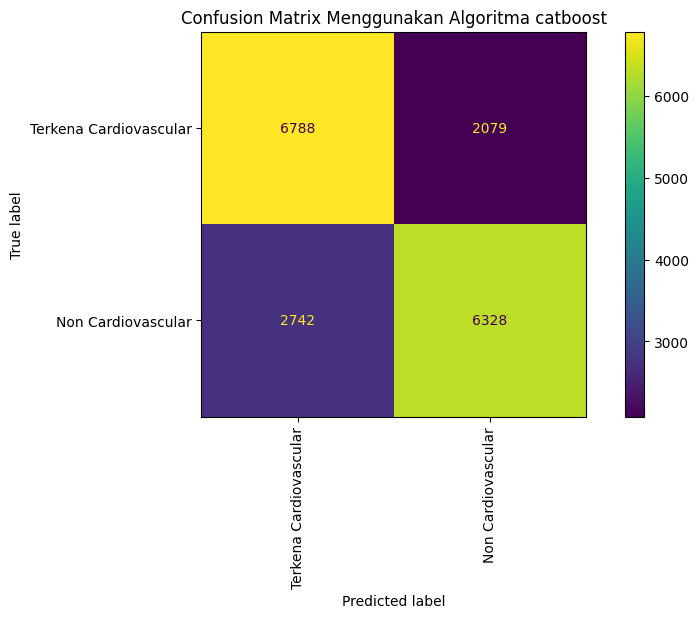

In [ ]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_cat, title = f"Confusion Matrix Menggunakan Algoritma catboost")

Menggunakan CatboostClassifier dimaknai:

1. 6788 responden cardiovascular telah diklasifikasikan dengan benar
2. 6328 responden noncardiovascular telah diklasifikasikan dengan benar
3. 2079 responden noncardiovacular diklasifikasikan sebagai responden cardiovascular (False Positif)
4. 2742 responden cardiovascular diklasifikasikan sebagai responden noncardiovascular (False Negatif)

# Evaluasi Model dan pemilihan model

In [ ]:
# Membentuk DataFrame berisi model dengan akurasinya
models = pd.DataFrame({
    "Model": ["XGBoost", "Logistik", "Decission Tree", "KNN" ,"Random Forest","Adaboost","Catboost"],
    "Akurasi": [accuracy_xgboost, accuracy_lg, accuracy_dt, accuracy_knn,accuracy_rf,accuracy_boosting,accuracy_cat]
})

# Mengurutkan data berdasarkan akurasi dari tertinggi ke terendah
models.sort_values(by = "Akurasi", ascending = False)

Model  Akurasi
0         XGBoost    73.31
6        Catboost    73.12
4   Random Forest    73.04
5        Adaboost    72.95
2  Decission Tree    72.57
1        Logistik    72.53
3             KNN    69.57

dari hasil tujuh model algoritma yang terbaik ialah model development dengan algoritma XGBoost

<ipython-input-96-25a91a2dbefd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data = models, x = "Model", y = "Akurasi", palette = "viridis")


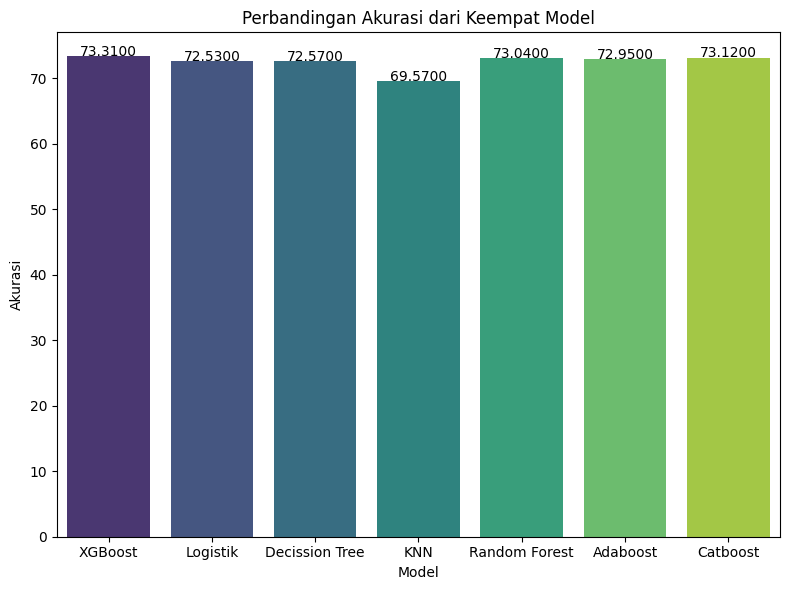

In [ ]:
# Membentuk plot bar tiap model
plt.figure(figsize = (8, 6))
barplot = sns.barplot(data = models, x = "Model", y = "Akurasi", palette = "viridis")

# Menambahkan label angka di atas bar plot pada masing-masing model
for index, value in enumerate(models["Akurasi"]):
    barplot.text(index, value + 0.02, f"{value:.4f}", color = "black", ha = "center")

# Menambahkan judul pada plot
plt.title("Perbandingan Akurasi dari Keempat Model")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Model")
plt.ylabel("Akurasi")


# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

                        precision    recall  f1-score   support

Terkena Cardiovascular       0.71      0.77      0.74      8867
    Non Cardiovascular       0.76      0.69      0.72      9070

              accuracy                           0.73     17937
             macro avg       0.73      0.73      0.73     17937
          weighted avg       0.74      0.73      0.73     17937



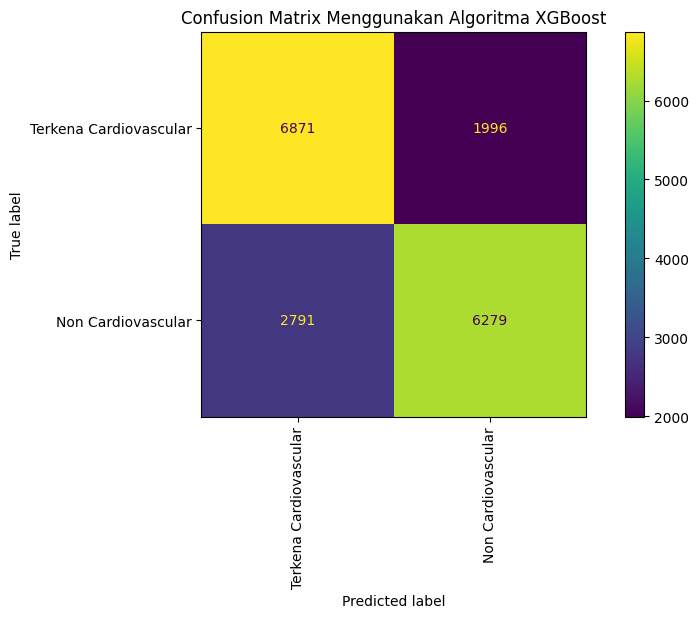

In [ ]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_xgb, title = f"Confusion Matrix Menggunakan Algoritma XGBoost")

interpretasi:

Menggunakan XGBoost dimaknai:

>1. 6871 responden cardiovascular telah diklasifikasikan dengan benar
> 2. 6279 responden noncardiovascular telah diklasifikasikan dengan benar
> 3. 1996 responden noncardiovacular diklasifikasikan sebagai responden cardiovascular (False Positif)
> 4. 2791 responden cardiovascular diklasifikasikan sebagai responden noncardiovascular (False Negatif)

<Axes: >

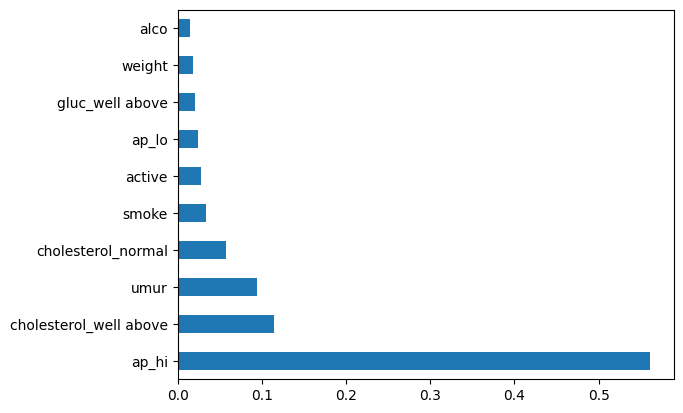

In [ ]:
#signifikan faktor dari model XGboost (model Terbaik) tersebut yang menggambarkan responden Terkena cardiovascular
feat_importances = pd.Series(model_xgb.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

makna dari grafik tersebut menunjukan bahwa 3 faktor yang sangat berpengaruh seseorang terkena penyakit cardiovascular ,yaitu tekanan darah diastolik yang tinggi, kadar kolesterol yang sangat tinggi, dan umur. Disimpulkan bahwa seseorang yang jika tidak ingin mencegah terkena penyakit cardiovascular harus menjaga tekanan darah diastoliknya dan menjaga kadar kolesterolnya dalam kadar normal

# Referensi

[1]  M. S. Gibran and U. Nurulhuda, "The relationship between obesity and coronary heart disease incident: Hubungan antara obesitas dengan kejadian penyakit jantung koroner di Poli Jantung RS Islam Jakarta Cempaka Putih," Journal of Health and Cardiovascular Nursing, vol. 3, no. 2, pp. 57–62, 2023.

[2]   Direktorat P2PTM Kemenkes RI, "Hari Jantung Sedunia (HJS) Tahun 2019: Jantung Sehat, SDM Unggul," 26 Sep. 2019.

[3] Jamaluddin, "Obesitas sebagai faktor risiko penyakit jantung koroner di Rumah Sakit Umum Bahteramas Provinsi Sulawesi Tenggara," Seminar Nasional Teknologi Terapan Inovasi dan Rekayasa (SNT2IR) 2019, Program Pendidikan Vokasi Universitas Halu Oleo, vol. 2, no. 1, pp. 505–508, 2019.

[4]   P. LeMone, K. M. Burke, and G. Bauldoff, Buku Ajar Keperawatan Medikal Bedah: Gangguan Integumen, Gangguan Endokrin, dan Gangguan Gastrointestinal, A. Linda, Ed., 5th ed. Jakarta: EGC, 2015.

[5] P. Mayadewi and E. Rosely, "Prediksi Nilai Proyek Akhir Mahasiswa Menggunakan Algoritma Klasifikasi Data Mining," in Proceedings of SESINDO 2015, 2015.

[6] A. R. Faddilah, Penerapan Optuna untuk Optimasi Hyperparameter pada Model Linear Regression dan Random Forest Regression dalam Penentuan Batas Kredit (TA. 2.24.024), Doctoral dissertation, Universitas Logistik dan Bisnis Internasional, 2024.